# Europe Women's Datathon Spring 2025

In [86]:
# prompt: link to google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
!pip install plotly

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from IPython.display import display
import plotly.express as px
import numpy as np
import altair as alt

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## 0. Visualization of Datasets

### 1. all_commodities.csv

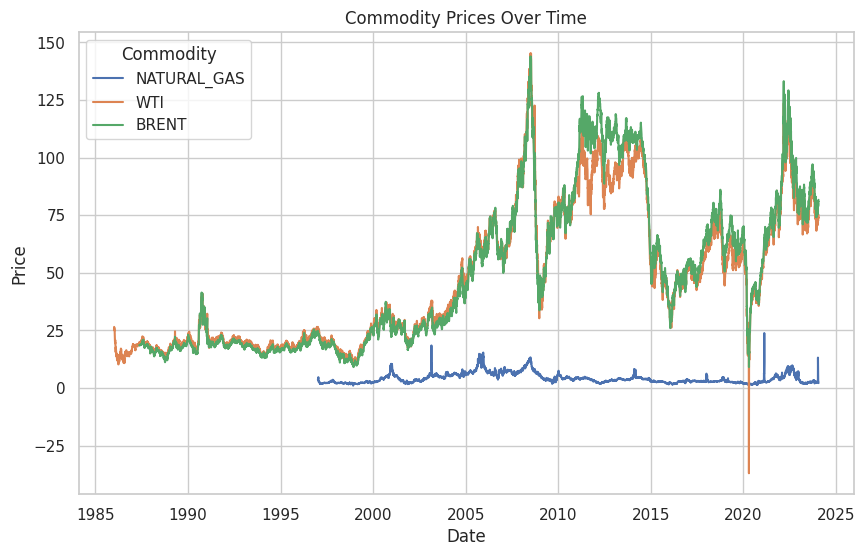

In [89]:
commodities = pd.read_csv('/content/drive/MyDrive/2025-citadal-datathon/datathon_data/all_commodities.csv', parse_dates=['Date_Time'])

sns.lineplot(data=commodities, x='Date_Time', y='Value', hue='Commodity_Simple')
plt.title('Commodity Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(title='Commodity')
plt.show()

### 2. all_stocks_and_etfs.csv

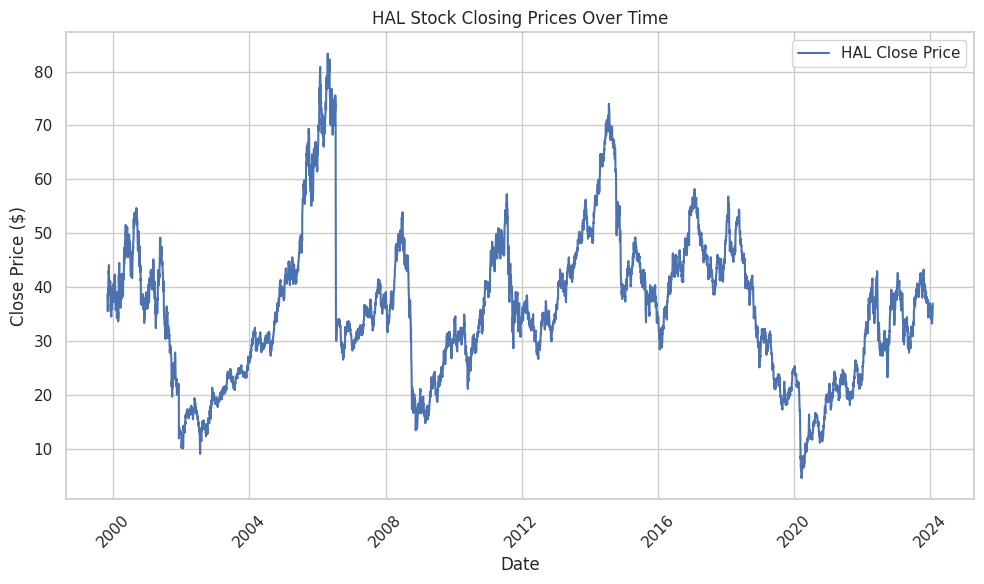

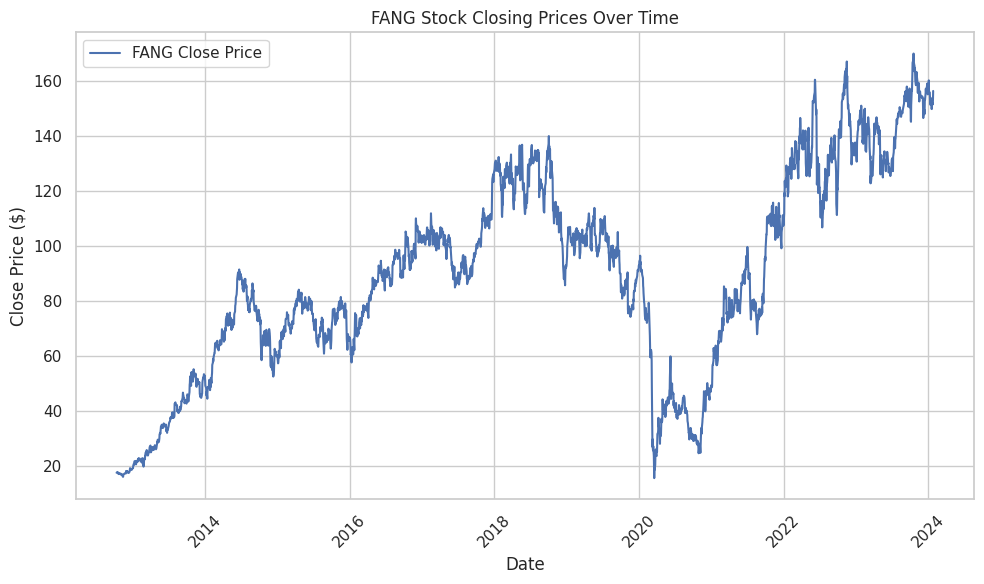

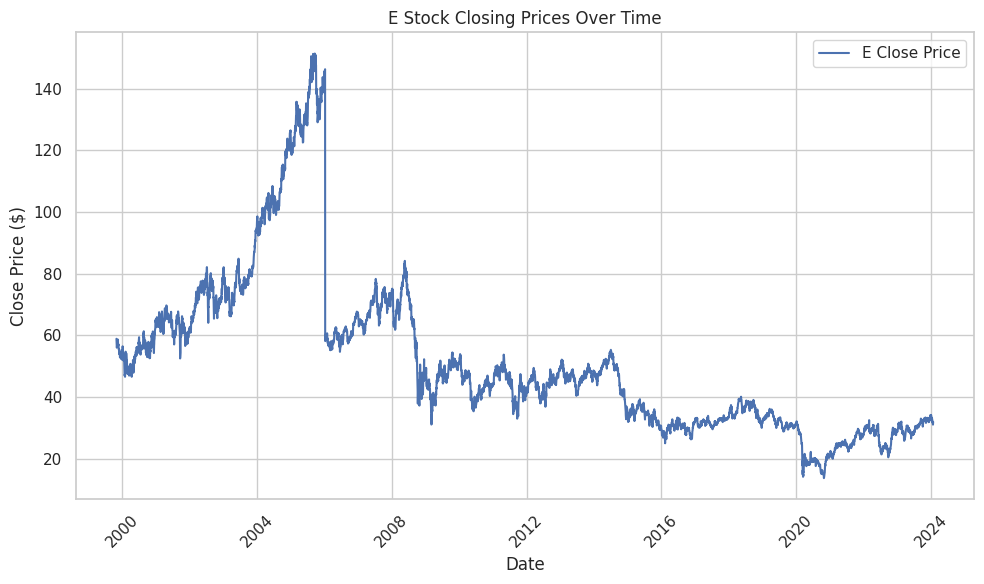

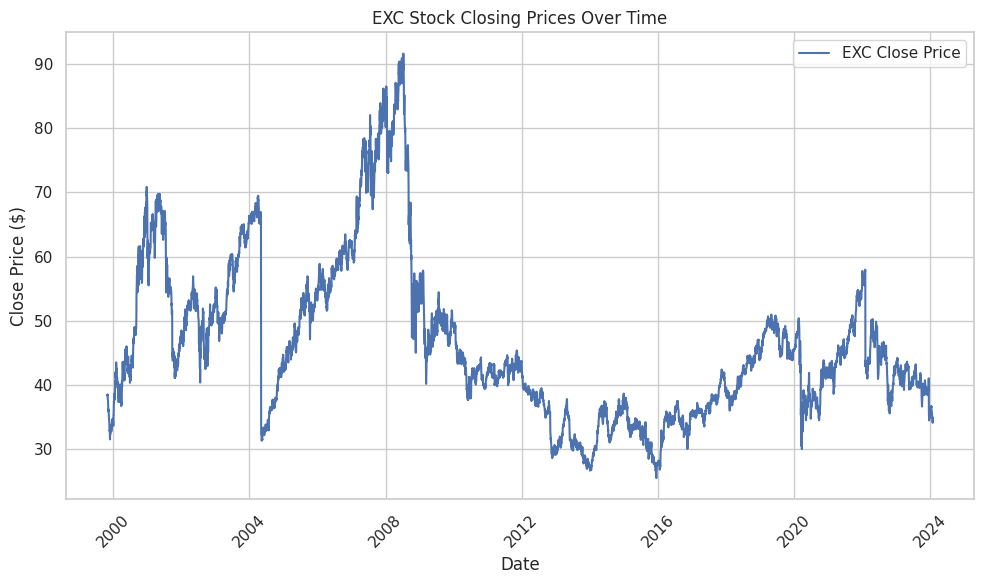

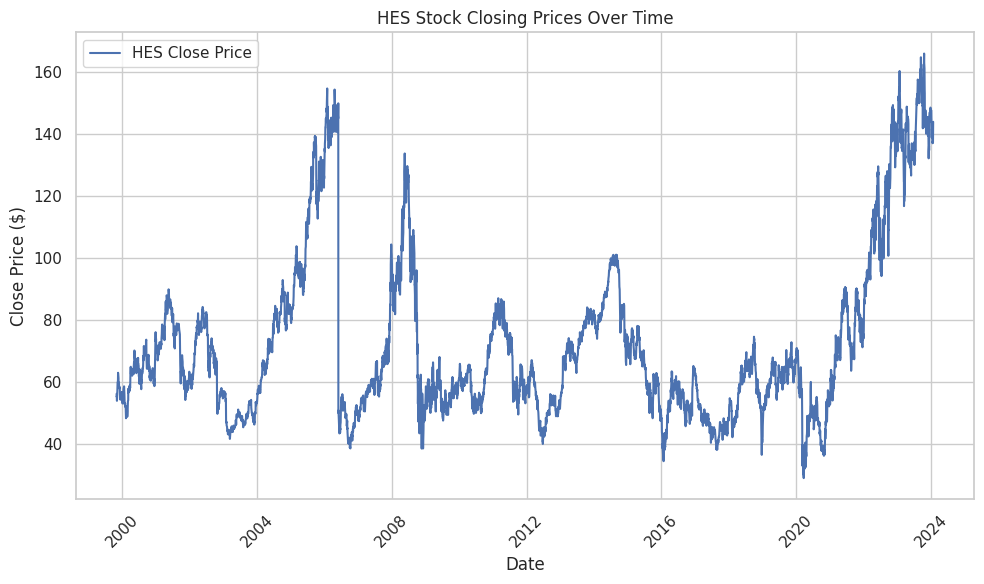

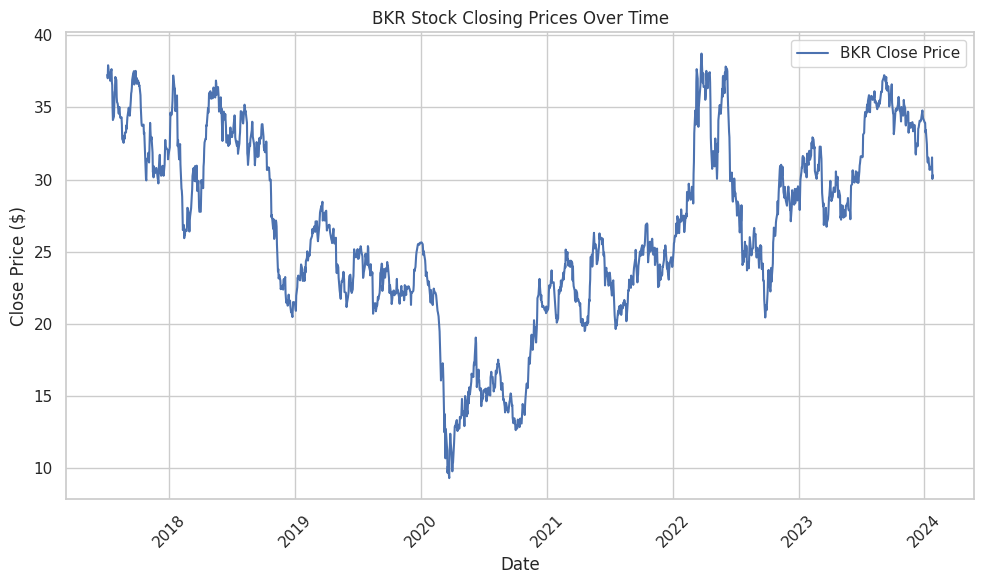

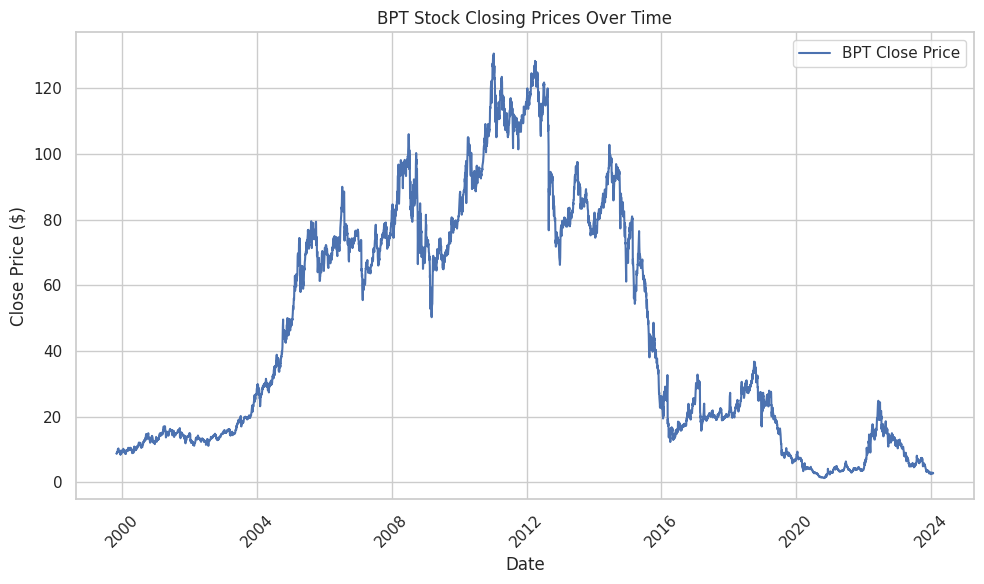

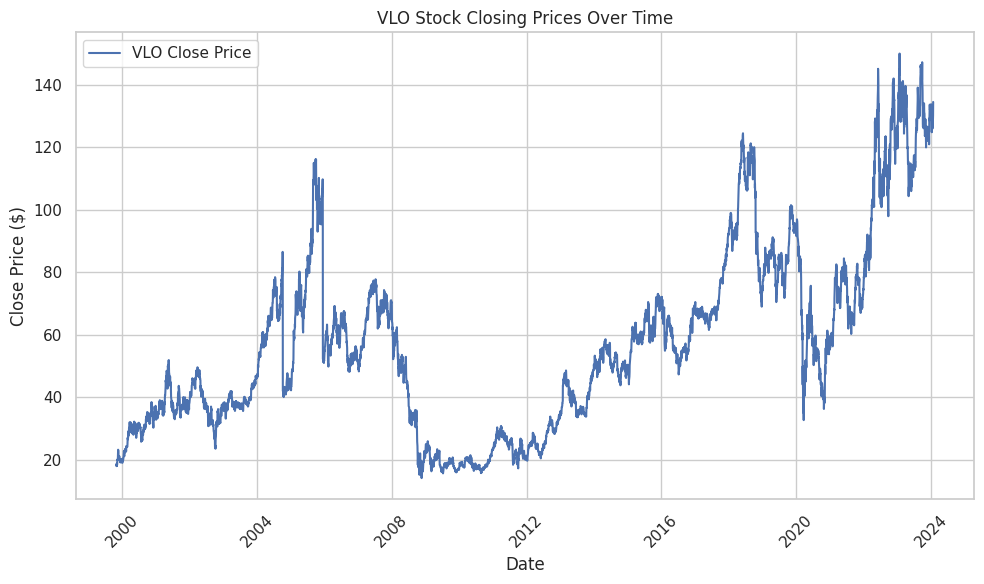

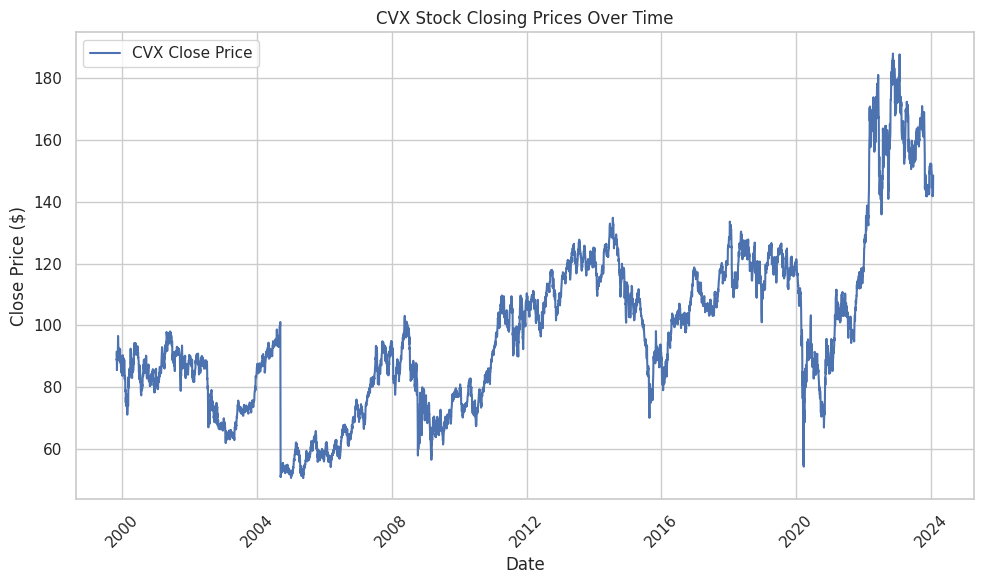

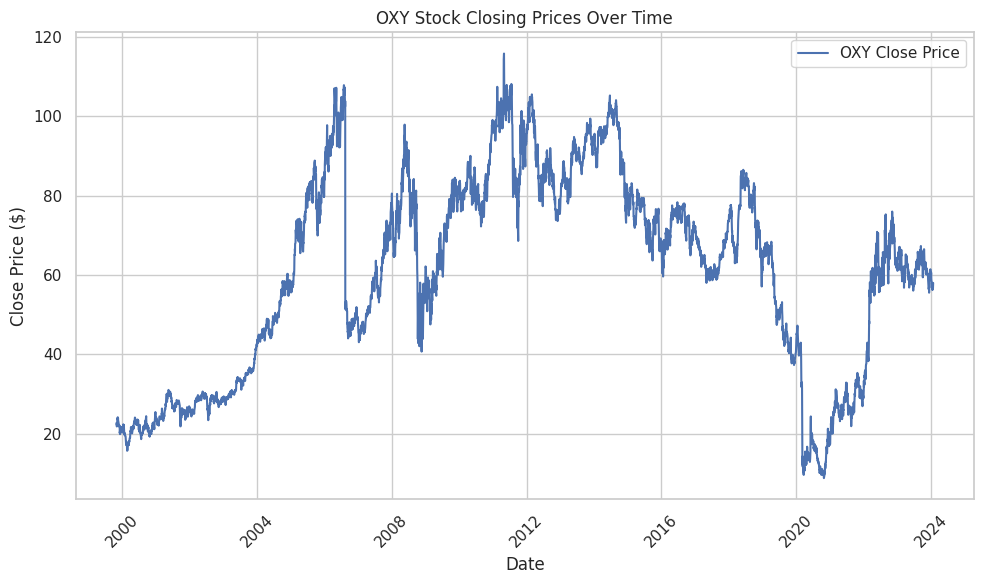

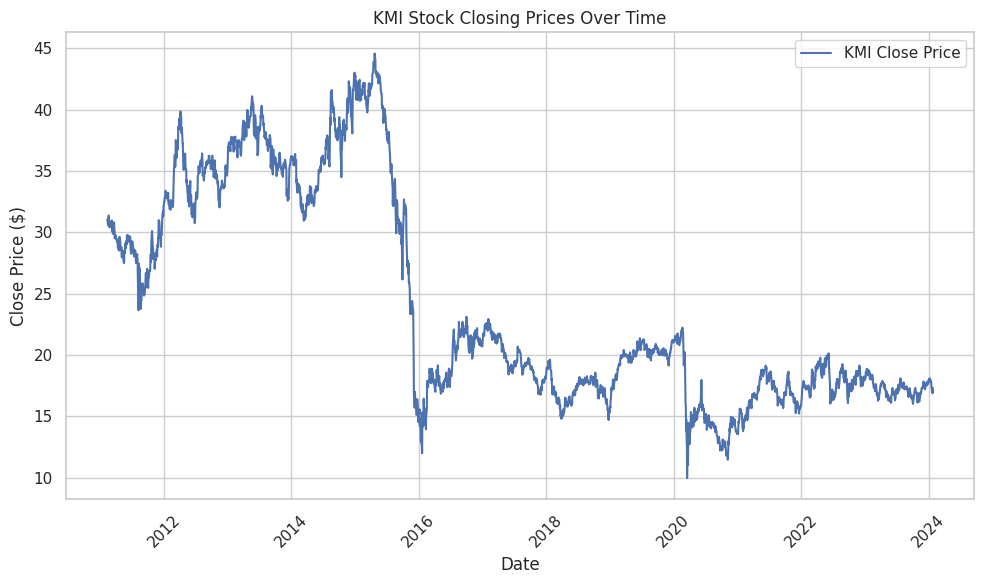

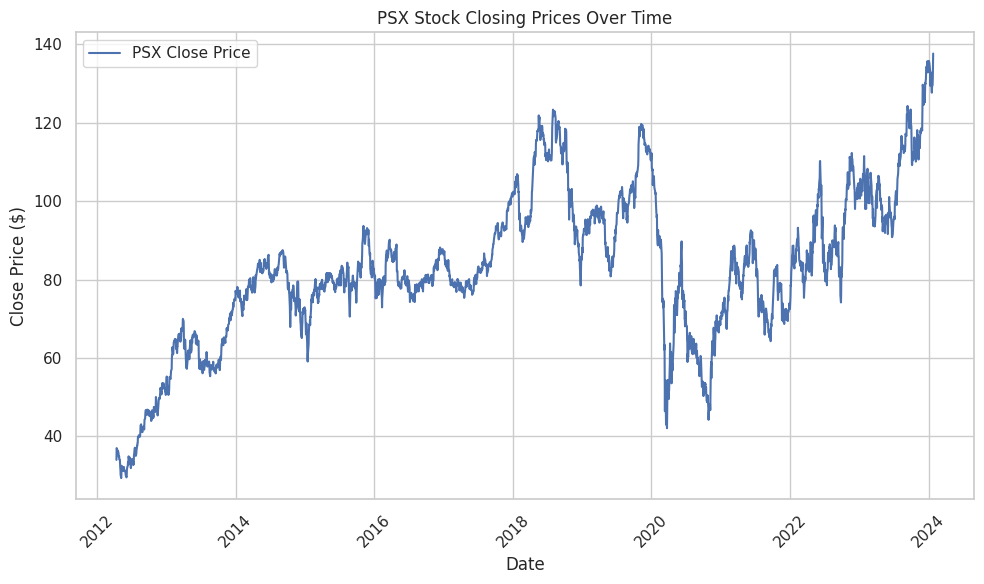

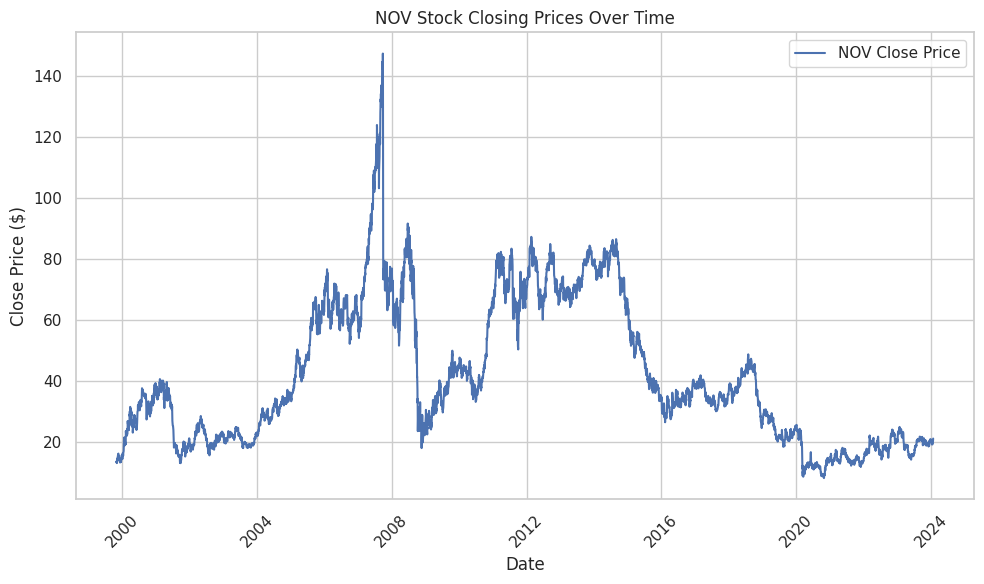

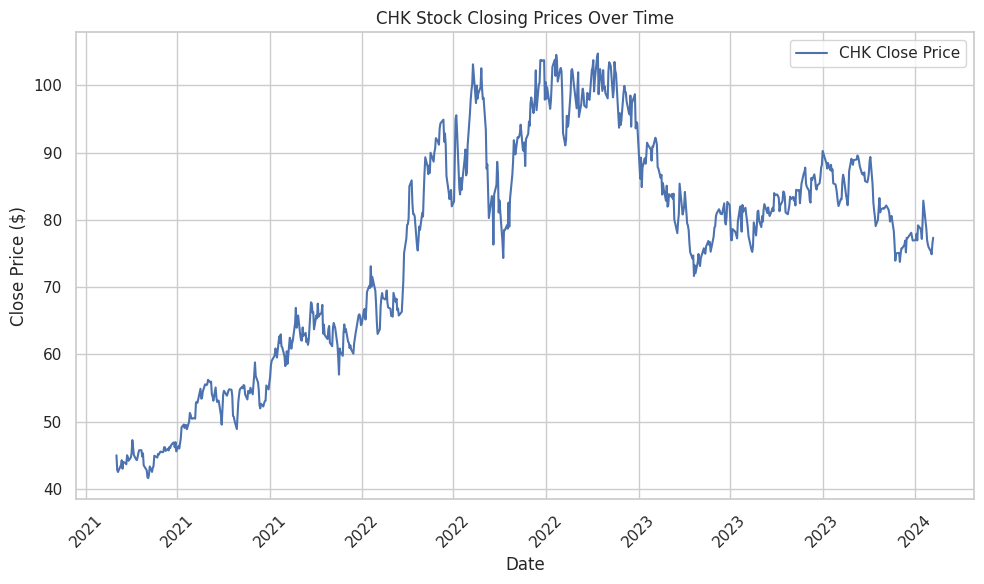

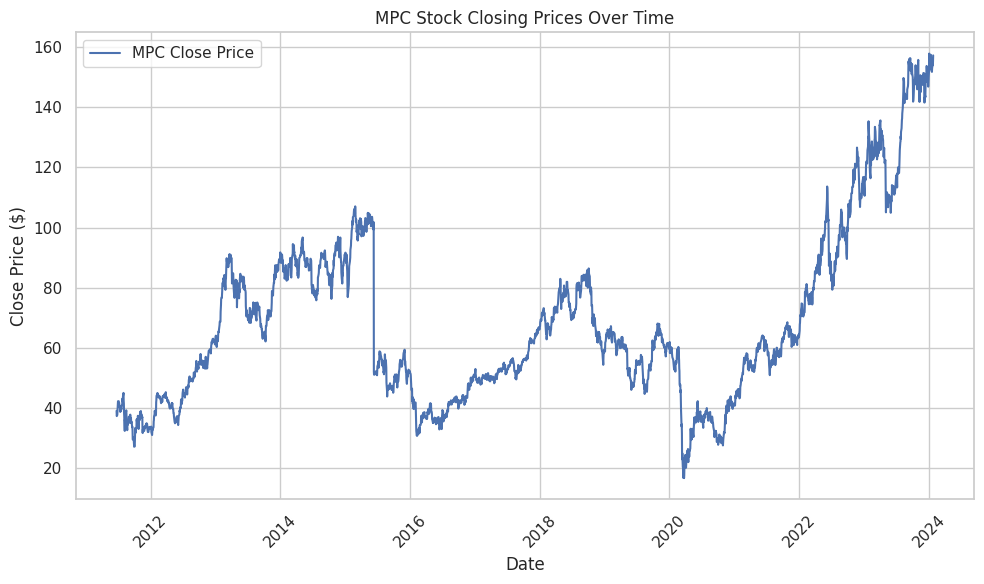

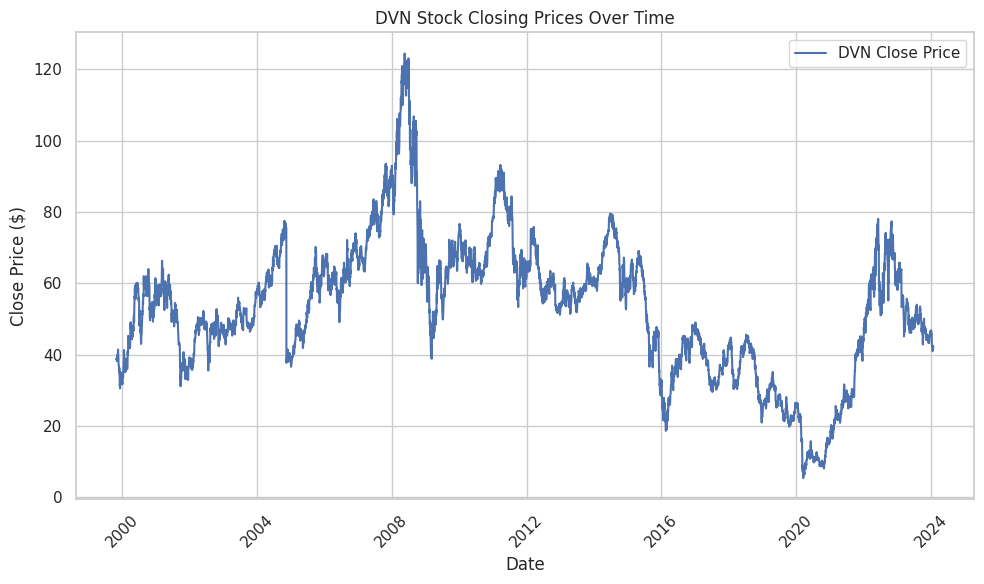

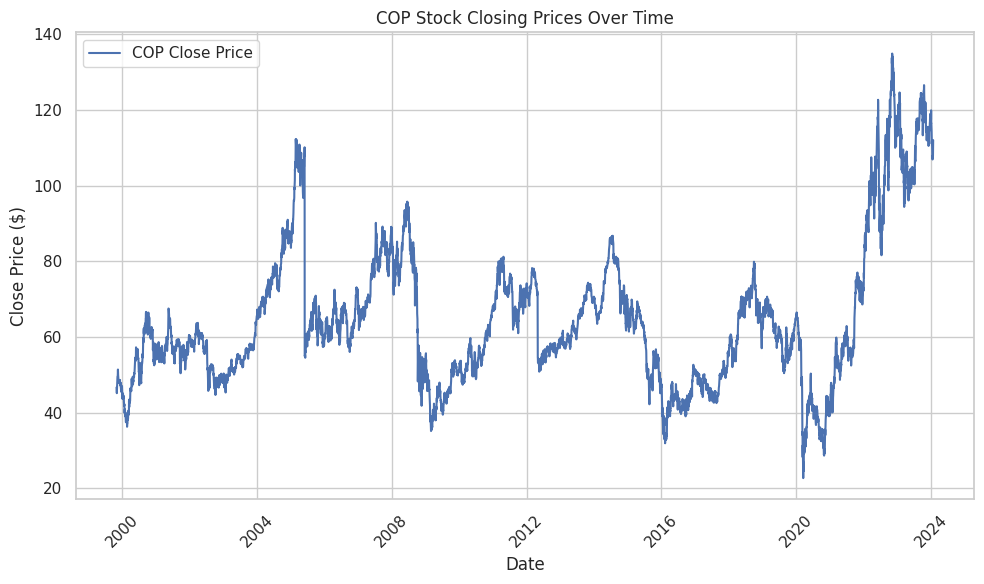

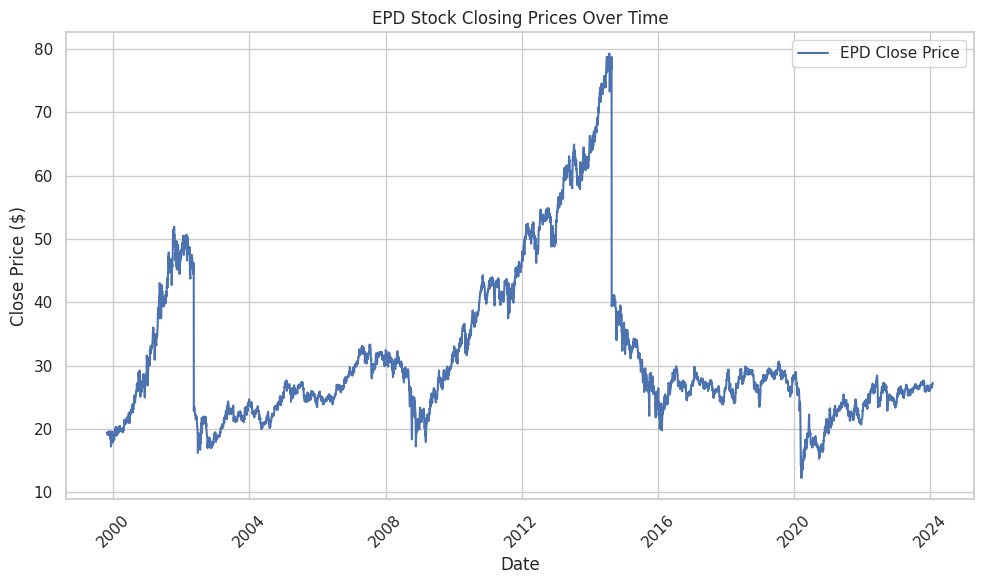

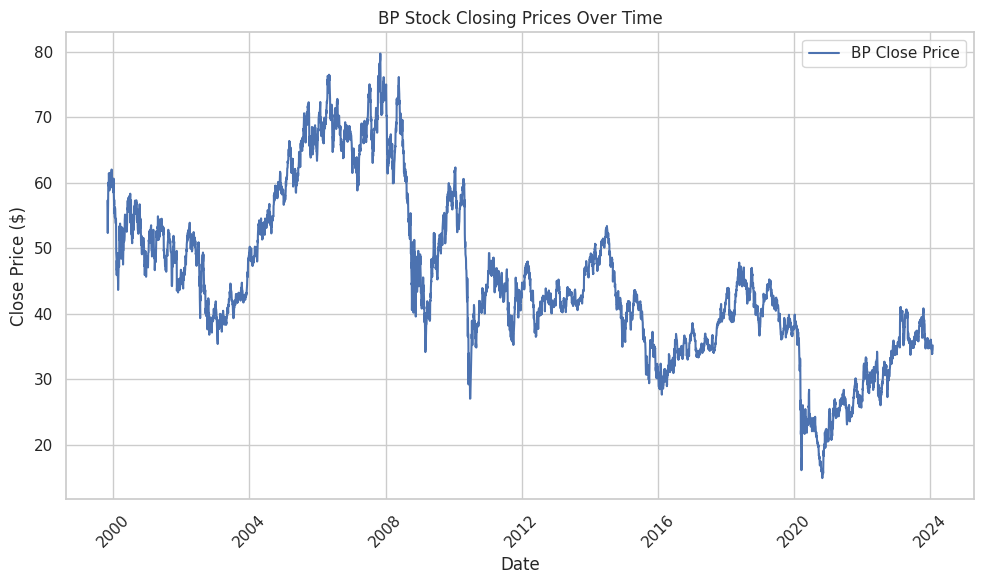

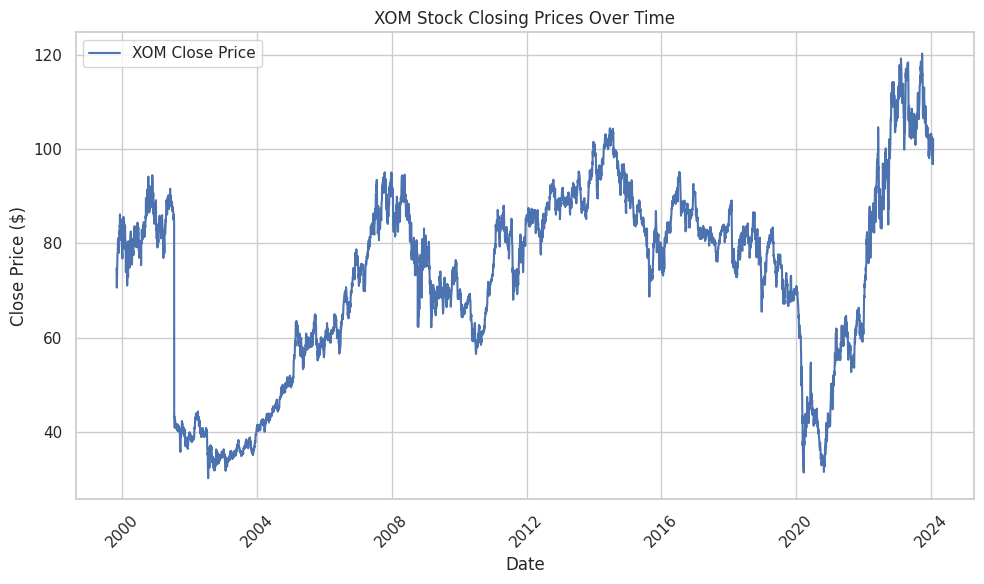

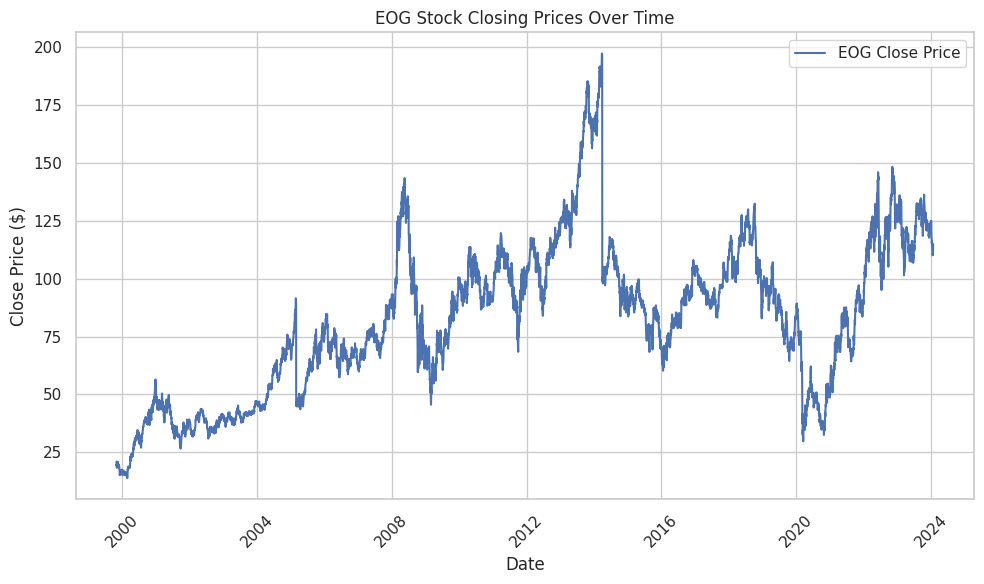

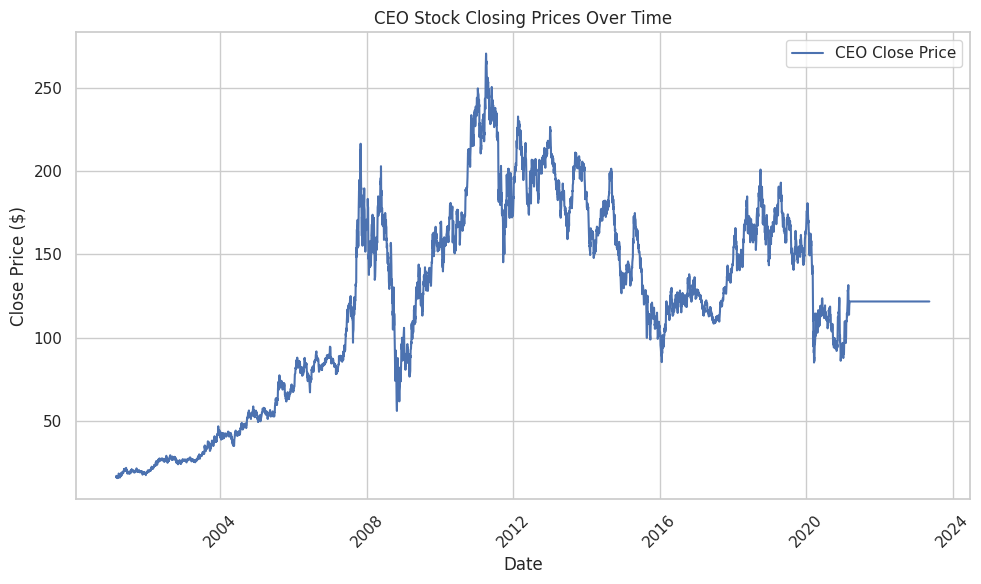

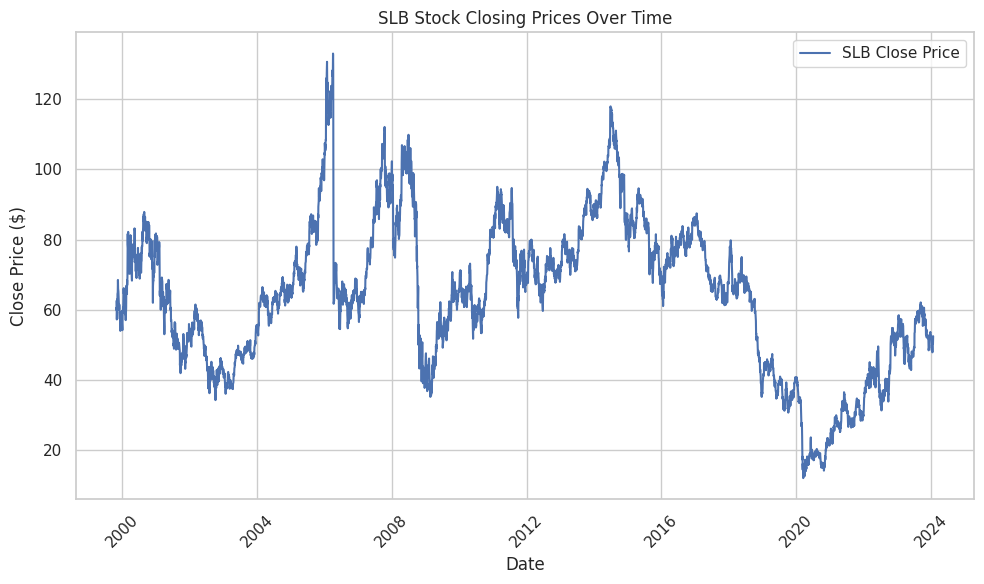

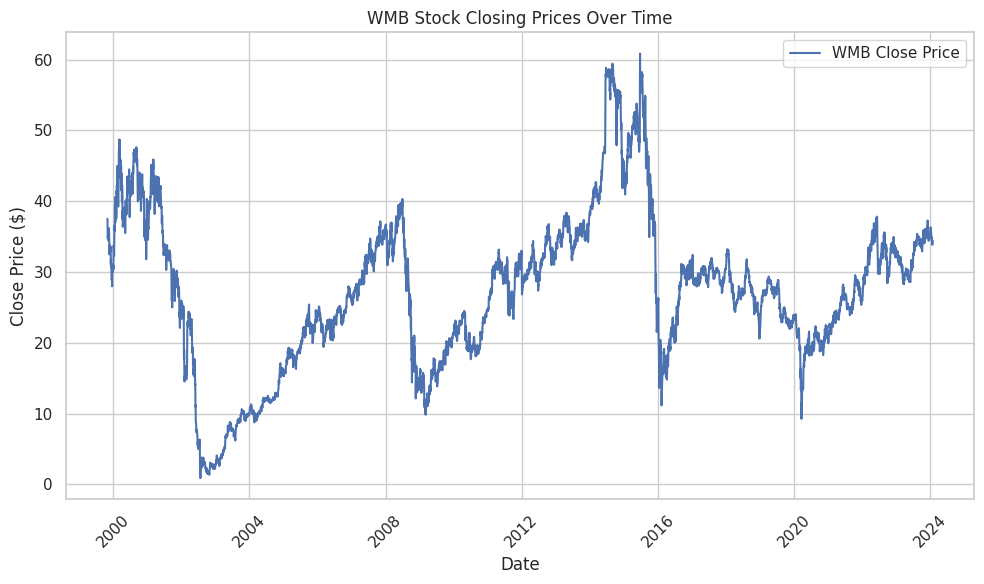

In [90]:
stocks = pd.read_csv('/content/drive/MyDrive/2025-citadal-datathon/datathon_data/all_stocks_and_etfs.csv', parse_dates=['Date-Time'])
stocks['Ticker_Symbol'].value_counts()

stocks.rename(columns={'Date-Time': 'Date'}, inplace=True)
stocks['Close'] = pd.to_numeric(stocks['Close'], errors='coerce')
tickers = stocks['Ticker_Symbol'].unique()

for ticker in tickers:
    df_ticker = stocks[stocks['Ticker_Symbol'] == ticker].sort_values('Date')

    plt.plot(df_ticker['Date'], df_ticker['Close'], label=f'{ticker} Close Price')
    plt.title(f'{ticker} Stock Closing Prices Over Time')
    plt.xlabel('Date')
    plt.ylabel('Close Price ($)')
    plt.grid(True)
    plt.legend()

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

In [91]:
stocks['Ticker_Symbol'].value_counts()

Ticker_Symbol
SPY     6102
DIA     6102
HAL     6097
E       6097
OXY     6097
BPT     6097
VLO     6097
CVX     6097
DVN     6097
NOV     6097
EXC     6097
HES     6097
WMB     6097
SLB     6097
EOG     6097
COP     6097
BP      6097
XOM     6097
EPD     6097
CEO     5588
ONEQ    5119
VOO     3372
KMI     3259
MPC     3168
PSX     2966
FANG    2838
BKR     1651
CHK      744
Name: count, dtype: int64

### 3. monthly_gasoline_makeup_percentages.csv

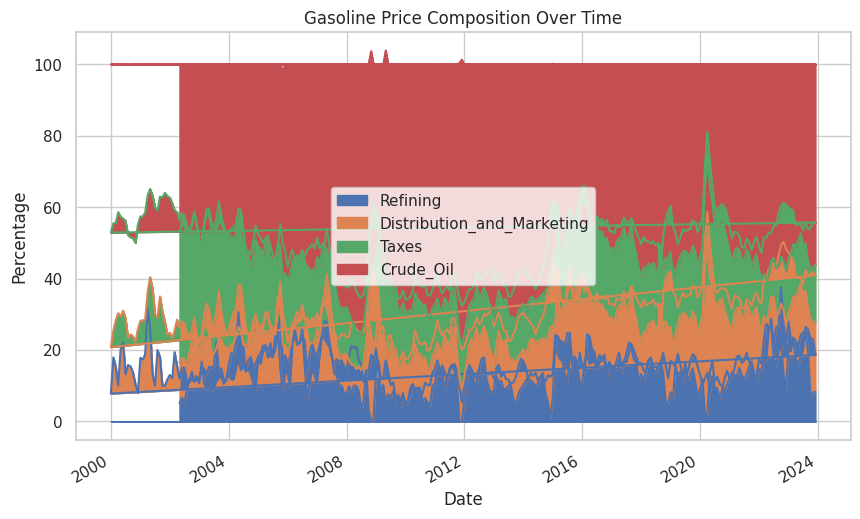

In [92]:
gas_makeup = pd.read_csv('/content/drive/MyDrive/2025-citadal-datathon/datathon_data/monthly_gasoline_makeup_percentages.csv', parse_dates=['Date'])

plot_columns = ['Refining', 'Distribution_and_Marketing', 'Taxes', 'Crude_Oil']
# Retail_Price are made from the other four parts
# https://www.eia.gov/petroleum/gasdiesel/

# Check for negative values in the specified columns and replace with 0
for col in plot_columns:
    if (gas_makeup[col] < 0).any():
        print(f"Warning: Negative values found in column '{col}'. Replacing with 0.")
        gas_makeup[col] = gas_makeup[col].clip(lower=0) # Replace negative values with 0

gas_makeup.set_index('Date')[plot_columns].plot.area(stacked=True)
plt.title('Gasoline Price Composition Over Time')
plt.ylabel('Percentage')
plt.xlabel('Date')
plt.show()

### 4. monthly_transportation_statistics.csv

<ipython-input-93-db70c4b13a71>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



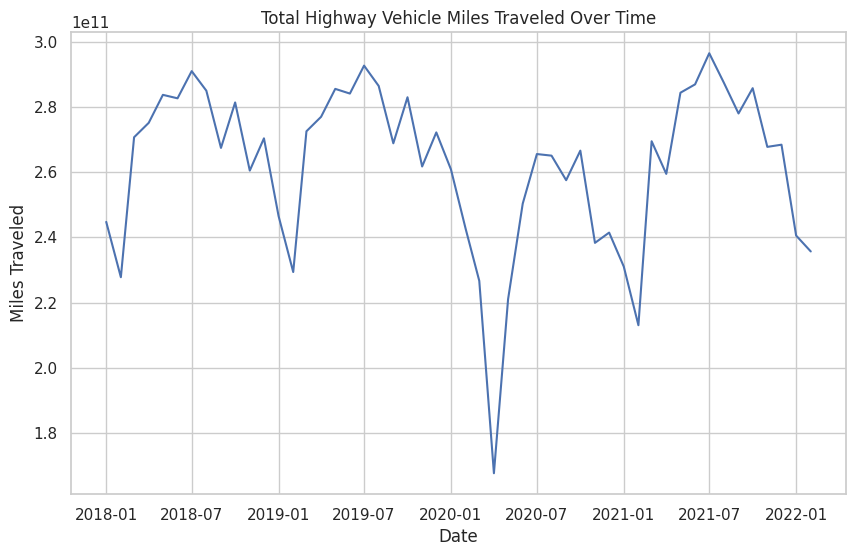

In [93]:
transportation = pd.read_csv('/content/drive/MyDrive/2025-citadal-datathon/datathon_data/monthly_transportation_statistics.csv', parse_dates=['Date'])

sns.lineplot(data=transportation, x='Date', y='Highway Vehicle Miles Traveled - All Systems')
plt.title('Total Highway Vehicle Miles Traveled Over Time')
plt.ylabel('Miles Traveled')
plt.xlabel('Date')
plt.show()

### 5. stock_descriptions.csv

   Symbol     AssetType                                         Name  \
0     BKR  Common Stock                         Baker Hughes Company   
1      BP  Common Stock                                   BP PLC ADR   
2     BPT  Common Stock                 BP Prudhoe Bay Royalty Trust   
3     CEO  Common Stock                                CNOOC Limited   
4     CHK  Common Stock                Chesapeake Energy Corporation   
5     COP  Common Stock                               ConocoPhillips   
6     CVX  Common Stock                                 Chevron Corp   
7     DVN  Common Stock                     Devon Energy Corporation   
8       E  Common Stock                                    Eni S.p.A   
9     EOG  Common Stock                            EOG Resources Inc   
10    EPD  Common Stock            Enterprise Products Partners L.P.   
11    EXC  Common Stock                           Exelon Corporation   
12   FANG  Common Stock                     Diamondback Energy, 

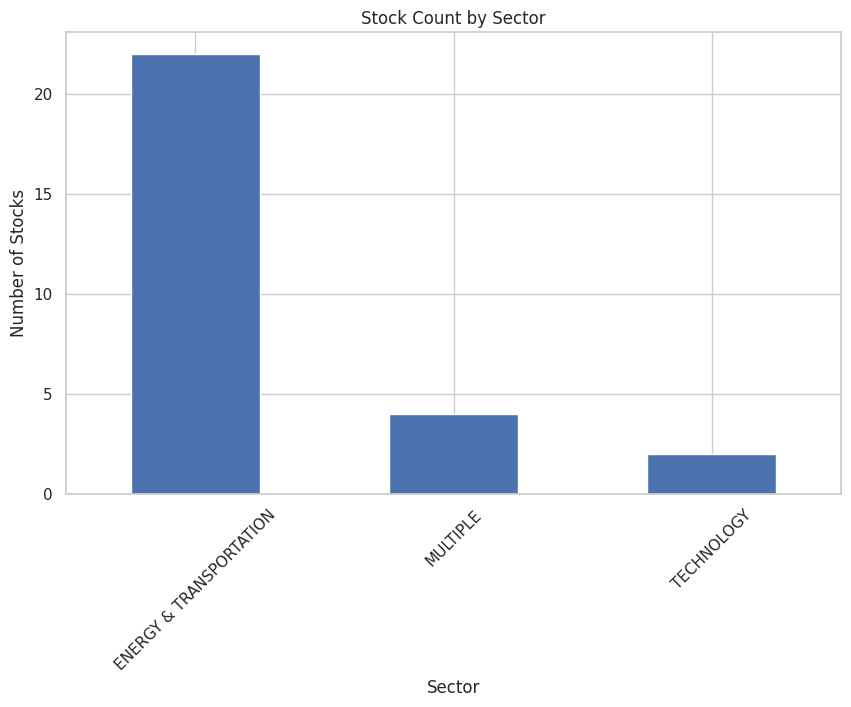

In [94]:
stock_descriptions = pd.read_csv('/content/drive/MyDrive/2025-citadal-datathon/datathon_data/stock_descriptions.csv')
print(stock_descriptions)


stock_descriptions['Sector'].value_counts().plot(kind='bar')
plt.title('Stock Count by Sector')
plt.ylabel('Number of Stocks')
plt.xticks(rotation=45)
plt.show()

### 6. weekly_gasoline_prices.csv

In [95]:
gas_prices = pd.read_csv('/content/drive/MyDrive/2025-citadal-datathon/datathon_data/weekly_gasoline_prices.csv', parse_dates=['Date'])

sns.lineplot(data=gas_prices, x='Date', y='Price', hue='Type_Clean')
plt.title('Weekly US Gasoline Prices')
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.show()

In [96]:
latest_date = gas_prices['Date'].max()
latest_data = gas_prices[gas_prices['Date'] == latest_date]

latest_data = latest_data[latest_data['Type_Clean'].str.contains('Regular')]
print(latest_data['Geography'].unique())

['US' 'East Coast' 'New England (PADD 1A)' 'Central Atlantic (PADD 1B)'
 'Lower Atlantic (PADD 1C)' 'Midwest' 'Gulf Coast' 'Rocky Mountain'
 'West Coast' 'California' 'Colorado' 'Florida' 'Massachusetts'
 'Minnesota' 'New York' 'Ohio' 'Texas' 'Washington' 'Boston' 'Chicago'
 'Cleveland' 'Denver' 'Houston' 'Los Angeles' 'Miami' 'New York City'
 'New York Harbor' 'San Francisco' 'Seattle'
 'West Coast (PADD 5) Except California']


In [97]:
geo_name_map = {
    'US': 'United States',
    'East Coast': 'East Coast',
    'New England (PADD 1A)': 'New England',
    'Central Atlantic (PADD 1B)': 'Central Atlantic',
    'Lower Atlantic (PADD 1C)': 'Lower Atlantic',
    'Midwest': 'Midwest',
    'Gulf Coast': 'Gulf Coast',
    'Rocky Mountain': 'Rocky Mountain',
    'West Coast': 'West Coast',
    'California': 'California',
    'Colorado': 'Colorado',
    'Florida': 'Florida',
    'Massachusetts': 'Massachusetts',
    'Minnesota': 'Minnesota',
    'New York': 'New York (State)',
    'Ohio': 'Ohio',
    'Texas': 'Texas',
    'Washington': 'Washington (State)',
    'Boston': 'Boston',
    'Chicago': 'Chicago',
    'Cleveland': 'Cleveland',
    'Denver': 'Denver',
    'Houston': 'Houston',
    'Los Angeles': 'Los Angeles',
    'Miami': 'Miami',
    'New York City': 'New York City',
    'New York Harbor': 'NY Harbor',
    'San Francisco': 'San Francisco',
    'Seattle': 'Seattle',
    'West Coast (PADD 5) Except California': 'West Coast (ex. CA)'
}

In [98]:
geo_coords = {
    'US': {'lat': 39.8283, 'lon': -98.5795},
    'East Coast': {'lat': 36.7783, 'lon': -77.0369},
    'New England (PADD 1A)': {'lat': 43.9654, 'lon': -71.6835},
    'Central Atlantic (PADD 1B)': {'lat': 39.0, 'lon': -76.5},
    'Lower Atlantic (PADD 1C)': {'lat': 33.0, 'lon': -80.0},
    'Midwest': {'lat': 41.8500, 'lon': -87.6500},
    'Gulf Coast': {'lat': 29.7604, 'lon': -95.3698},  # Houston area
    'Rocky Mountain': {'lat': 39.5501, 'lon': -105.7821},
    'West Coast': {'lat': 37.7749, 'lon': -122.4194},
    'California': {'lat': 36.7783, 'lon': -119.4179},
    'Colorado': {'lat': 39.5501, 'lon': -105.7821},
    'Florida': {'lat': 27.9944, 'lon': -81.7603},
    'Massachusetts': {'lat': 42.4072, 'lon': -71.3824},
    'Minnesota': {'lat': 46.7296, 'lon': -94.6859},
    'New York': {'lat': 43.0000, 'lon': -75.0000},
    'Ohio': {'lat': 40.4173, 'lon': -82.9071},
    'Texas': {'lat': 31.9686, 'lon': -99.9018},
    'Washington': {'lat': 47.7511, 'lon': -120.7401},
    'Boston': {'lat': 42.3601, 'lon': -71.0589},
    'Chicago': {'lat': 41.8781, 'lon': -87.6298},
    'Cleveland': {'lat': 41.4993, 'lon': -81.6944},
    'Denver': {'lat': 39.7392, 'lon': -104.9903},
    'Houston': {'lat': 29.7604, 'lon': -95.3698},
    'Los Angeles': {'lat': 34.0522, 'lon': -118.2437},
    'Miami': {'lat': 25.7617, 'lon': -80.1918},
    'New York City': {'lat': 40.7128, 'lon': -74.0060},
    'New York Harbor': {'lat': 40.6687, 'lon': -74.0451},
    'San Francisco': {'lat': 37.7749, 'lon': -122.4194},
    'Seattle': {'lat': 47.6062, 'lon': -122.3321},
    'West Coast (PADD 5) Except California': {'lat': 45.0, 'lon': -120.0},
}

In [99]:
latest_data['Region_Code'] = latest_data['Geography'].map(geo_name_map)

fig = px.bar(
    latest_data,
    x='Region_Code',
    y='Price',
    color='Region_Code',
    title=f'Gasoline Prices by Region on {latest_date.strftime("%Y-%m-%d")}',
    labels={'Price': 'Price ($)', 'Region_Code': 'Region'},
)
fig.show()

In [100]:
gas_prices['lat'] = gas_prices['Geography'].map(lambda x: geo_coords.get(x, {}).get('lat'))
gas_prices['lon'] = gas_prices['Geography'].map(lambda x: geo_coords.get(x, {}).get('lon'))

latest_date = gas_prices['Date'].max()
map_data = gas_prices[(gas_prices['Date'] == latest_date) & (gas_prices['Type_Clean'].str.contains('Regular'))]

map_data = map_data.dropna(subset=['Price'])

fig = px.scatter_mapbox(
    map_data,
    lat='lat',
    lon='lon',
    color='Price',
    hover_name='Geography',
    size='Price',
    size_max=15,
    zoom=3,
    mapbox_style='carto-positron',
    title=f"Gasoline Prices by Geography on {latest_date.date()}"
)
fig.show()

### 7. weekly_supply_estimates.csv

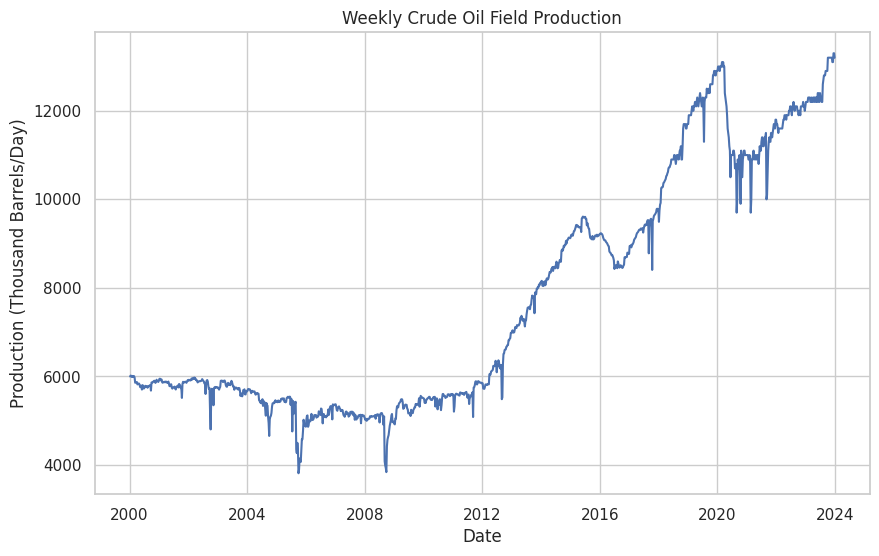

In [101]:
supply = pd.read_csv('/content/drive/MyDrive/2025-citadal-datathon/datathon_data/weekly_supply_estimates.csv', parse_dates=['Date'])

sns.lineplot(data=supply, x='Date', y='Weekly U.S. Field Production of Crude Oil  (Thousand Barrels per Day)')
plt.title('Weekly Crude Oil Field Production')
plt.ylabel('Production (Thousand Barrels/Day)')
plt.xlabel('Date')
plt.show()

## 1. Analyzing the Relationship Between U.S. Gasoline Prices and Energy Stock Performance

### a. Stock Price Trends by Supply Chain Position

In [144]:
supply_chain_map = {
    'BKR': 'upstream', 'BP': 'downstream', 'BPT': 'upstream', 'CEO': 'upstream',
    'CHK': 'upstream', 'COP': 'upstream', 'CVX': 'integrated', 'DVN': 'upstream',
    'E': 'integrated', 'EOG': 'upstream', 'EPD': 'midstream', 'EXC': 'downstream',
    'FANG': 'upstream', 'HAL': 'upstream', 'HES': 'upstream', 'KMI': 'midstream',
    'MPC': 'downstream', 'NOV': 'upstream', 'OXY': 'upstream', 'PSX': 'downstream',
    'SLB': 'upstream', 'VLO': 'downstream', 'WMB': 'midstream', 'XOM': 'integrated',
    'DIA': '', 'ONEQ': '', 'SPY': '', 'VOO': ''
}

In [145]:
stocks['Supply_Chain_Position'] = stocks['Ticker_Symbol'].map(supply_chain_map)
display(stocks.head())
display(stocks.tail())

Date   Open   High    Low  Close   Volume Ticker_Symbol  \
28876 2017-07-05  40.80  40.82  37.25  37.25  5883326           BKR   
28875 2017-07-06  38.09  38.09  36.52  37.01  5088097           BKR   
28874 2017-07-07  38.14  38.59  36.12  37.91  6014535           BKR   
28873 2017-07-10  37.63  38.17  36.80  37.23  4721508           BKR   
28872 2017-07-11  37.31  37.78  36.89  37.35  2791176           BKR   

       Daily_Log_Return  Daily_Pct_Return  Daily_High_Low  \
28876               NaN               NaN            3.57   
28875         -0.006464         -0.006443            1.57   
28874          0.024027          0.024318            2.47   
28873         -0.018100         -0.017937            1.37   
28872          0.003218          0.003223            0.89   

       Rolling_Log_Return_Volatility Supply_Chain_Position  
28876                            NaN              upstream  
28875                            NaN              upstream  
28874                            NaN              upstream  
28873                            NaN              upstream  
28872                            NaN              upstream

Date    Open      High     Low   Close    Volume Ticker_Symbol  \
93891 2024-01-19   96.72   97.0156  96.410   96.95  20088432           XOM   
93890 2024-01-22   96.70   97.0950  95.770   96.82  19955946           XOM   
93889 2024-01-23   96.81   98.5000  96.730   97.91  15863433           XOM   
93888 2024-01-24   98.32   99.6500  97.740   99.60  17114423           XOM   
93887 2024-01-25  100.31  102.1800  99.615  102.13  22089510           XOM   

       Daily_Log_Return  Daily_Pct_Return  Daily_High_Low  \
93891          0.001548          0.001550          0.6056   
93890         -0.001342         -0.001341          1.3250   
93889          0.011195          0.011258          1.7700   
93888          0.017113          0.017261          1.9100   
93887          0.025084          0.025402          2.5650   

       Rolling_Log_Return_Volatility Supply_Chain_Position  
93891                       0.013100            integrated  
93890                       0.009766            integrated  
93889                       0.006804            integrated  
93888                       0.008422            integrated  
93887                       0.010921            integrated

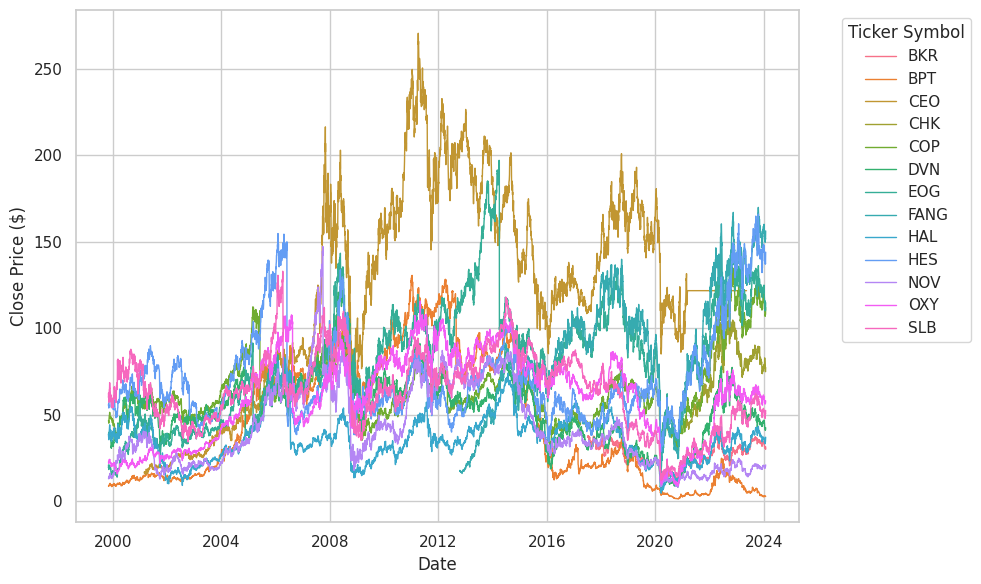

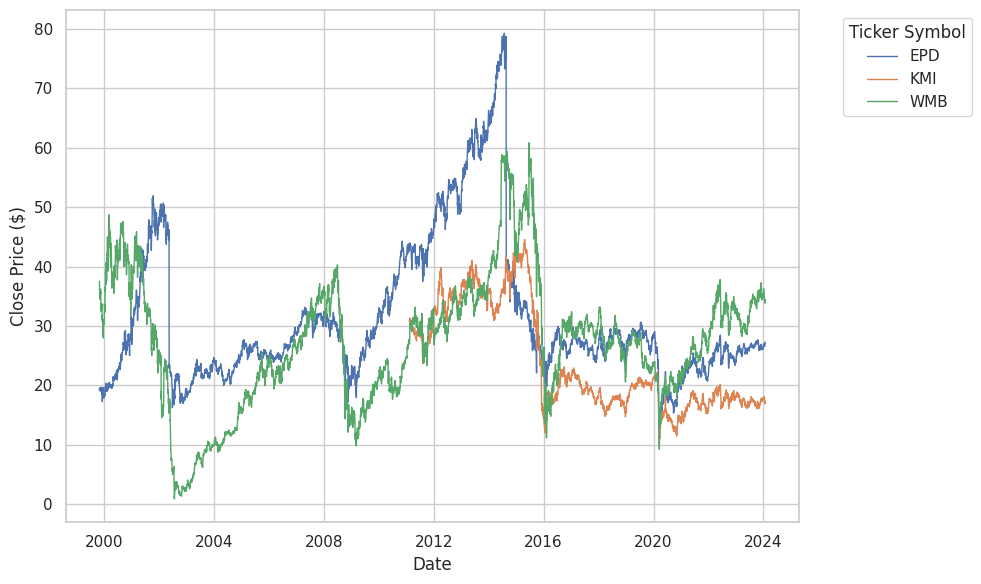

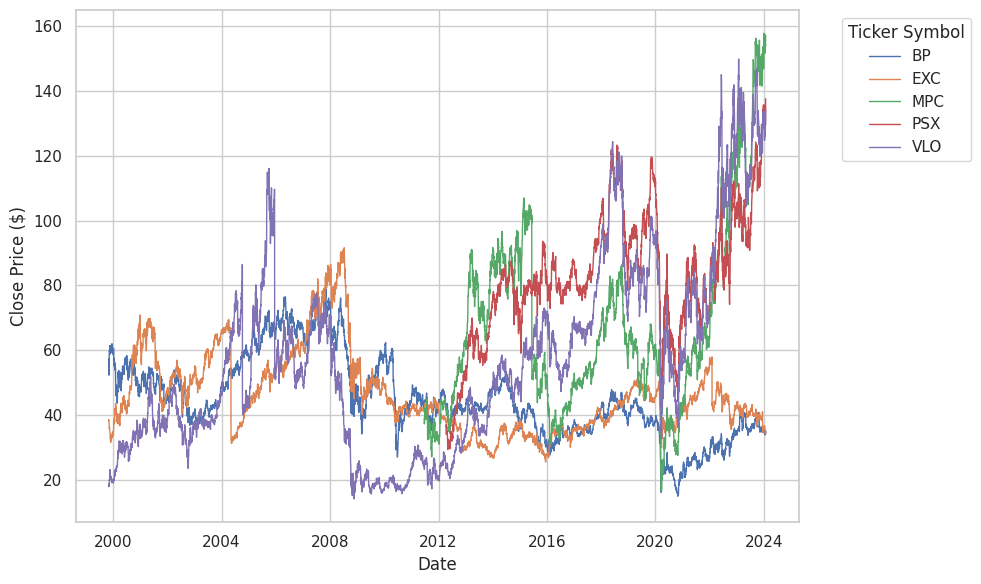

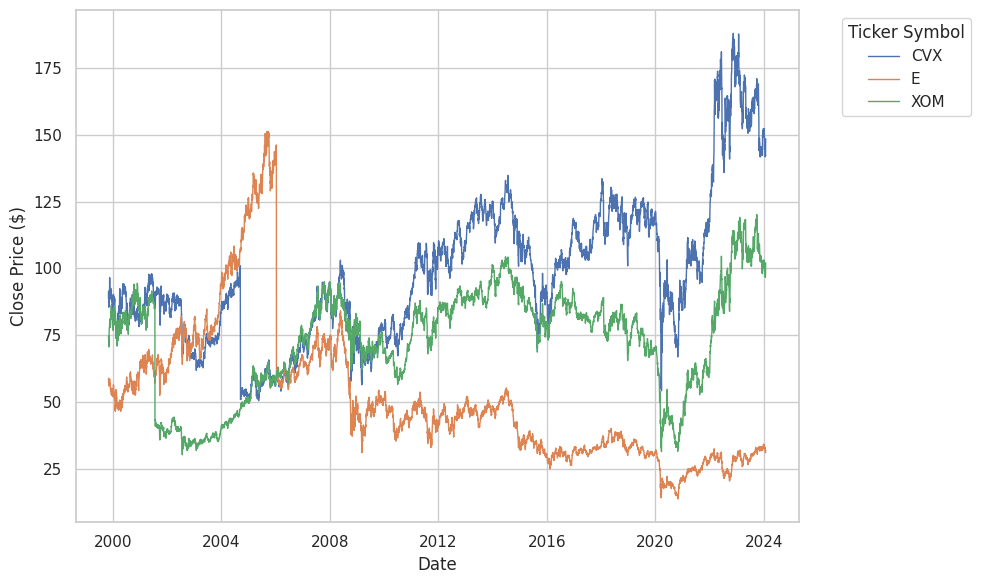

In [146]:
non_etf_stocks = stocks[stocks['Supply_Chain_Position'].isin(['upstream', 'midstream', 'downstream', 'integrated'])].copy()

positions = ['upstream', 'midstream', 'downstream', 'integrated']

for position in positions:
    subset = non_etf_stocks[non_etf_stocks['Supply_Chain_Position'] == position]

    sns.lineplot(
        data=subset,
        x='Date',
        y='Close',
        hue='Ticker_Symbol',
        linewidth=1
    )

    # plt.title(f'Stock Price Trends - {position.capitalize()} Companies')
    plt.ylabel('Close Price ($)')
    plt.xlabel('Date')
    plt.legend(title='Ticker Symbol', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

#### Selected Energy Stocks: Cross-Segment Price Trends Visualization

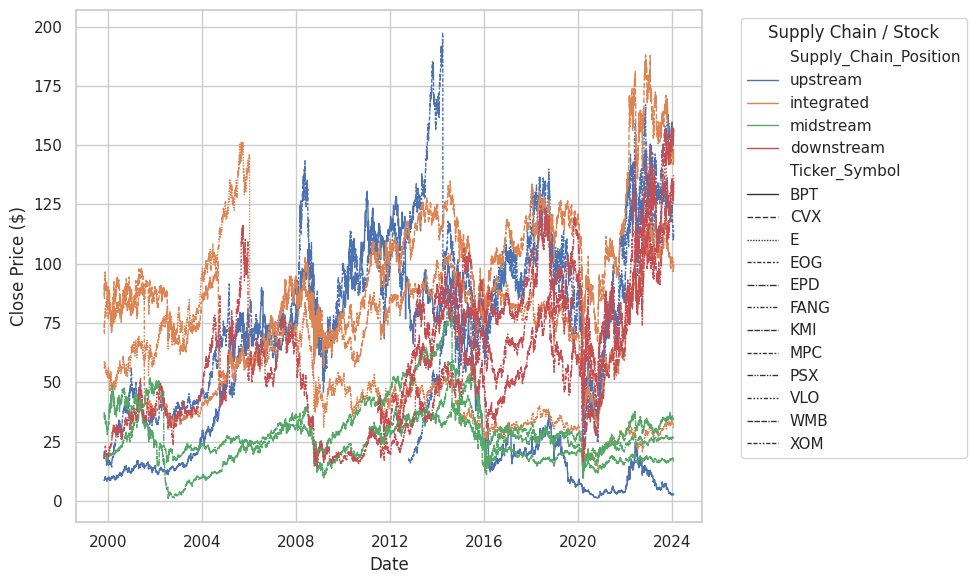

In [147]:
selected_stocks = {
    'upstream': ['BPT', 'EOG', 'FANG'],
    'midstream': ['KMI', 'EPD', 'WMB'],
    'downstream': ['PSX', 'VLO', 'MPC'],
    'integrated': ['CVX', 'XOM', 'E']
}

selected_tickers = [ticker for group in selected_stocks.values() for ticker in group]
plot_df = stocks[stocks['Ticker_Symbol'].isin(selected_tickers)].copy()

sns.lineplot(
    data=plot_df,
    x='Date',
    y='Close',
    hue='Supply_Chain_Position',
    style='Ticker_Symbol',
    linewidth=1
)

# plt.title('Selected Stock Price Trends by Supply Chain Category')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend(title='Supply Chain / Stock', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### b. Correlation Analysis Between Gasoline Prices and Stock Metrics

#### **📢 Data Cleaning and Imputation of Stock Prices and Gasoline Prices**

To ensure the consistency and completeness of our weekly financial and fuel data, we performed the following preprocessing steps:

1. **Stock Data Imputation**:
   For each of the 28 energy-related stocks, we checked for missing values in key numerical columns such as `Close`, `High`, and `Low`. Missing values were imputed using **linear interpolation**, which estimates missing values based on the average of the previous and next available days within the same stock. This method preserves the natural trend and prevents abrupt distortions in daily return calculations.

2. **Daily Log Return and Volatility Calculation**:
   After imputing missing values, we calculated:

   * Daily log returns using `log(Close_t / Close_{t-1})`
   * Daily volatility using the difference between `High` and `Low` prices.

3. **Weekly Aggregation**:
   We aggregated the daily metrics into weekly features by computing the **average daily log return** and **average daily high-low volatility** for each stock, resampled to Fridays (`W-FRI`).

4. **US Gasoline Price Imputation**:
   The weekly gasoline prices for the U.S. (`Geography = 'US'`) were originally reported on Mondays. We shifted them to Fridays to match the stock data's temporal alignment. Any missing gasoline price was also filled using **linear interpolation**, averaging the previous and next available weeks.

These preprocessing steps ensured that both stock and fuel datasets were aligned on a weekly basis and free of missing values, enabling reliable correlation and time-series analyses in subsequent steps.

In [148]:
stocks = pd.read_csv('/content/drive/MyDrive/2025-citadal-datathon/datathon_data/all_stocks_and_etfs.csv', parse_dates=['Date-Time'])
display(stocks.head())
display(stocks.tail())

Date-Time   Open     High      Low  Close    Volume Ticker_Symbol
0 2024-01-25  37.08  37.2481  35.9997  37.00  11492073           HAL
1 2024-01-24  35.68  36.9500  35.4838  36.83  14397273           HAL
2 2024-01-23  34.48  35.6900  33.9400  35.30  15096866           HAL
3 2024-01-22  33.88  34.6500  33.7750  34.43  11147116           HAL
4 2024-01-19  33.43  33.9800  33.3200  33.97   8908991           HAL

Date-Time      Open      High       Low     Close   Volume  \
144553 1999-11-05  138.6250  139.1093  136.7812  137.8750  7431500   
144554 1999-11-04  136.7500  137.3593  135.7656  136.5312  7907500   
144555 1999-11-03  136.0000  136.3750  135.1250  135.5000  7222300   
144556 1999-11-02  135.9687  137.2500  134.5937  134.5937  6516900   
144557 1999-11-01  136.5000  137.0000  135.5625  135.5625  4006500   

       Ticker_Symbol  
144553           SPY  
144554           SPY  
144555           SPY  
144556           SPY  
144557           SPY

#### Daily

In [149]:
# 1. Stocks data preparation
# Rename and sort
stocks.rename(columns={'Date-Time': 'Date'}, inplace=True)
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.sort_values(['Ticker_Symbol', 'Date'], inplace=True)

# Fill missing values by interpolating within each stock
stocks[['Close', 'High', 'Low']] = stocks.groupby('Ticker_Symbol')[['Close', 'High', 'Low']].transform(
    lambda x: x.interpolate(method='linear', limit_direction='both')
)

# I. Calculate daily log returns
stocks['Daily_Log_Return'] = stocks.groupby('Ticker_Symbol')['Close'].transform(
    lambda x: np.log(x / x.shift(1))
)

# II. Calculate daily change percentage
stocks['Daily_Pct_Return'] = stocks.groupby('Ticker_Symbol')['Close'].transform(
    lambda x: (x - x.shift(1)) / x.shift(1)
)

# III. Calculate daily high-low volatility
stocks['Daily_High_Low'] = stocks['High'] - stocks['Low']

# IV. Rolling window volatility (e.g., n=5)
window_size = 5
stocks['Rolling_Log_Return_Volatility'] = stocks.groupby('Ticker_Symbol')['Daily_Log_Return'].transform(
    lambda r: r.rolling(window=window_size).std()
)

stocks.to_csv('all_stocks_and_etfs_daily.csv', index=False)

display(stocks.head())
display(stocks.tail())

Date   Open   High    Low  Close   Volume Ticker_Symbol  \
28876 2017-07-05  40.80  40.82  37.25  37.25  5883326           BKR   
28875 2017-07-06  38.09  38.09  36.52  37.01  5088097           BKR   
28874 2017-07-07  38.14  38.59  36.12  37.91  6014535           BKR   
28873 2017-07-10  37.63  38.17  36.80  37.23  4721508           BKR   
28872 2017-07-11  37.31  37.78  36.89  37.35  2791176           BKR   

       Daily_Log_Return  Daily_Pct_Return  Daily_High_Low  \
28876               NaN               NaN            3.57   
28875         -0.006464         -0.006443            1.57   
28874          0.024027          0.024318            2.47   
28873         -0.018100         -0.017937            1.37   
28872          0.003218          0.003223            0.89   

       Rolling_Log_Return_Volatility  
28876                            NaN  
28875                            NaN  
28874                            NaN  
28873                            NaN  
28872                            NaN

Date    Open      High     Low   Close    Volume Ticker_Symbol  \
93891 2024-01-19   96.72   97.0156  96.410   96.95  20088432           XOM   
93890 2024-01-22   96.70   97.0950  95.770   96.82  19955946           XOM   
93889 2024-01-23   96.81   98.5000  96.730   97.91  15863433           XOM   
93888 2024-01-24   98.32   99.6500  97.740   99.60  17114423           XOM   
93887 2024-01-25  100.31  102.1800  99.615  102.13  22089510           XOM   

       Daily_Log_Return  Daily_Pct_Return  Daily_High_Low  \
93891          0.001548          0.001550          0.6056   
93890         -0.001342         -0.001341          1.3250   
93889          0.011195          0.011258          1.7700   
93888          0.017113          0.017261          1.9100   
93887          0.025084          0.025402          2.5650   

       Rolling_Log_Return_Volatility  
93891                       0.013100  
93890                       0.009766  
93889                       0.006804  
93888                       0.008422  
93887                       0.010921

In [150]:
# Load gasoline prices (assuming weekly_gasoline_prices.csv format)
gas = pd.read_csv('/content/drive/MyDrive/2025-citadal-datathon/datathon_data/weekly_gasoline_prices.csv', parse_dates=['Date'])
gas['Date'] = pd.to_datetime(gas['Date'])

In [151]:
gas_us = gas[gas['Geography'] == 'US'][['Date', 'Price']].copy()
gas_us['Date'] = pd.to_datetime(gas_us['Date'])
gas_us = gas_us.drop_duplicates(subset='Date')  # keep='first' by default
gas_us = gas_us.set_index('Date').sort_index()

# Same as above
daily_index = pd.date_range(start=gas_us.index.min(), end=gas_us.index.max(), freq='D')
gas_us_daily = gas_us.reindex(daily_index)
gas_us_daily['Interpolated_Price'] = gas_us_daily['Price'].interpolate(method='linear')
gas_us_daily['Ffill_Price'] = gas_us_daily['Price'].ffill()

gas_us_daily['Daily_Log_Return_Interpolated'] = np.log(gas_us_daily['Interpolated_Price']) - np.log(gas_us_daily['Interpolated_Price'].shift(1))
gas_us_daily['Daily_Log_Return_Ffill_Price'] = np.log(gas_us_daily['Ffill_Price']) - np.log(gas_us_daily['Ffill_Price'].shift(1))
gas_us_daily = gas_us_daily.reset_index().rename(columns={'index': 'Date'})

gas_us_daily.to_csv('gasoline_daily_interpolated.csv', index=False)

In [152]:
merged = pd.merge(
    stocks,
    gas_us_daily[['Date', 'Daily_Log_Return_Interpolated', 'Daily_Log_Return_Ffill_Price']],
    on='Date',
    how='inner'
)

merged_clean = merged.dropna(subset=['Daily_Log_Return', 'Daily_Pct_Return', 'Daily_Log_Return_Interpolated', 'Daily_Log_Return_Ffill_Price'])

# compute correlation matrix for each ticker
def compute_correlations(df):
    results = []
    for ticker, group in df.groupby('Ticker_Symbol'):
        corr_log_interp = group['Daily_Log_Return'].corr(group['Daily_Log_Return_Interpolated'])
        # corr_log_ffill = group['Daily_Log_Return'].corr(group['Daily_Log_Return_Ffill_Price'])
        # corr_pct_interp = group['Daily_Pct_Return'].corr(group['Daily_Log_Return_Interpolated'])
        # corr_pct_ffill = group['Daily_Pct_Return'].corr(group['Daily_Log_Return_Ffill_Price'])
        corr_vol_interp = group['Daily_High_Low'].corr(group['Daily_Log_Return_Interpolated'])
        # corr_vol_ffill = group['Daily_High_Low'].corr(group['Daily_Log_Return_Ffill_Price'])
        corr_r_vol_interp = group['Rolling_Log_Return_Volatility'].corr(group['Daily_Log_Return_Interpolated'])
        # corr_r_vol_ffill = group['Rolling_Log_Return_Volatility'].corr(group['Daily_Log_Return_Ffill_Price'])

        results.append({
            'Ticker_Symbol': ticker,
            'Corr_Log_vs_Gasoline_Interpolated': corr_log_interp,
            # 'Corr_Log_vs_Gasoline_Ffill': corr_log_ffill,
            # 'Corr_Pct_vs_Gasoline_Interpolated': corr_pct_interp,
            # 'Corr_Pct_vs_Gasoline_Ffill': corr_pct_ffill,
            'Corr_Vol_vs_Gasoline_Interpolated': corr_vol_interp,
            # 'Corr_Vol_vs_Gasoline_Ffill': corr_vol_ffill,
            'Corr_R_Vol_vs_Gasoline_Interpolated': corr_r_vol_interp,
            # 'Corr_R_Vol_vs_Gasoline_Ffill': corr_r_vol_ffill,
        })
    return pd.DataFrame(results)

correlation_results = compute_correlations(merged_clean)

correlation_results['Supply_Chain_Position'] = correlation_results['Ticker_Symbol'].map(supply_chain_map)

display(correlation_results)

Ticker_Symbol  Corr_Log_vs_Gasoline_Interpolated  \
0            BKR                           0.070224   
1             BP                           0.046140   
2            BPT                           0.045776   
3            CEO                           0.044904   
4            CHK                           0.010144   
5            COP                           0.063686   
6            CVX                           0.046216   
7            DIA                           0.004098   
8            DVN                           0.056439   
9              E                           0.038245   
10           EOG                           0.034093   
11           EPD                           0.023404   
12           EXC                           0.007609   
13          FANG                           0.038283   
14           HAL                           0.061232   
15           HES                           0.051035   
16           KMI                           0.038551   
17           MPC                           0.070646   
18           NOV                           0.055247   
19          ONEQ                           0.008851   
20           OXY                           0.055184   
21           PSX                           0.056902   
22           SLB                           0.042626   
23           SPY                           0.008925   
24           VLO                           0.070731   
25           VOO                          -0.003426   
26           WMB                           0.037135   
27           XOM                           0.036804   

    Corr_Vol_vs_Gasoline_Interpolated  Corr_R_Vol_vs_Gasoline_Interpolated  \
0                            0.048581                            -0.156332   
1                           -0.164689                            -0.196297   
2                           -0.117639                            -0.086937   
3                           -0.115625                            -0.165957   
4                           -0.003335                            -0.024502   
5                           -0.151733                            -0.179220   
6                           -0.187522                            -0.205963   
7                           -0.142013                            -0.240092   
8                           -0.158265                            -0.181418   
9                           -0.146762                            -0.156739   
10                          -0.158476                            -0.134273   
11                          -0.190924                            -0.136813   
12                          -0.167630                            -0.136834   
13                          -0.020401                            -0.165261   
14                          -0.082189                            -0.169684   
15                          -0.101690                            -0.159581   
16                          -0.197073                            -0.220213   
17                          -0.080987                            -0.105121   
18                          -0.082025                            -0.158617   
19                          -0.123049                            -0.061060   
20                          -0.127127                            -0.162520   
21                          -0.110125                            -0.151471   
22                          -0.126654                            -0.136484   
23                          -0.123278                            -0.234847   
24                          -0.054879                            -0.119583   
25                          -0.089530                            -0.143024   
26                          -0.176698                            -0.133791   
27                          -0.196544                            -0.179704   

   Supply_Chain_Position  
0               upstream  
1             downstream  
2               upstream  
3               upstream  
4        

In [153]:
# Step 1: Normalize both stock log return and gasoline log return (Interpolated)
from sklearn.preprocessing import StandardScaler

# Make a copy for normalization
merged_norm = merged_clean.copy()

# Apply normalization (z-score) per ticker group for stock log return
merged_norm['Normalized_Stock_Log_Return'] = (
    merged_norm.groupby('Ticker_Symbol')['Daily_Log_Return']
    .transform(lambda x: (x - x.mean()) / x.std())
)

# Normalize the gasoline log return (same across all tickers)
scaler = StandardScaler()
merged_norm['Normalized_Gasoline_Log_Return'] = scaler.fit_transform(
    merged_norm[['Daily_Log_Return_Interpolated']]
)

# Step 2: Add correlation between normalized returns
def compute_normalized_correlations(df):
    results = []
    for ticker, group in df.groupby('Ticker_Symbol'):
        corr_norm_log = group['Normalized_Stock_Log_Return'].corr(group['Normalized_Gasoline_Log_Return'])

        results.append({
            'Ticker_Symbol': ticker,
            'Corr_Normalized_Log_vs_Gasoline': corr_norm_log,
        })
    return pd.DataFrame(results)

normalized_corr_results = compute_normalized_correlations(merged_norm)

correlation_results = correlation_results.merge(normalized_corr_results, on='Ticker_Symbol', how='left')

display(correlation_results.head())

Ticker_Symbol  Corr_Log_vs_Gasoline_Interpolated  \
0           BKR                           0.070224   
1            BP                           0.046140   
2           BPT                           0.045776   
3           CEO                           0.044904   
4           CHK                           0.010144   

   Corr_Vol_vs_Gasoline_Interpolated  Corr_R_Vol_vs_Gasoline_Interpolated  \
0                           0.048581                            -0.156332   
1                          -0.164689                            -0.196297   
2                          -0.117639                            -0.086937   
3                          -0.115625                            -0.165957   
4                          -0.003335                            -0.024502   

  Supply_Chain_Position  Corr_Normalized_Log_vs_Gasoline  
0              upstream                         0.070224  
1            downstream                         0.046140  
2              upstream                         0.045776  
3              upstream                         0.044904  
4              upstream                         0.010144

In [154]:
# prompt: 使用 DataFrame correlation_results: heatmap, x-axle with ticker symbols

import altair as alt

# Melt the dataframe to long format for heatmap
correlation_melted = correlation_results.melt(id_vars=['Ticker_Symbol'],
                                             value_vars=['Corr_Log_vs_Gasoline_Interpolated',
                                                         'Corr_Vol_vs_Gasoline_Interpolated',
                                                         'Corr_R_Vol_vs_Gasoline_Interpolated',
                                                         'Corr_Normalized_Log_vs_Gasoline'],
                                             var_name='Correlation_Type',
                                             value_name='Correlation_Value')

# Create the heatmap
chart = alt.Chart(correlation_melted).mark_rect().encode(
    x=alt.X('Ticker_Symbol:O', axis=alt.Axis(title='Ticker Symbol')),
    y=alt.Y('Correlation_Type:O', axis=alt.Axis(title='Correlation Type')),
    color=alt.Color('Correlation_Value:Q', scale=alt.Scale(range='heatmap'), title='Correlation Value'),
    tooltip=['Ticker_Symbol', 'Correlation_Type', 'Correlation_Value']
).properties(
    # title='Daily Correlation Heatmap by Ticker Symbol'
)

chart

alt.Chart(...)

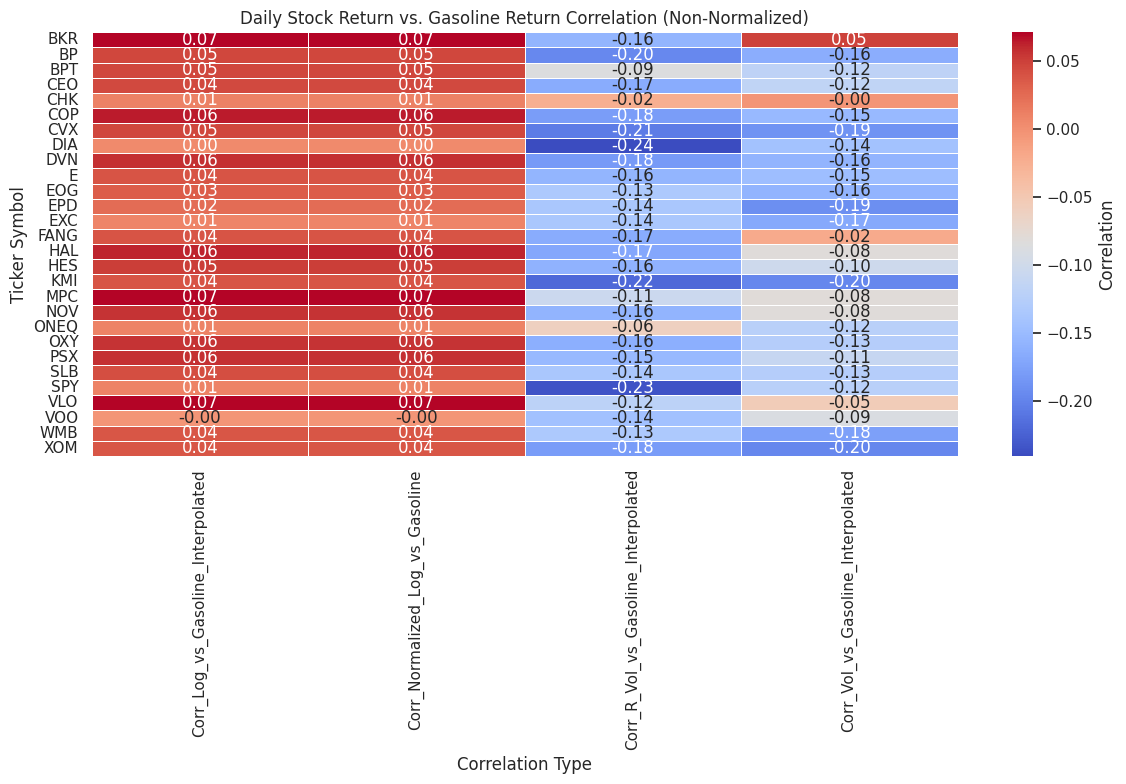

In [155]:
melted = correlation_results.melt(id_vars=['Ticker_Symbol', 'Supply_Chain_Position'],
                                  var_name='Correlation_Type',
                                  value_name='Correlation')

heatmap_data = melted.pivot_table(index='Ticker_Symbol',
                                  columns='Correlation_Type',
                                  values='Correlation')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Correlation'})
plt.title('Daily Stock Return vs. Gasoline Return Correlation (Non-Normalized)')
plt.ylabel('Ticker Symbol')
plt.xlabel('Correlation Type')
plt.tight_layout()
plt.show()

#### Brent

In [156]:
commodities = pd.read_csv('/content/drive/MyDrive/2025-citadal-datathon/datathon_data/all_commodities.csv', parse_dates=['Date_Time'])
commodities = commodities[commodities['Commodity_Simple'] == 'BRENT'].copy()
commodities.rename(columns={'Date_Time': 'Date', 'Value': 'Brent_Price'}, inplace=True)
commodities.sort_values('Date', inplace=True)

commodities['Brent_Price'] = commodities['Brent_Price'].interpolate(method='linear', limit_direction='both')

# I. Log Return
commodities['Brent_Log_Return'] = np.log(commodities['Brent_Price'] / commodities['Brent_Price'].shift(1))


# IV. Rolling Volatility (5-day window)
window_size = 5
commodities['Brent_Rolling_Volatility'] = commodities['Brent_Log_Return'].rolling(window=window_size).std()

commodities.to_csv('brent_daily_stats.csv', index=False)

display(commodities[['Date', 'Brent_Price', 'Brent_Log_Return', 'Brent_Rolling_Volatility']].tail())


Date  Brent_Price  Brent_Log_Return  Brent_Rolling_Volatility
16993 2024-01-16        80.15          0.004878                  0.010200
16992 2024-01-17        78.88         -0.015972                  0.013950
16991 2024-01-18        81.04          0.027015                  0.015860
16990 2024-01-19        80.71         -0.004080                  0.015868
16989 2024-01-22        81.70          0.012192                  0.016267

In [157]:
merged_brent = pd.merge(
    stocks,
    commodities[['Date', 'Brent_Log_Return', 'Brent_Rolling_Volatility']],
    on='Date',
    how='inner'
)

merged_brent_clean = merged_brent.dropna(subset=[
    'Daily_Log_Return', 'Daily_Pct_Return', 'Daily_High_Low', 'Rolling_Log_Return_Volatility',
    'Brent_Log_Return', 'Brent_Rolling_Volatility'
])

merged_brent_clean['Normalized_Stock_Log_Return'] = merged_brent_clean.groupby('Ticker_Symbol')['Daily_Log_Return'].transform(
    lambda x: (x - x.mean()) / x.std()
)
merged_brent_clean['Normalized_Brent_Log_Return'] = (merged_brent_clean['Brent_Log_Return'] - merged_brent_clean['Brent_Log_Return'].mean()) / merged_brent_clean['Brent_Log_Return'].std()

def compute_brent_stock_correlations(df):
    results = []
    for ticker, group in df.groupby('Ticker_Symbol'):
        result = {
            'Ticker_Symbol': ticker,
            'Corr_Log_Return_vs_Brent': group['Daily_Log_Return'].corr(group['Brent_Log_Return']),
            'Corr_Rolling_Vol_vs_Brent': group['Rolling_Log_Return_Volatility'].corr(group['Brent_Rolling_Volatility']),
            'Corr_Normalized_Log_Return_vs_Brent': group['Normalized_Stock_Log_Return'].corr(group['Normalized_Brent_Log_Return']),
        }
        results.append(result)
    return pd.DataFrame(results)

brent_corr_df = compute_brent_stock_correlations(merged_brent_clean)
brent_corr_df['Supply_Chain_Position'] = brent_corr_df['Ticker_Symbol'].map(supply_chain_map)

display(brent_corr_df)

<ipython-input-157-7e97e2f4a086>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-157-7e97e2f4a086>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Ticker_Symbol  Corr_Log_Return_vs_Brent  Corr_Rolling_Vol_vs_Brent  \
0            BKR                  0.378265                   0.405047   
1             BP                  0.352327                   0.393138   
2            BPT                  0.295259                   0.283099   
3            CEO                  0.285324                   0.232825   
4            CHK                  0.345289                   0.215476   
5            COP                  0.362085                   0.359869   
6            CVX                  0.316231                   0.333900   
7            DIA                  0.168917                   0.371285   
8            DVN                  0.362678                   0.395296   
9              E                  0.275737                   0.243200   
10           EOG                  0.336130                   0.290626   
11           EPD                  0.214907                   0.230845   
12           EXC                  0.099836                   0.265850   
13          FANG                  0.408433                   0.423242   
14           HAL                  0.346425                   0.346874   
15           HES                  0.328319                   0.284652   
16           KMI                  0.335637                   0.394374   
17           MPC                  0.305376                   0.358313   
18           NOV                  0.325630                   0.332746   
19          ONEQ                  0.063283                   0.072102   
20           OXY                  0.361316                   0.372979   
21           PSX                  0.358695                   0.419066   
22           SLB                  0.351364                   0.341269   
23           SPY                  0.176074                   0.348962   
24           VLO                  0.249133                   0.263282   
25           VOO                  0.171017                   0.202289   
26           WMB                  0.207212                   0.191001   
27           XOM                  0.287374                   0.296815   

    Corr_Normalized_Log_Return_vs_Brent Supply_Chain_Position  
0                              0.378265              upstream  
1                              0.352327            downstream  
2                              0.295259              upstream  
3                              0.285324              upstream  
4                              0.345289              upstream  
5                              0.362085              upstream  
6                              0.316231            integrated  
7                              0.168917                        
8                              0.362678              upstream  
9                              0.275737            integrated  
10                             0.336130              upstream  
11                             0.214907             midstream  
12                             0.099836            downstream  
13                             0.408433              upstream  
14                             0.346425              upstream  
15                             0.328319              upstream  
16                             0.335637             midstream  
17                             0.305376            downstream  
18                             0.325630              upstream  
19                             0.063283                        
20                             0.361316              upstream  
21                             0.358695            downstream  
22                             0.351364              upstream  
23                             0.176074                        
24                             0.249133            downstream  
25                             0.171017                        
26                             0.207212             midstream  
27                             0.287374            integrated

In [158]:
# prompt: DataFrame brent_corr_df: heatmap, x-axle is ticker symbols

import altair as alt
# Melt the dataframe to long format for Altair heatmap
melted_df = brent_corr_df.melt(id_vars=['Ticker_Symbol', 'Supply_Chain_Position'], var_name='Correlation_Type', value_name='Correlation_Value')

# Create the heatmap using Altair
chart = alt.Chart(melted_df).mark_rect().encode(
    # X-axis for Ticker Symbol
    x=alt.X('Ticker_Symbol:O', title='Ticker Symbol'),
    # Y-axis for Correlation Type
    y=alt.Y('Correlation_Type:O', title='Correlation Type'),
    # Color based on Correlation Value
    color=alt.Color('Correlation_Value:Q', scale=alt.Scale(range='heatmap')),
    # Tooltip to display information on hover
    tooltip=['Ticker_Symbol', 'Correlation_Type', 'Correlation_Value', 'Supply_Chain_Position']
).properties(
    # title='Correlation Heatmap: Ticker Symbol vs. Brent' # Add a title
)

# Display the chart
chart

alt.Chart(...)

In [159]:
stocks_weekly = stocks.set_index('Date').groupby('Ticker_Symbol')['Close'].resample('W-MON').last().reset_index()
commodities_weekly = commodities.set_index('Date').resample('W-MON').agg({
    'Brent_Price': 'last'
}).reset_index()

# Weekly log return and rolling volatility for Brent
commodities_weekly['Brent_Log_Return'] = np.log(commodities_weekly['Brent_Price'] / commodities_weekly['Brent_Price'].shift(1))
commodities_weekly['Brent_Rolling_Volatility'] = commodities_weekly['Brent_Log_Return'].rolling(window=5).std()

# Normalize
commodities_weekly['Brent_Log_Return_Z'] = (commodities_weekly['Brent_Log_Return'] - commodities_weekly['Brent_Log_Return'].mean()) / commodities_weekly['Brent_Log_Return'].std()
commodities_weekly['Brent_Rolling_Volatility_Z'] = (commodities_weekly['Brent_Rolling_Volatility'] - commodities_weekly['Brent_Rolling_Volatility'].mean()) / commodities_weekly['Brent_Rolling_Volatility'].std()


In [160]:
# Calculate weekly log return for each ticker
stocks_weekly['Weekly_Log_Return'] = stocks_weekly.groupby('Ticker_Symbol')['Close'].transform(lambda x: np.log(x / x.shift(1)))
stocks_weekly['Weekly_Log_Return_Z'] = stocks_weekly.groupby('Ticker_Symbol')['Weekly_Log_Return'].transform(lambda x: (x - x.mean()) / x.std())

# Weekly rolling volatility of log return (window=5)
stocks_weekly['Rolling_Volatility'] = stocks_weekly.groupby('Ticker_Symbol')['Weekly_Log_Return'].transform(lambda x: x.rolling(window=5).std())
stocks_weekly['Rolling_Volatility_Z'] = stocks_weekly.groupby('Ticker_Symbol')['Rolling_Volatility'].transform(lambda x: (x - x.mean()) / x.std())


In [161]:
merged_weekly = pd.merge(
    stocks_weekly,
    commodities_weekly[['Date', 'Brent_Log_Return_Z', 'Brent_Rolling_Volatility_Z']],
    on='Date',
    how='inner'
)

def compute_weekly_correlations(df):
    results = []
    for ticker, group in df.groupby('Ticker_Symbol'):
        corr_log = group['Weekly_Log_Return_Z'].corr(group['Brent_Log_Return_Z'])
        corr_vol = group['Rolling_Volatility_Z'].corr(group['Brent_Rolling_Volatility_Z'])
        results.append({
            'Ticker_Symbol': ticker,
            'Weekly_Corr_Log_Return_Z': corr_log,
            'Weekly_Corr_Rolling_Volatility_Z': corr_vol
        })
    return pd.DataFrame(results)

brent_weekly_corr_df = compute_weekly_correlations(merged_weekly)
brent_weekly_corr_df['Supply_Chain_Position'] = brent_weekly_corr_df['Ticker_Symbol'].map(supply_chain_map)

display(brent_weekly_corr_df)


Ticker_Symbol  Weekly_Corr_Log_Return_Z  Weekly_Corr_Rolling_Volatility_Z  \
0            BKR                  0.444579                          0.434655   
1             BP                  0.401612                          0.416942   
2            BPT                  0.384986                          0.305601   
3            CEO                  0.425021                          0.231212   
4            CHK                  0.469355                          0.530646   
5            COP                  0.461719                          0.337813   
6            CVX                  0.368501                          0.330103   
7            DIA                  0.205322                          0.355248   
8            DVN                  0.472045                          0.497369   
9              E                  0.345576                          0.240493   
10           EOG                  0.427639                          0.267023   
11           EPD                  0.281886                          0.258809   
12           EXC                  0.109586                          0.223728   
13          FANG                  0.528674                          0.477937   
14           HAL                  0.467681                          0.392880   
15           HES                  0.449916                          0.311014   
16           KMI                  0.414581                          0.432241   
17           MPC                  0.395220                          0.345388   
18           NOV                  0.455738                          0.376034   
19          ONEQ                  0.092675                          0.075934   
20           OXY                  0.461067                          0.410871   
21           PSX                  0.436118                          0.435293   
22           SLB                  0.461091                          0.291044   
23           SPY                  0.227663                          0.353142   
24           VLO                  0.295474                          0.232617   
25           VOO                  0.204891                          0.160273   
26           WMB                  0.295534                          0.217442   
27           XOM                  0.358513                          0.292106   

   Supply_Chain_Position  
0               upstream  
1             downstream  
2               upstream  
3               upstream  
4               upstream  
5               upstream  
6             integrated  
7                         
8               upstream  
9             integrated  
10              upstream  
11             midstream  
12            downstream  
13              upstream  
14              upstream  
15              upstream  
16             midstream  
17            downstream  
18              upstream  
19                        
20              upstream  
21            downstream  
22              upstream  
23                        
24            downstream  
25                        
26             midstream  
27            integrated

In [162]:
# prompt: 使用 DataFrame brent_weekly_corr_df: heatmap, x axel is ticker symbol

import altair as alt
# Melt the dataframe to a long format suitable for a heatmap
brent_weekly_corr_melted = brent_weekly_corr_df.melt(
    id_vars=['Ticker_Symbol', 'Supply_Chain_Position'],
    value_vars=['Weekly_Corr_Log_Return_Z', 'Weekly_Corr_Rolling_Volatility_Z'],
    var_name='Correlation_Type',
    value_name='Correlation_Value'
)
# Create the heatmap using Altair
chart = alt.Chart(brent_weekly_corr_melted).mark_rect().encode(
    # Set Ticker_Symbol on the x-axis
    x=alt.X('Ticker_Symbol:O', axis=alt.Axis(title='Ticker Symbol')),
    # Set Correlation_Type on the y-axis
    y=alt.Y('Correlation_Type:O', axis=alt.Axis(title='Correlation Type')),
    # Color the heatmap based on the Correlation_Value
    color=alt.Color('Correlation_Value:Q', scale=alt.Scale(range='heatmap')),
    tooltip=['Ticker_Symbol', 'Correlation_Type', 'Correlation_Value']
).properties(
    # title='Heatmap of Weekly Correlations by Ticker Symbol'
)
chart

alt.Chart(...)

漲幅沒有因為因為。可以研究跟成交量有關的。新角度的觀點研究買賣訊號。

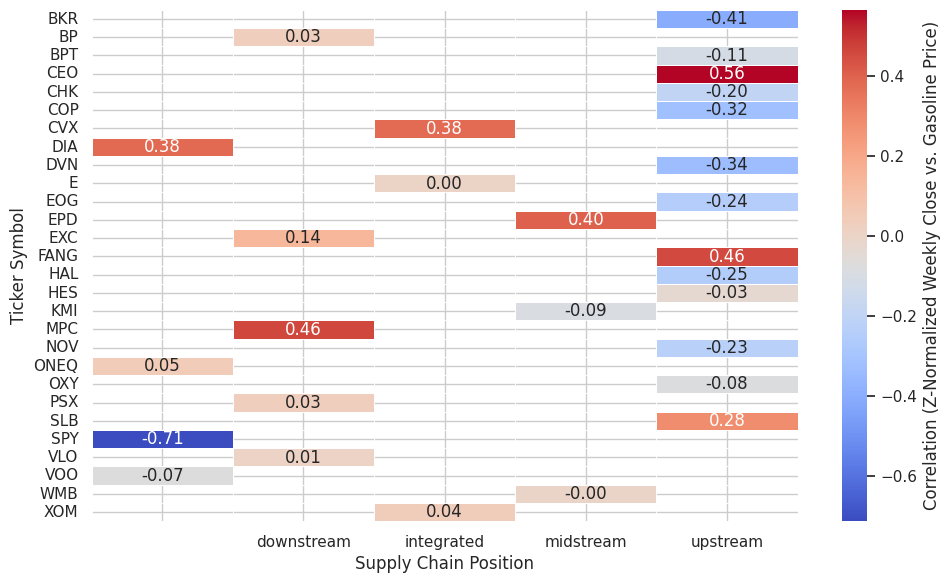

In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Prepare weekly stock close prices
weekly_stock_price = stocks.groupby('Ticker_Symbol').resample('W-MON', on='Date')['Close'].last().reset_index()
weekly_stock_price = weekly_stock_price.rename(columns={'Close': 'Weekly_Close'})

# Step 2: Prepare gasoline price (already weekly)
gas_us = gas[gas['Geography'] == 'US'][['Date', 'Price']].copy()
gas_us['Date'] = pd.to_datetime(gas_us['Date'])

# Step 3: Merge stock and gasoline prices
merged_direct = pd.merge(
    weekly_stock_price,
    gas_us,
    on='Date',
    how='inner'
)

# Step 4: Normalize both stock and gasoline price series using z-score within each ticker group
def compute_normalized_weekly_correlation(df):
    results = []
    for ticker, group in df.groupby('Ticker_Symbol'):
        group = group.copy()
        group['Norm_Stock'] = (group['Weekly_Close'] - group['Weekly_Close'].mean()) / group['Weekly_Close'].std()
        group['Norm_Gasoline'] = (group['Price'] - group['Price'].mean()) / group['Price'].std()
        corr = group['Norm_Stock'].corr(group['Norm_Gasoline'])

        results.append({
            'Ticker_Symbol': ticker,
            'Corr_Normalized_Close_vs_Gasoline': corr
        })
    return pd.DataFrame(results)

# Step 5: Compute correlation and map to supply chain
direct_corr_df = compute_normalized_weekly_correlation(merged_direct)
direct_corr_df['Supply_Chain_Position'] = direct_corr_df['Ticker_Symbol'].map(supply_chain_map)

# Step 6: Pivot and plot heatmap
heatmap_direct = direct_corr_df.pivot_table(
    index='Ticker_Symbol',
    columns='Supply_Chain_Position',
    values='Corr_Normalized_Close_vs_Gasoline',
    aggfunc='first'
)

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_direct,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Correlation (Z-Normalized Weekly Close vs. Gasoline Price)'}
)
# plt.title('Normalized Correlation between Weekly Stock Close and Gasoline Price')
plt.xlabel('Supply Chain Position')
plt.ylabel('Ticker Symbol')
plt.tight_layout()
plt.show()

In [164]:
stocks['Close_Z'] = stocks.groupby('Ticker_Symbol')['Close'].transform(
    lambda x: (x - x.mean()) / x.std()
)

In [165]:
gas_us_daily['Price_Z'] = (gas_us_daily['Interpolated_Price'] - gas_us_daily['Interpolated_Price'].mean()) / gas_us_daily['Interpolated_Price'].std()

In [166]:
merged_daily = pd.merge(
    stocks[['Date', 'Ticker_Symbol', 'Close_Z']],
    gas_us_daily[['Date', 'Price_Z']],
    on='Date',
    how='inner'
)

daily_corr_results = merged_daily.groupby('Ticker_Symbol').apply(
    lambda df: df['Close_Z'].corr(df['Price_Z'])
).reset_index(name='Daily_Zscore_Correlation')

daily_corr_results['Supply_Chain_Position'] = daily_corr_results['Ticker_Symbol'].map(supply_chain_map)


<ipython-input-166-fdbd930167d4>:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



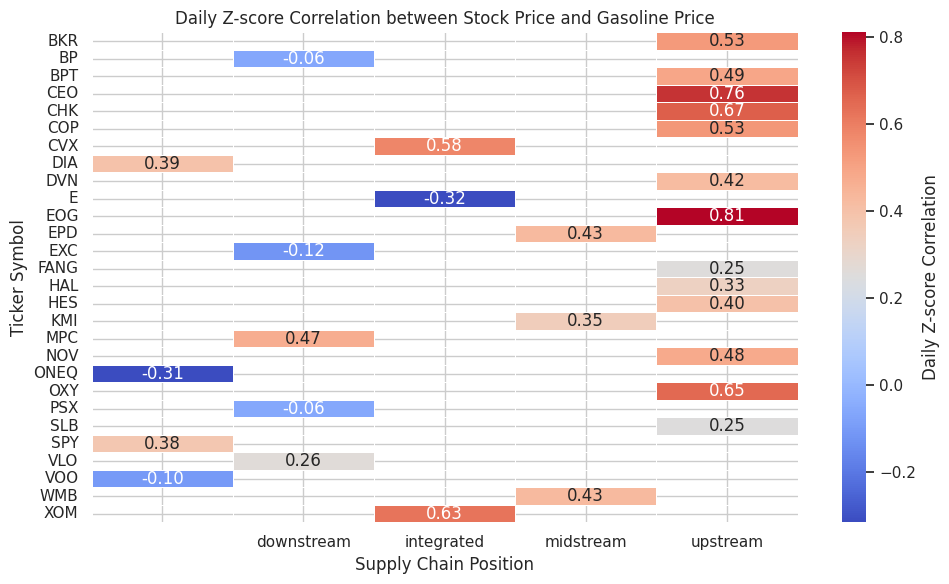

In [167]:
heatmap_daily = daily_corr_results.pivot_table(
    index='Ticker_Symbol',
    columns='Supply_Chain_Position',
    values='Daily_Zscore_Correlation',
    aggfunc='first'
)

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_daily,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Daily Z-score Correlation'}
)
plt.title('Daily Z-score Correlation between Stock Price and Gasoline Price')
plt.xlabel('Supply Chain Position')
plt.ylabel('Ticker Symbol')
plt.tight_layout()
plt.show()

#### Weekly

In [168]:
# Step 1: Preparation
stocks.rename(columns={'Date-Time': 'Date'}, inplace=True)
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.sort_values(['Ticker_Symbol', 'Date'], inplace=True)

# Step 2: Interpolate missing values
stocks[['Close', 'High', 'Low', 'Open']] = stocks.groupby('Ticker_Symbol')[['Close', 'High', 'Low', 'Open']].transform(
    lambda x: x.interpolate(method='linear', limit_direction='both')
)

# Step 3: Compute Weekly Metrics
weekly_features_list = []

for ticker, group in stocks.groupby('Ticker_Symbol'):
    group = group.set_index('Date')

    # I. Weekly log return: log(Close_t / Close_t-1)
    weekly_log_return = np.log(group['Close'].resample('W-MON').last() / group['Close'].resample('W-MON').last().shift(1))

    # II. Weekly high-low volatility: mean of (High - Low)
    weekly_volatility = (group['High'] - group['Low']).resample('W-MON').mean()

    # III. Weekly open-close gap: Friday Close - Monday Open (same week)
    monday_open = group['Open'].resample('W-MON').first()
    friday_close = group['Close'].resample('W-MON').last()
    open_close_gap = friday_close - monday_open

    # IV. Weekly variance
    weekly_variance = group['Close'].resample('W-MON').var()
    weekly_std = group['Close'].resample('W-MON').std()

    # Combine into DataFrame
    combined = pd.DataFrame({
        'Weekly_Log_Return': weekly_log_return,
        'Weekly_Volatility': weekly_volatility,
        'Weekly_Open_Close_Gap': open_close_gap,
        'Weekly_Variance': weekly_variance,
        'Weekly_Std': weekly_std,
    })
    combined['Ticker_Symbol'] = ticker
    combined = combined.reset_index()

    weekly_features_list.append(combined)

# Concatenate all
weekly_stock_metrics_final = pd.concat(weekly_features_list, ignore_index=True)

display(weekly_stock_metrics_final.head())
display(weekly_stock_metrics_final.tail())

Date  Weekly_Log_Return  Weekly_Volatility  Weekly_Open_Close_Gap  \
0 2017-07-10                NaN            2.24500                  -3.57   
1 2017-07-17           0.010952            0.78100                   0.33   
2 2017-07-24          -0.091174            1.16800                  -3.16   
3 2017-07-31           0.071047            1.36486                   2.08   
4 2017-08-07          -0.065244            0.74500                  -2.26   

   Weekly_Variance  Weekly_Std Ticker_Symbol  
0          0.15120    0.388844           BKR  
1          0.08415    0.290086           BKR  
2          1.50337    1.226120           BKR  
3          0.54305    0.736919           BKR  
4          0.17265    0.415512           BKR

Date  Weekly_Log_Return  Weekly_Volatility  Weekly_Open_Close_Gap  \
30011 2024-01-01          -0.019120           1.145000                  -2.76   
30012 2024-01-08           0.009358           2.028740                   0.00   
30013 2024-01-15          -0.009658           1.539925                  -1.34   
30014 2024-01-22          -0.031816           1.412120                  -3.00   
30015 2024-01-29           0.053393           2.081667                   5.32   

       Weekly_Variance  Weekly_Std Ticker_Symbol  
30011         1.143825    1.069498           XOM  
30012         0.715800    0.846050           XOM  
30013         0.438767    0.662395           XOM  
30014         0.134970    0.367383           XOM  
30015         4.510900    2.123888           XOM

In [169]:
gas_us = gas[gas['Geography'] == 'US'].copy()
gas_us = gas_us[['Date', 'Price']].sort_values('Date')

gas_us['Weekly_Log_Return'] = np.log(gas_us['Price']) - np.log(gas_us['Price'].shift(1))
gas_us['Weekly_Pct_Change'] = (gas_us['Price'] - gas_us['Price'].shift(1)) / gas_us['Price'].shift(1)

display(gas_us.head())
display(gas_us.tail())

Date  Price  Weekly_Log_Return  Weekly_Pct_Change
0     2000-01-03  1.260                NaN                NaN
15024 2000-01-03  1.309           0.038152           0.038889
12520 2000-01-03  1.365           0.041891           0.042781
1252  2000-01-03  1.306          -0.044185          -0.043223
3756  2000-01-03  1.353           0.035355           0.035988

Date  Price  Weekly_Log_Return  Weekly_Pct_Change
16275 2023-12-25  3.914           0.127056           0.135480
3755  2023-12-25  3.116          -0.228010          -0.203883
2503  2023-12-25  3.357           0.074498           0.077343
8763  2023-12-25  3.822           0.129726           0.138517
17157 2023-12-25  3.914           0.023786           0.024071

In [170]:
merged_weekly = pd.merge(
    weekly_stock_metrics_final,
    gas_us[['Date', 'Weekly_Log_Return']],
    on='Date',
    how='inner',
    suffixes=('', '_Gasoline')
)

def compute_weekly_correlations(df):
    results = []
    for ticker, group in df.groupby('Ticker_Symbol'):
        corr_log = group['Weekly_Log_Return'].corr(group['Weekly_Log_Return_Gasoline'])
        corr_gap = group['Weekly_Open_Close_Gap'].corr(group['Weekly_Log_Return_Gasoline'])
        corr_vol = group['Weekly_Volatility'].corr(group['Weekly_Log_Return_Gasoline'])
        corr_var = group['Weekly_Variance'].corr(group['Weekly_Log_Return_Gasoline'])
        # corr_std = group['Weekly_Std'].corr(group['Weekly_Log_Return_Gasoline'])

        results.append({
            'Ticker_Symbol': ticker,
            'Corr_Log_Return': corr_log,
            'Corr_Open_Close_Gap': corr_gap,
            'Corr_Volatility': corr_vol,
            'Corr_Variance': corr_var,
            # 'Corr_Std': corr_std,
        })
    return pd.DataFrame(results)

weekly_correlation_results = compute_weekly_correlations(merged_weekly)

weekly_correlation_results['Supply_Chain_Position'] = weekly_correlation_results['Ticker_Symbol'].map(supply_chain_map)

display(weekly_correlation_results)

Ticker_Symbol  Corr_Log_Return  Corr_Open_Close_Gap  Corr_Volatility  \
0            BKR        -0.002377            -0.002379        -0.000769   
1             BP         0.000981             0.001603        -0.002586   
2            BPT         0.002926             0.004233        -0.002045   
3            CEO         0.002065             0.001533        -0.001282   
4            CHK         0.004112             0.002045        -0.001289   
5            COP         0.002759             0.001915        -0.001987   
6            CVX         0.000467            -0.000097        -0.003622   
7            DIA        -0.001068            -0.001887        -0.003438   
8            DVN         0.003649             0.003077        -0.002885   
9              E         0.001703             0.001641        -0.003117   
10           EOG         0.002312             0.001290        -0.002078   
11           EPD         0.000248             0.000987        -0.001689   
12           EXC        -0.001943            -0.001970        -0.003133   
13          FANG         0.001616            -0.000114         0.000295   
14           HAL         0.001366             0.001394        -0.000502   
15           HES         0.001257             0.000999        -0.001347   
16           KMI        -0.000215             0.000203        -0.003562   
17           MPC         0.000052             0.000823        -0.000630   
18           NOV         0.001842             0.002132        -0.001483   
19          ONEQ         0.003195             0.003039        -0.002793   
20           OXY         0.002597             0.003352        -0.002043   
21           PSX         0.001432             0.001666         0.000230   
22           SLB         0.000652             0.001585        -0.001746   
23           SPY        -0.000431            -0.001188        -0.003960   
24           VLO         0.001698             0.001871        -0.000470   
25           VOO        -0.001944            -0.002952        -0.003182   
26           WMB         0.005055             0.004940        -0.002992   
27           XOM         0.000537             0.000659        -0.003361   

    Corr_Variance Supply_Chain_Position  
0        0.001492              upstream  
1       -0.000450            downstream  
2       -0.002541              upstream  
3       -0.001003              upstream  
4        0.000436              upstream  
5        0.000975              upstream  
6       -0.001151            integrated  
7        0.000953                        
8       -0.004202              upstream  
9        0.000824            integrated  
10      -0.002129              upstream  
11      -0.000107             midstream  
12       0.002589            downstream  
13       0.000545              upstream  
14       0.001209              upstream  
15       0.000809              upstream  
16      -0.005228             midstream  
17       0.004359            downstream  
18      -0.000473              upstream  
19      -0.003200                        
20      -0.000705              upstream  
21       0.002670            downstream  
22      -0.000609              upstream  
23      -0.000880                        
24       0.000756            downstream  
25      -0.003344                        
26      -0.003544             midstream  
27      -0.000748            integrated

In [171]:
# prompt: 使用 DataFrame weekly_correlation_results: heatmap, x-axle with ticker symbols

import altair as alt

# Melt the dataframe to long format for heatmap
melted_df = weekly_correlation_results.melt(id_vars=['Ticker_Symbol'],
                                              value_vars=['Corr_Log_Return', 'Corr_Open_Close_Gap', 'Corr_Volatility', 'Corr_Variance'],
                                              var_name='Correlation Type',
                                              value_name='Correlation Value')

# Create the heatmap
chart = alt.Chart(melted_df).mark_rect().encode(
    x=alt.X('Ticker_Symbol:O', title='Ticker Symbol'),
    y=alt.Y('Correlation Type:O', title='Correlation Type'),
    color=alt.Color('Correlation Value:Q', scale=alt.Scale(range='heatmap'), title='Correlation Value'),
    tooltip=['Ticker_Symbol', 'Correlation Type', 'Correlation Value']
).properties(
    # title='Weekly Correlation Heatmap by Ticker Symbol'
)

chart

alt.Chart(...)

In [172]:
# add the close price on Friday
weekly_stock_price = stocks.groupby('Ticker_Symbol').resample('W-MON', on='Date')['Close'].last().reset_index()
weekly_stock_price = weekly_stock_price.rename(columns={'Close': 'Weekly_Close'})

weekly_stock_price['Weekly_Close_Z'] = weekly_stock_price.groupby('Ticker_Symbol')['Weekly_Close'].transform(
    lambda x: (x - x.mean()) / x.std()
)

gas_us = gas[gas['Geography'] == 'US'][['Date', 'Price']].copy()
gas_us['Date'] = pd.to_datetime(gas_us['Date'])
gas_us['Price_Z'] = (gas_us['Price'] - gas_us['Price'].mean()) / gas_us['Price'].std()

normalized_df = pd.merge(
    weekly_stock_price,
    gas_us[['Date', 'Price_Z']],
    on='Date',
    how='inner'
)

# correlation (z-normalized values)
correlation_results = normalized_df.groupby('Ticker_Symbol').apply(
    lambda g: g['Weekly_Close_Z'].corr(g['Price_Z'])
).reset_index(name='Zscore_Correlation')

correlation_results['Supply_Chain_Position'] = correlation_results['Ticker_Symbol'].map(supply_chain_map)

display(correlation_results)

<ipython-input-172-79244b356f6c>:21: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Ticker_Symbol  Zscore_Correlation Supply_Chain_Position
0            BKR           -0.406399              upstream
1             BP            0.034949            downstream
2            BPT           -0.111800              upstream
3            CEO            0.564661              upstream
4            CHK           -0.195863              upstream
5            COP           -0.320134              upstream
6            CVX            0.379757            integrated
7            DIA            0.380818                      
8            DVN           -0.335634              upstream
9              E            0.004473            integrated
10           EOG           -0.244795              upstream
11           EPD            0.402111             midstream
12           EXC            0.143840            downstream
13          FANG            0.455875              upstream
14           HAL           -0.250044              upstream
15           HES           -0.030026              upstream
16           KMI           -0.091937             midstream
17           MPC            0.460356            downstream
18           NOV           -0.231870              upstream
19          ONEQ            0.045812                      
20           OXY           -0.083307              upstream
21           PSX            0.033949            downstream
22           SLB            0.281702              upstream
23           SPY           -0.712974                      
24           VLO            0.007497            downstream
25           VOO           -0.071611                      
26           WMB           -0.001575             midstream
27           XOM            0.035779            integrated

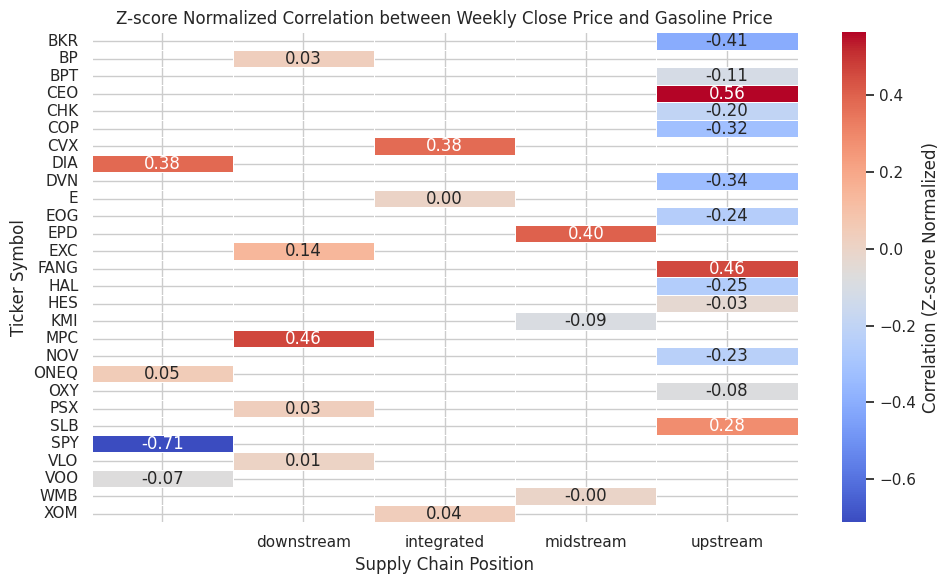

In [173]:
heatmap_df = correlation_results.pivot_table(
    index='Ticker_Symbol',
    columns='Supply_Chain_Position',
    values='Zscore_Correlation',
    aggfunc='first'
)

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_df,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Correlation (Z-score Normalized)'}
)
plt.title('Z-score Normalized Correlation between Weekly Close Price and Gasoline Price')
plt.xlabel('Supply Chain Position')
plt.ylabel('Ticker Symbol')
plt.tight_layout()
plt.show()

By normalizing both gasoline prices and stock close prices with Z-score, we aim to remove the scale effects and focus on co-movement patterns. However, the heatmap reveals limited correlation between gasoline prices and most energy companies' stock performance. This suggests that additional macroeconomic variables or firm-specific events may be more dominant in driving stock behavior across the supply chain.

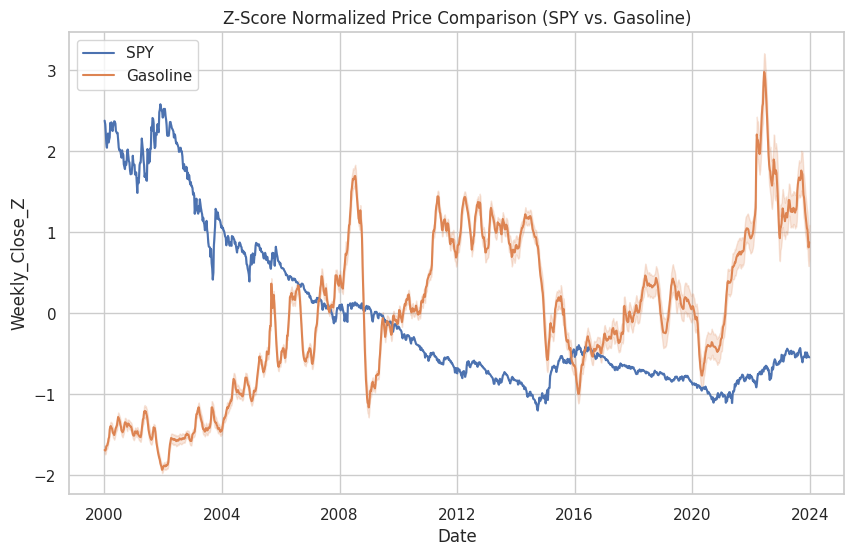

In [174]:
sns.lineplot(data=normalized_df[normalized_df['Ticker_Symbol'] == 'SPY'], x='Date', y='Weekly_Close_Z', label='SPY')
sns.lineplot(data=normalized_df[normalized_df['Ticker_Symbol'] == 'SPY'], x='Date', y='Price_Z', label='Gasoline')
plt.title('Z-Score Normalized Price Comparison (SPY vs. Gasoline)')
plt.show()

In [175]:
stocks = pd.read_csv('/content/drive/MyDrive/2025-citadal-datathon/datathon_data/all_stocks_and_etfs.csv', parse_dates=['Date-Time'])
display(stocks.head())
display(stocks.tail())

# 1. Stocks data preparation
# Rename and sort
stocks.rename(columns={'Date-Time': 'Date'}, inplace=True)
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.sort_values(['Ticker_Symbol', 'Date'], inplace=True)

# Fill missing values by interpolating within each stock
stocks[['Close', 'High', 'Low']] = stocks.groupby('Ticker_Symbol')[['Close', 'High', 'Low']].transform(
    lambda x: x.interpolate(method='linear', limit_direction='both')
)

# I. Calculate daily log returns
stocks['Daily_Log_Return'] = stocks.groupby('Ticker_Symbol')['Close'].transform(
    lambda x: np.log(x / x.shift(1))
)

# II. Calculate daily change percentage
stocks['Daily_Pct_Return'] = stocks.groupby('Ticker_Symbol')['Close'].transform(
    lambda x: (x - x.shift(1)) / x.shift(1)
)

# III. Calculate daily high-low volatility
stocks['Daily_High_Low'] = stocks['High'] - stocks['Low']

# IV. Rolling window volatility (e.g., n=5)
window_size = 5
stocks['Rolling_Log_Return_Volatility'] = stocks.groupby('Ticker_Symbol')['Daily_Log_Return'].transform(
    lambda r: r.rolling(window=window_size).std()
)

stocks.to_csv('all_stocks_and_etfs_daily.csv', index=False)

display(stocks.head())
display(stocks.tail())

Date-Time   Open     High      Low  Close    Volume Ticker_Symbol
0 2024-01-25  37.08  37.2481  35.9997  37.00  11492073           HAL
1 2024-01-24  35.68  36.9500  35.4838  36.83  14397273           HAL
2 2024-01-23  34.48  35.6900  33.9400  35.30  15096866           HAL
3 2024-01-22  33.88  34.6500  33.7750  34.43  11147116           HAL
4 2024-01-19  33.43  33.9800  33.3200  33.97   8908991           HAL

Date-Time      Open      High       Low     Close   Volume  \
144553 1999-11-05  138.6250  139.1093  136.7812  137.8750  7431500   
144554 1999-11-04  136.7500  137.3593  135.7656  136.5312  7907500   
144555 1999-11-03  136.0000  136.3750  135.1250  135.5000  7222300   
144556 1999-11-02  135.9687  137.2500  134.5937  134.5937  6516900   
144557 1999-11-01  136.5000  137.0000  135.5625  135.5625  4006500   

       Ticker_Symbol  
144553           SPY  
144554           SPY  
144555           SPY  
144556           SPY  
144557           SPY

Date   Open   High    Low  Close   Volume Ticker_Symbol  \
28876 2017-07-05  40.80  40.82  37.25  37.25  5883326           BKR   
28875 2017-07-06  38.09  38.09  36.52  37.01  5088097           BKR   
28874 2017-07-07  38.14  38.59  36.12  37.91  6014535           BKR   
28873 2017-07-10  37.63  38.17  36.80  37.23  4721508           BKR   
28872 2017-07-11  37.31  37.78  36.89  37.35  2791176           BKR   

       Daily_Log_Return  Daily_Pct_Return  Daily_High_Low  \
28876               NaN               NaN            3.57   
28875         -0.006464         -0.006443            1.57   
28874          0.024027          0.024318            2.47   
28873         -0.018100         -0.017937            1.37   
28872          0.003218          0.003223            0.89   

       Rolling_Log_Return_Volatility  
28876                            NaN  
28875                            NaN  
28874                            NaN  
28873                            NaN  
28872                            NaN

Date    Open      High     Low   Close    Volume Ticker_Symbol  \
93891 2024-01-19   96.72   97.0156  96.410   96.95  20088432           XOM   
93890 2024-01-22   96.70   97.0950  95.770   96.82  19955946           XOM   
93889 2024-01-23   96.81   98.5000  96.730   97.91  15863433           XOM   
93888 2024-01-24   98.32   99.6500  97.740   99.60  17114423           XOM   
93887 2024-01-25  100.31  102.1800  99.615  102.13  22089510           XOM   

       Daily_Log_Return  Daily_Pct_Return  Daily_High_Low  \
93891          0.001548          0.001550          0.6056   
93890         -0.001342         -0.001341          1.3250   
93889          0.011195          0.011258          1.7700   
93888          0.017113          0.017261          1.9100   
93887          0.025084          0.025402          2.5650   

       Rolling_Log_Return_Volatility  
93891                       0.013100  
93890                       0.009766  
93889                       0.006804  
93888                       0.008422  
93887                       0.010921

In [176]:
commodities = pd.read_csv('/content/drive/MyDrive/2025-citadal-datathon/datathon_data/all_commodities.csv', parse_dates=['Date_Time'])
commodities = commodities[commodities['Commodity_Simple'] == 'BRENT'].copy()
commodities.rename(columns={'Date_Time': 'Date', 'Value': 'Brent_Price'}, inplace=True)
commodities.sort_values('Date', inplace=True)

# Calculate daily log return and Z-score
commodities['Brent_Log_Return'] = np.log(commodities['Brent_Price'] / commodities['Brent_Price'].shift(1))
commodities['Brent_Zscore'] = (commodities['Brent_Price'] - commodities['Brent_Price'].mean()) / commodities['Brent_Price'].std()

merged_daily = pd.merge(stocks, commodities[['Date', 'Brent_Price', 'Brent_Log_Return', 'Brent_Zscore']], on='Date', how='inner')
# Weekly aggregation
stocks_weekly = stocks.set_index('Date').groupby('Ticker_Symbol')['Close'].resample('W-MON').last().reset_index()
commodities_weekly = commodities.set_index('Date')['Brent_Price'].resample('W-MON').last().reset_index()

# Normalize weekly values using Z-score
stocks_weekly['Close_Zscore'] = stocks_weekly.groupby('Ticker_Symbol')['Close'].transform(lambda x: (x - x.mean()) / x.std())
commodities_weekly['Brent_Zscore'] = (commodities_weekly['Brent_Price'] - commodities_weekly['Brent_Price'].mean()) / commodities_weekly['Brent_Price'].std()

# Merge weekly stock and commodity data
merged_weekly = pd.merge(stocks_weekly, commodities_weekly[['Date', 'Brent_Zscore']], on='Date', how='inner')

# Calculate correlation between normalized daily stock price and Brent price
daily_results = []
for ticker, group in merged_daily.groupby('Ticker_Symbol'):
    daily_corr = group['Close'].corr(group['Brent_Zscore'])
    daily_results.append({'Ticker_Symbol': ticker, 'Daily_Corr_Close_vs_Brent_Zscore': daily_corr})

# Calculate correlation between normalized weekly stock price and Brent price
weekly_results = []
for ticker, group in merged_weekly.groupby('Ticker_Symbol'):
    weekly_corr = group['Close_Zscore'].corr(group['Brent_Zscore'])
    weekly_results.append({'Ticker_Symbol': ticker, 'Weekly_Corr_Zscore_vs_Brent_Zscore': weekly_corr})

# Merge results
correlation_combined = pd.DataFrame(daily_results).merge(
    pd.DataFrame(weekly_results), on='Ticker_Symbol', how='outer'
)

correlation_combined['Supply_Chain_Position'] = correlation_combined['Ticker_Symbol'].map(supply_chain_map)

display(correlation_combined.head())
display(correlation_combined.tail())

Ticker_Symbol  Daily_Corr_Close_vs_Brent_Zscore  \
0           BKR                          0.622387   
1            BP                          0.033366   
2           BPT                          0.633818   
3           CEO                          0.814832   
4           CHK                          0.646679   

   Weekly_Corr_Zscore_vs_Brent_Zscore Supply_Chain_Position  
0                            0.629626              upstream  
1                            0.030364            downstream  
2                            0.630662              upstream  
3                            0.812368              upstream  
4                            0.640433              upstream

Ticker_Symbol  Daily_Corr_Close_vs_Brent_Zscore  \
23           SPY                          0.207121   
24           VLO                          0.105317   
25           VOO                         -0.351948   
26           WMB                          0.409746   
27           XOM                          0.591772   

    Weekly_Corr_Zscore_vs_Brent_Zscore Supply_Chain_Position  
23                            0.209664                        
24                            0.110561            downstream  
25                           -0.346412                        
26                            0.408378             midstream  
27                            0.592662            integrated

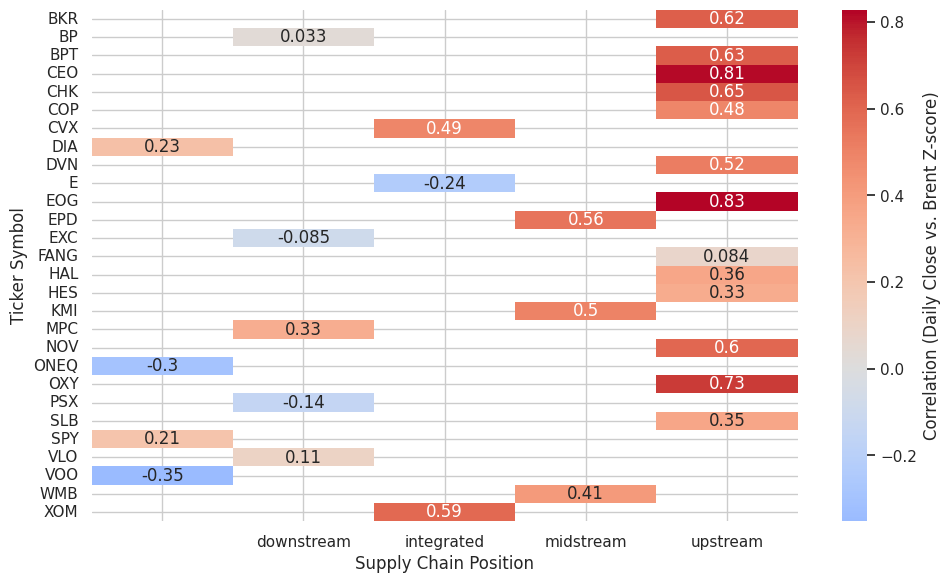

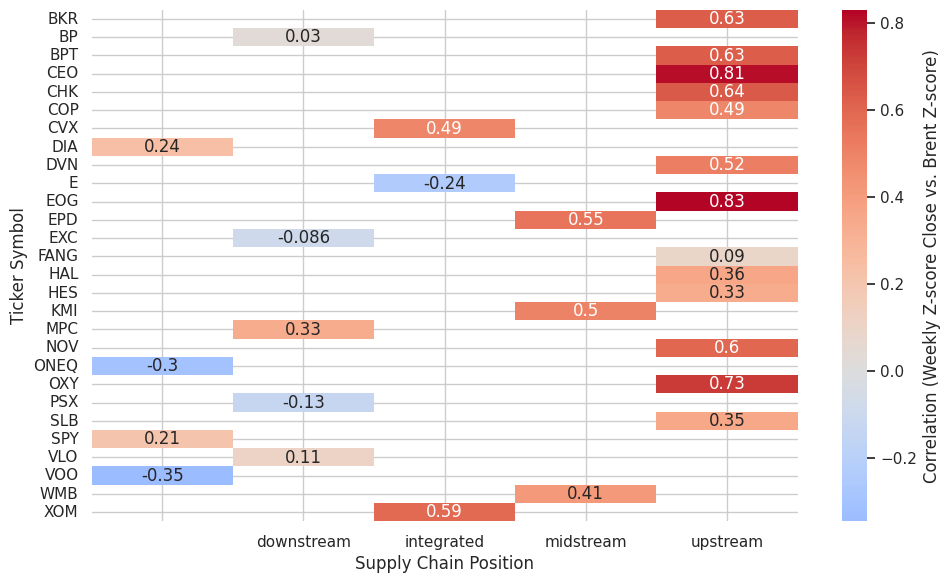

In [177]:
# Prepare daily heatmap
daily_df = correlation_combined[['Ticker_Symbol', 'Daily_Corr_Close_vs_Brent_Zscore', 'Supply_Chain_Position']]

plt.figure(figsize=(10, 6))
sns.heatmap(
    daily_df.pivot(index='Ticker_Symbol', columns='Supply_Chain_Position', values='Daily_Corr_Close_vs_Brent_Zscore'),
    annot=True, cmap='coolwarm', center=0,
    cbar_kws={'label': 'Correlation (Daily Close vs. Brent Z-score)'}
)
# plt.title('Daily Correlation: Normalized Stock Price vs. Brent Crude Oil Z-score')
plt.xlabel('Supply Chain Position')
plt.ylabel('Ticker Symbol')
plt.tight_layout()
plt.show()

# Prepare weekly heatmap
weekly_df = correlation_combined[['Ticker_Symbol', 'Weekly_Corr_Zscore_vs_Brent_Zscore', 'Supply_Chain_Position']]

plt.figure(figsize=(10, 6))
sns.heatmap(
    weekly_df.pivot(index='Ticker_Symbol', columns='Supply_Chain_Position', values='Weekly_Corr_Zscore_vs_Brent_Zscore'),
    annot=True, cmap='coolwarm', center=0,
    cbar_kws={'label': 'Correlation (Weekly Z-score Close vs. Brent Z-score)'}
)
# plt.title('Weekly Correlation: Normalized Stock Price vs. Brent Crude Oil Z-score')
plt.xlabel('Supply Chain Position')
plt.ylabel('Ticker Symbol')
plt.tight_layout()
plt.show()

In [297]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Assume your merged dataframe contains 'Date', 'Ticker_Symbol', 'Daily_Log_Return', 'Brent_Log_Return'
# Filter for one stock as an example
ticker = 'EOG'
df = merged_brent_clean[merged_brent_clean['Ticker_Symbol'] == ticker][['Date', 'Daily_Log_Return', 'Brent_Log_Return']].dropna()

# Align and prepare the time series
df = df.sort_values('Date')
data = df[['Daily_Log_Return', 'Brent_Log_Return']]

max_lag = 5  # number of lags to test
grangercausalitytests(data, maxlag=max_lag, verbose=True)

results = []

for ticker in merged_brent_clean['Ticker_Symbol'].unique():
    df_ticker = merged_brent_clean[merged_brent_clean['Ticker_Symbol'] == ticker][['Daily_Log_Return', 'Brent_Log_Return']].dropna()
    if len(df_ticker) > 50:  # skip if too few observations
        try:
            test_result = grangercausalitytests(df_ticker, maxlag=3, verbose=False)
            for lag in range(1, 4):
                ftest_pval = test_result[lag][0]['ssr_ftest'][1]
                results.append({
                    'Ticker': ticker,
                    'Lag': lag,
                    'p-value': ftest_pval,
                    'Granger_Caused': ftest_pval < 0.05
                })
        except:
            continue

granger_df = pd.DataFrame(results)
display(granger_df)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results




Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1018  , p=0.1472  , df_denom=6085, df_num=1
ssr based chi2 test:   chi2=2.1028  , p=0.1470  , df=1
likelihood ratio test: chi2=2.1025  , p=0.1471  , df=1
parameter F test:         F=2.1018  , p=0.1472  , df_denom=6085, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0376  , p=0.3544  , df_denom=6082, df_num=2
ssr based chi2 test:   chi2=2.0769  , p=0.3540  , df=2
likelihood ratio test: chi2=2.0765  , p=0.3541  , df=2
parameter F test:         F=1.0376  , p=0.3544  , df_denom=6082, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7286  , p=0.5348  , df_denom=6079, df_num=3
ssr based chi2 test:   chi2=2.1883  , p=0.5343  , df=3
likelihood ratio test: chi2=2.1879  , p=0.5343  , df=3
parameter F test:         F=0.7286  , p=0.5348  , df_denom=6079, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8283  , p=0.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1

Ticker  Lag   p-value  Granger_Caused
0     BKR    1  0.832764           False
1     BKR    2  0.502486           False
2     BKR    3  0.000096            True
3      BP    1  0.126019           False
4      BP    2  0.320402           False
..    ...  ...       ...             ...
79    WMB    2  0.034613            True
80    WMB    3  0.097755           False
81    XOM    1  0.787835           False
82    XOM    2  0.984721           False
83    XOM    3  0.632304           False

[84 rows x 4 columns]

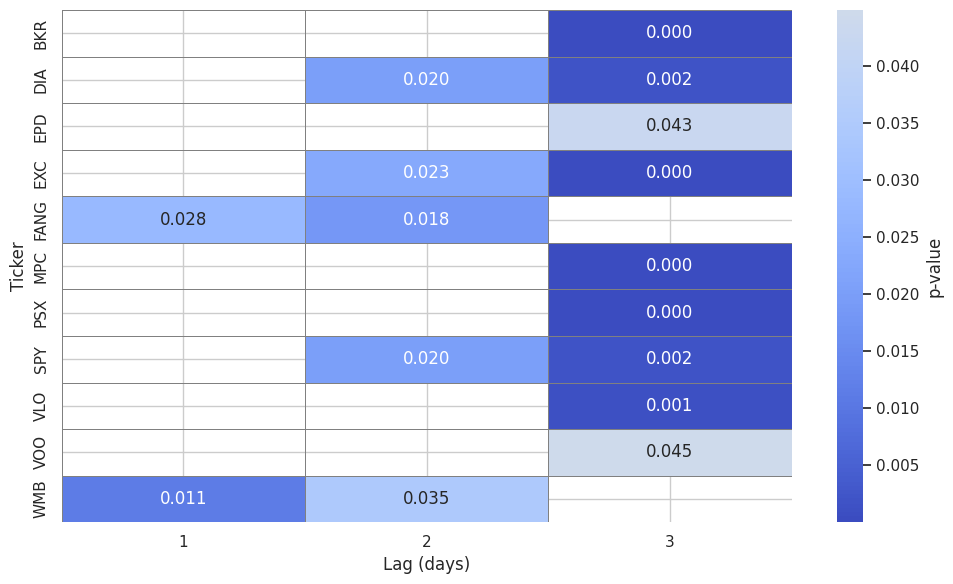

In [302]:
# Filter for significant results
significant = granger_df[granger_df["Granger_Caused"] == True]

# Pivot the data for heatmap (Ticker vs Lag)
heatmap_data = significant.pivot(index="Ticker", columns="Lag", values="p-value")

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap='coolwarm',
    center=0.05,
    cbar_kws={'label': 'p-value'},
    linewidths=0.5,
    linecolor='gray',
    fmt=".3f"
)
# plt.title("Significant Granger Causality: Brent → Stock Returns")
plt.xlabel("Lag (days)")
plt.ylabel("Ticker")
plt.tight_layout()
plt.show()

# Return summary table
significant_sorted = significant.sort_values(by=["p-value"])

In [178]:
# prompt: DataFrame correlation_df: heatmap

import altair as alt

# Melt the dataframe to long format for plotting
melted_df = correlation_df.melt('Ticker_Symbol', var_name='CorrelationType', value_name='Correlation')

# Create the heatmap
chart = alt.Chart(melted_df).mark_rect().encode(
    # Map 'Ticker_Symbol' to the x-axis
    x=alt.X('Ticker_Symbol:O', axis=None),
    # Map 'CorrelationType' to the y-axis
    y=alt.Y('CorrelationType:O', title='Correlation Type'),
    # Map 'Correlation' to color intensity
    color=alt.Color('Correlation:Q', title='Correlation'),
    # Add tooltips to show details on hover
    tooltip=['Ticker_Symbol', 'CorrelationType', 'Correlation']
).properties(
    # Set the title of the chart
    title='Correlation Heatmap'
)

# Display the chart
chart

alt.Chart(...)

In [292]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

features = [
    # 'Corr_Log_Return', 'Corr_Open_Close_Gap', 'Corr_Volatility', 'Corr_Variance',
    'Corr_Log_Return_vs_Brent', 'Corr_Rolling_Vol_vs_Brent',
    # 'Corr_Normalized_Log_Return_vs_Brent',
    'Weekly_Corr_Log_Return_Z',
    # 'Weekly_Corr_Rolling_Volatility_Z',
    # 'Corr_Log_vs_Gasoline_Interpolated', 'Corr_Vol_vs_Gasoline_Interpolated',
    # 'Corr_R_Vol_vs_Gasoline_Interpolated',
    # 'Corr_Normalized_Log_vs_Gasoline',
    # 'Daily_Corr_Close_vs_Brent_Zscore',
    'Weekly_Corr_Zscore_vs_Brent_Zscore'
]


merged_df = weekly_correlation_results.merge(brent_corr_df, on=['Ticker_Symbol', 'Supply_Chain_Position'], how='outer')
merged_df = merged_df.merge(brent_weekly_corr_df, on=['Ticker_Symbol', 'Supply_Chain_Position'], how='outer')
merged_df = merged_df.merge(correlation_results, on=['Ticker_Symbol', 'Supply_Chain_Position'], how='outer')
merged_df = merged_df.merge(correlation_combined, on=['Ticker_Symbol', 'Supply_Chain_Position'], how='outer')

# Assume the dataframes are all already loaded
full_corr_df = weekly_correlation_results\
    .merge(brent_corr_df.drop(columns='Supply_Chain_Position'), on='Ticker_Symbol', how='outer')\
    .merge(brent_weekly_corr_df.drop(columns='Supply_Chain_Position'), on='Ticker_Symbol', how='outer')\
    .merge(correlation_results.drop(columns='Supply_Chain_Position'), on='Ticker_Symbol', how='outer')\
    .merge(correlation_combined.drop(columns='Supply_Chain_Position'), on='Ticker_Symbol', how='outer')

display(full_corr_df.head())

df_cluster = full_corr_df[['Ticker_Symbol'] + features].dropna()
X = df_cluster[features].values

Ticker_Symbol  Corr_Log_Return  Corr_Open_Close_Gap  Corr_Volatility  \
0           BKR        -0.002377            -0.002379        -0.000769   
1            BP         0.000981             0.001603        -0.002586   
2           BPT         0.002926             0.004233        -0.002045   
3           CEO         0.002065             0.001533        -0.001282   
4           CHK         0.004112             0.002045        -0.001289   

   Corr_Variance Supply_Chain_Position  Corr_Log_Return_vs_Brent  \
0       0.001492              upstream                  0.378265   
1      -0.000450            downstream                  0.352327   
2      -0.002541              upstream                  0.295259   
3      -0.001003              upstream                  0.285324   
4       0.000436              upstream                  0.345289   

   Corr_Rolling_Vol_vs_Brent  Corr_Normalized_Log_Return_vs_Brent  \
0                   0.405047                             0.378265   
1                   0.393138                             0.352327   
2                   0.283099                             0.295259   
3                   0.232825                             0.285324   
4                   0.215476                             0.345289   

   Weekly_Corr_Log_Return_Z  Weekly_Corr_Rolling_Volatility_Z  \
0                  0.444579                          0.434655   
1                  0.401612                          0.416942   
2                  0.384986                          0.305601   
3                  0.425021                          0.231212   
4                  0.469355                          0.530646   

   Zscore_Correlation  Daily_Corr_Close_vs_Brent_Zscore  \
0           -0.406399                          0.622387   
1            0.034949                          0.033366   
2           -0.111800                          0.633818   
3            0.564661                          0.814832   
4           -0.195863                          0.646679   

   Weekly_Corr_Zscore_vs_Brent_Zscore  
0                            0.629626  
1                            0.030364  
2                            0.630662  
3                            0.812368  
4                            0.640433

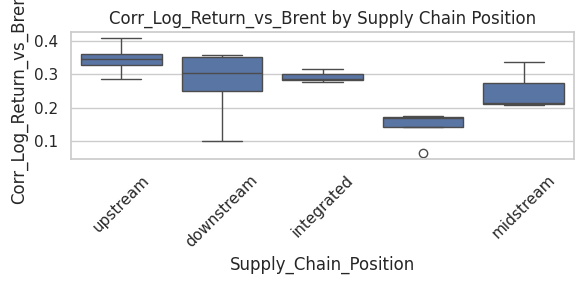

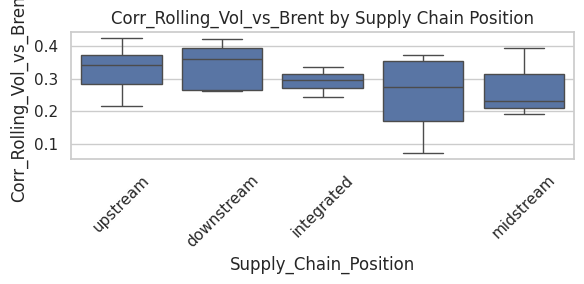

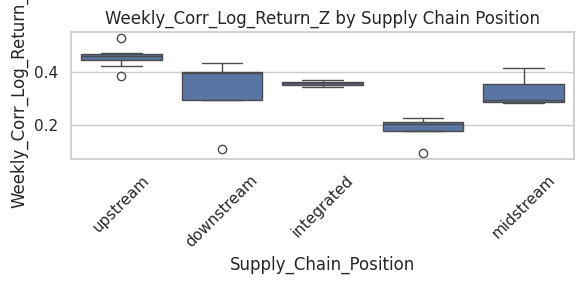

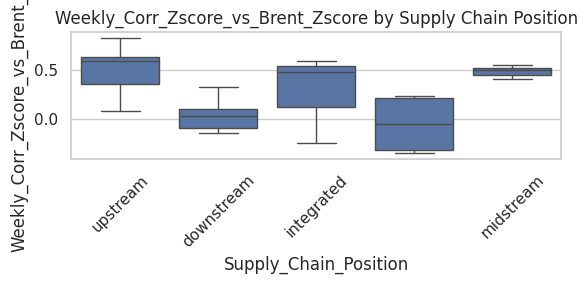

In [293]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in features:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=full_corr_df, x='Supply_Chain_Position', y=col)
    plt.title(f'{col} by Supply Chain Position')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

PCA | k=2, silhouette score=0.505
PCA | k=3, silhouette score=0.402
PCA | k=4, silhouette score=0.360
PCA | k=5, silhouette score=0.329
PCA | k=6, silhouette score=0.291


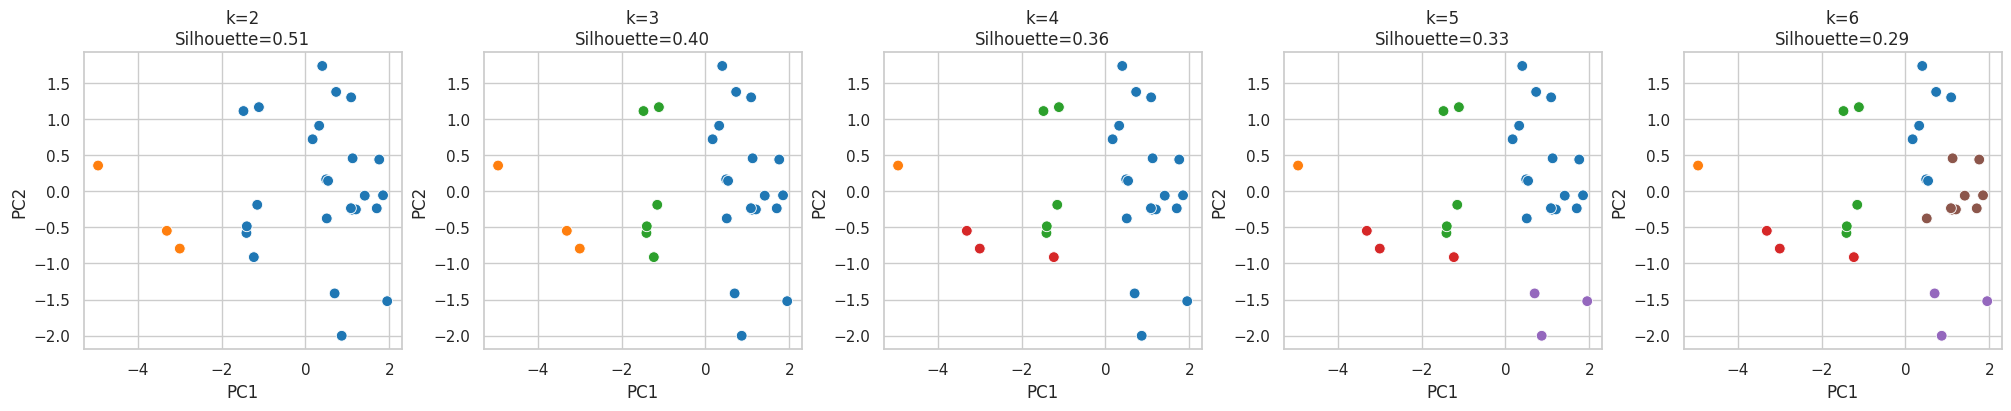

Explained variance ratio (PCA): [0.70428971 0.19862995]


In [294]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    print(f"PCA | k={k}, silhouette score={score:.3f}")

df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_cluster['PC1'] = X_pca[:, 0]
df_cluster['PC2'] = X_pca[:, 1]

k_values = [2, 3, 4, 5, 6]
fig, axes = plt.subplots(1, len(k_values), figsize=(20, 4), constrained_layout=True)

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=0)
    df_cluster[f'Cluster_k{k}'] = kmeans.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, kmeans.labels_)

    sns.scatterplot(
        data=df_cluster,
        x='PC1', y='PC2',
        hue=f'Cluster_k{k}',
        palette='tab10',
        s=60,
        ax=axes[i],
        legend=False
    )
    axes[i].set_title(f'k={k}\nSilhouette={sil_score:.2f}')
    axes[i].set_xlabel('PC1')
    axes[i].set_ylabel('PC2')

# plt.suptitle('PCA Visualization of Clusters by k', fontsize=16)
plt.show()

print("Explained variance ratio (PCA):", pca.explained_variance_ratio_)

In [295]:
k_values = [2, 3, 4, 5, 6]

for k in k_values:
    cluster_col = f'Cluster_k{k}'
    if cluster_col not in df_cluster.columns:
        continue

    print(f"\n==== Grouping for k = {k} ====")
    cluster_groups = (
        df_cluster[['Ticker_Symbol', cluster_col]]
        .sort_values(cluster_col)
        .groupby(cluster_col)['Ticker_Symbol']
        .apply(list)
        .reset_index()
        .rename(columns={cluster_col: 'Cluster'})
    )
    display(cluster_groups)



==== Grouping for k = 2 ====


Cluster                                      Ticker_Symbol
0        0  [BKR, BP, BPT, CEO, CHK, COP, CVX, DIA, DVN, E...
1        1                                   [EXC, ONEQ, VOO]


==== Grouping for k = 3 ====


Cluster                                      Ticker_Symbol
0        0  [BKR, BP, BPT, CEO, CHK, COP, CVX, DVN, HES, E...
1        1                                   [EXC, VOO, ONEQ]
2        2                       [DIA, EPD, E, SPY, VLO, WMB]


==== Grouping for k = 4 ====


Cluster                                      Ticker_Symbol
0        0  [BKR, BP, BPT, CEO, CHK, COP, CVX, DVN, HES, E...
1        1                                             [ONEQ]
2        2                          [SPY, VLO, EPD, DIA, WMB]
3        3                                      [E, EXC, VOO]


==== Grouping for k = 5 ====


Cluster                                      Ticker_Symbol
0        0  [BKR, BPT, CEO, CHK, CVX, COP, EOG, DVN, HAL, ...
1        1                                             [ONEQ]
2        2                          [VLO, WMB, SPY, DIA, EPD]
3        3                                      [E, EXC, VOO]
4        4                                    [BP, FANG, PSX]


==== Grouping for k = 6 ====


Cluster                                  Ticker_Symbol
0        0            [CEO, BPT, CVX, CHK, HES, EOG, XOM]
1        1                                         [ONEQ]
2        2                      [SPY, VLO, DIA, WMB, EPD]
3        3                                  [EXC, VOO, E]
4        4                                [FANG, BP, PSX]
5        5  [COP, HAL, DVN, BKR, KMI, SLB, OXY, MPC, NOV]

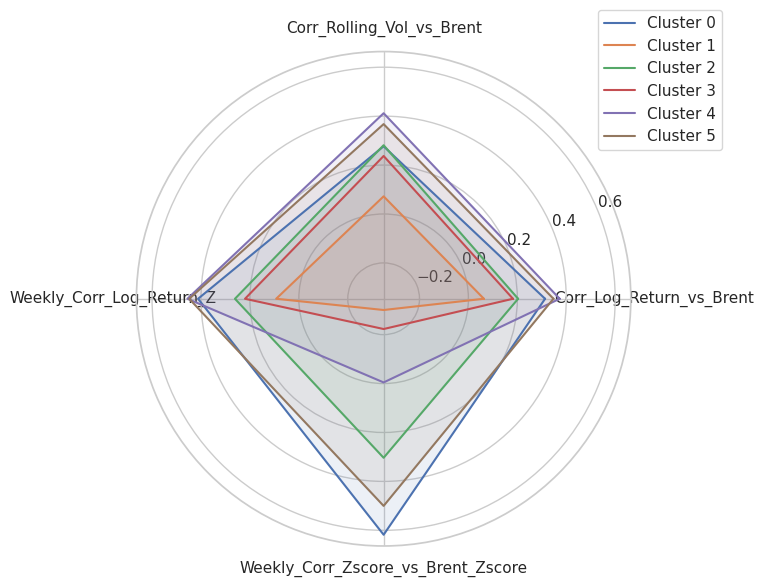

In [296]:
cluster_means = df_cluster.groupby('Cluster')[features].mean()

# Radar chart setup
num_vars = len(features)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Repeat the first angle to close the loop

# Initialize the radar chart
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

for cluster in cluster_means.index:
    values = cluster_means.loc[cluster].tolist()
    values += values[:1]  # Repeat the first value to close the loop
    ax.plot(angles, values, label=f'Cluster {cluster}')
    ax.fill(angles, values, alpha=0.1)

# Set the labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(features)

# Add title and legend
# ax.set_title('Average Correlation Feature Profile per Cluster')
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

plt.tight_layout()
plt.show()

t-SNE | k=2, silhouette score=0.505
t-SNE | k=3, silhouette score=0.402
t-SNE | k=4, silhouette score=0.360
t-SNE | k=5, silhouette score=0.329
t-SNE | k=6, silhouette score=0.291


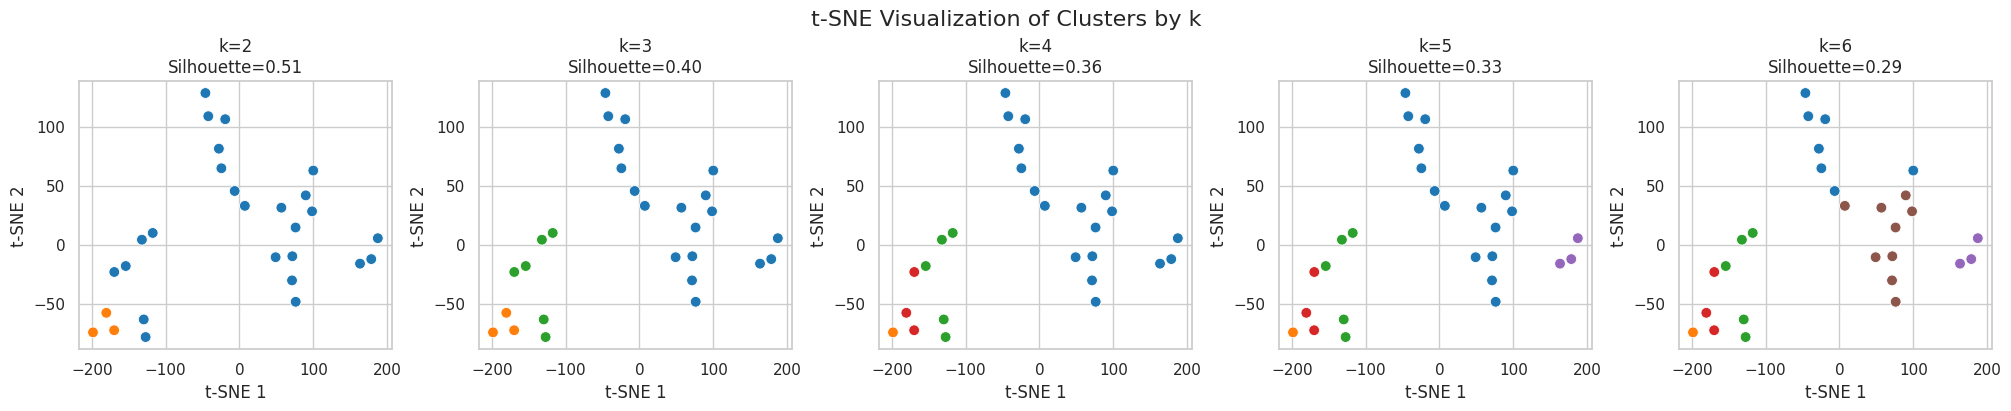

In [280]:
from sklearn.manifold import TSNE

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    print(f"t-SNE | k={k}, silhouette score={score:.3f}")

df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

tsne = TSNE(n_components=2, perplexity=4, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
df_cluster['TSNE1'] = X_tsne[:, 0]
df_cluster['TSNE2'] = X_tsne[:, 1]

k_values = [2, 3, 4, 5, 6]
fig, axes = plt.subplots(1, len(k_values), figsize=(20, 4), constrained_layout=True)

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, labels)
    df_cluster[f'Cluster_k{k}'] = labels

    sns.scatterplot(
        data=df_cluster,
        x='TSNE1', y='TSNE2',
        hue=f'Cluster_k{k}',
        palette='tab10',
        s=60,
        ax=axes[i],
        legend=False
    )
    axes[i].set_title(f'k={k}\nSilhouette={sil_score:.2f}')
    axes[i].set_xlabel('t-SNE 1')
    axes[i].set_ylabel('t-SNE 2')

plt.suptitle('t-SNE Visualization of Clusters by k', fontsize=16)
plt.show()

In [283]:
k_values = [2, 3, 4, 5, 6]

for k in k_values:
    cluster_col = f'Cluster_k{k}'
    if cluster_col not in df_cluster.columns:
        continue

    print(f"\n==== Grouping for k = {k} ====")
    cluster_groups = (
        df_cluster[['Ticker_Symbol', cluster_col]]
        .sort_values(cluster_col)
        .groupby(cluster_col)['Ticker_Symbol']
        .apply(list)
        .reset_index()
        .rename(columns={cluster_col: 'Cluster'})
    )
    display(cluster_groups)


==== Grouping for k = 2 ====


Cluster                                      Ticker_Symbol
0        0  [BKR, BP, BPT, CEO, CHK, COP, CVX, DIA, DVN, E...
1        1                                   [EXC, ONEQ, VOO]


==== Grouping for k = 3 ====


Cluster                                      Ticker_Symbol
0        0  [BKR, BP, BPT, CEO, CHK, COP, CVX, DVN, HES, E...
1        1                                   [EXC, VOO, ONEQ]
2        2                       [DIA, EPD, E, SPY, VLO, WMB]


==== Grouping for k = 4 ====


Cluster                                      Ticker_Symbol
0        0  [BKR, BP, BPT, CEO, CHK, COP, CVX, DVN, HES, E...
1        1                                             [ONEQ]
2        2                          [SPY, VLO, EPD, DIA, WMB]
3        3                                      [E, EXC, VOO]


==== Grouping for k = 5 ====


Cluster                                      Ticker_Symbol
0        0  [BKR, BPT, CEO, CHK, CVX, COP, EOG, DVN, HAL, ...
1        1                                             [ONEQ]
2        2                          [VLO, WMB, SPY, DIA, EPD]
3        3                                      [E, EXC, VOO]
4        4                                    [BP, FANG, PSX]


==== Grouping for k = 6 ====


Cluster                                  Ticker_Symbol
0        0            [CEO, BPT, CVX, CHK, HES, EOG, XOM]
1        1                                         [ONEQ]
2        2                      [SPY, VLO, DIA, WMB, EPD]
3        3                                  [EXC, VOO, E]
4        4                                [FANG, BP, PSX]
5        5  [COP, HAL, DVN, BKR, KMI, SLB, OXY, MPC, NOV]

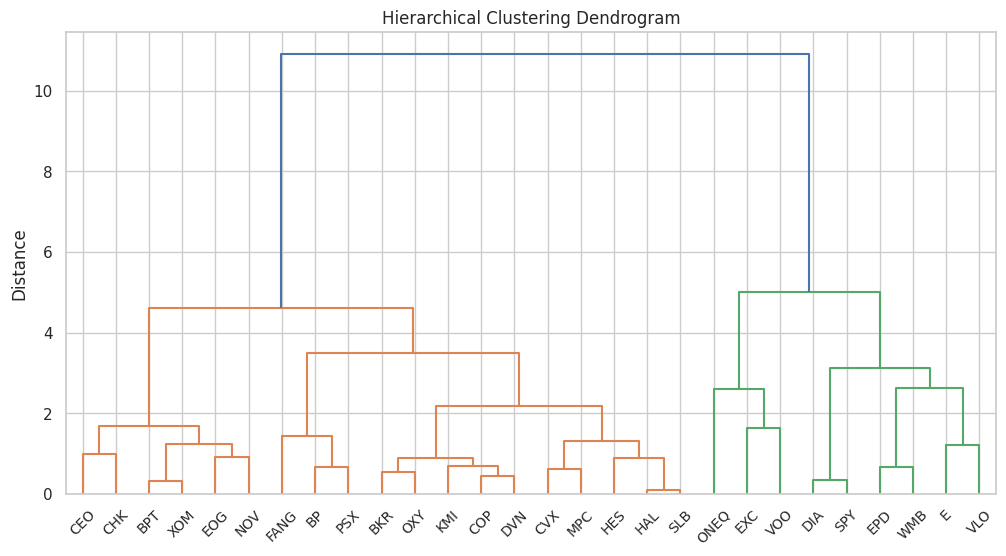

In [282]:
from scipy.cluster.hierarchy import linkage, dendrogram

linkage_matrix = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=full_corr_df['Ticker_Symbol'].values)
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Distance')
plt.show()

### Add makeup_percentage as weight

In [287]:
gasoline_weights = pd.read_csv('/content/drive/MyDrive/2025-citadal-datathon/datathon_data/monthly_gasoline_makeup_percentages.csv', parse_dates=['Date'])

gasoline_weights = gasoline_weights[['Date', 'Crude_Oil', 'Refining', 'Distribution_and_Marketing', 'Taxes']].sort_values('Date')

# Drop duplicate date entries before setting the index and resampling
gasoline_weights = gasoline_weights.drop_duplicates(subset=['Date'])

# Interpolation
gasoline_weights_daily = gasoline_weights.set_index('Date').resample('D').interpolate(method='linear')

gasoline_weights_daily.head(10)

Crude_Oil   Refining  Distribution_and_Marketing      Taxes
Date                                                                   
2000-01-01  47.100000   7.800000                   13.000000  32.100000
2000-01-02  47.019355   8.125806                   12.822581  32.035484
2000-01-03  46.938710   8.451613                   12.645161  31.970968
2000-01-04  46.858065   8.777419                   12.467742  31.906452
2000-01-05  46.777419   9.103226                   12.290323  31.841935
2000-01-06  46.696774   9.429032                   12.112903  31.777419
2000-01-07  46.616129   9.754839                   11.935484  31.712903
2000-01-08  46.535484  10.080645                   11.758065  31.648387
2000-01-09  46.454839  10.406452                   11.580645  31.583871
2000-01-10  46.374194  10.732258                   11.403226  31.519355

In [289]:
corr_df = full_corr_df.copy()

# 建立新的加權特徵
# 假設權重範圍為 0-100，將其正規化為 0-1 使用
latest_weights = gasoline_weights.iloc[-1]
crude_weight = latest_weights['Crude_Oil'] / 100
refining_weight = latest_weights['Refining'] / 100
dist_weight = latest_weights['Distribution_and_Marketing'] / 100
tax_weight = latest_weights['Taxes'] / 100
non_crude_weight = refining_weight + dist_weight + tax_weight

corr_df["Weighted_Corr_Log_Return_vs_Brent"] = corr_df["Corr_Log_Return_vs_Brent"] * crude_weight
corr_df["Weighted_Corr_Rolling_Vol_vs_Brent"] = corr_df["Corr_Rolling_Vol_vs_Brent"] * crude_weight
corr_df["Weighted_Weekly_Corr_Log_Return_Z"] = corr_df["Weekly_Corr_Log_Return_Z"] * (crude_weight + refining_weight)
corr_df["Weighted_Weekly_Corr_Zscore_vs_Brent_Zscore"] = corr_df["Weekly_Corr_Zscore_vs_Brent_Zscore"] * (crude_weight + non_crude_weight)

# 整理輸出以供檢查
weighted_features = corr_df[[
    "Ticker_Symbol",
    "Weighted_Corr_Log_Return_vs_Brent",
    "Weighted_Corr_Rolling_Vol_vs_Brent",
    "Weighted_Weekly_Corr_Log_Return_Z",
    "Weighted_Weekly_Corr_Zscore_vs_Brent_Zscore"
]]

# 用最新一筆 daily gasoline 組成當作加權基礎
latest_weights = gasoline_weights.iloc[-1]
crude_weight = latest_weights['Crude_Oil'] / 100
refining_weight = latest_weights['Refining'] / 100
dist_weight = latest_weights['Distribution_and_Marketing'] / 100
tax_weight = latest_weights['Taxes'] / 100
non_crude_weight = refining_weight + dist_weight + tax_weight

full_corr_df["Weighted_Corr_Log_Return_vs_Brent"] = full_corr_df["Corr_Log_Return_vs_Brent"] * crude_weight
full_corr_df["Weighted_Corr_Rolling_Vol_vs_Brent"] = full_corr_df["Corr_Rolling_Vol_vs_Brent"] * crude_weight
full_corr_df["Weighted_Weekly_Corr_Log_Return_Z"] = full_corr_df["Weekly_Corr_Log_Return_Z"] * (crude_weight + refining_weight)
full_corr_df["Weighted_Weekly_Corr_Zscore_vs_Brent_Zscore"] = full_corr_df["Weekly_Corr_Zscore_vs_Brent_Zscore"] * (crude_weight + non_crude_weight)

features = [
    'Weighted_Corr_Log_Return_vs_Brent',
    'Weighted_Corr_Rolling_Vol_vs_Brent',
    'Weighted_Weekly_Corr_Log_Return_Z',
    'Weighted_Weekly_Corr_Zscore_vs_Brent_Zscore'
]

(   Ticker_Symbol  Cluster
 0            BKR        0
 1             BP        0
 2            BPT        0
 3            CEO        0
 4            CHK        0
 5            COP        0
 6            CVX        0
 7            DIA        1
 8            DVN        0
 9              E        1
 10           EOG        0
 11           EPD        1
 12           EXC        1
 13          FANG        0
 14           HAL        0
 15           HES        0
 16           KMI        0
 17           MPC        0
 18           NOV        0
 19          ONEQ        1
 20           OXY        0
 21           PSX        0
 22           SLB        0
 23           SPY        1
 24           VLO        1
 25           VOO        1
 26           WMB        1
 27           XOM        0,
 np.float64(0.4704122881512694))

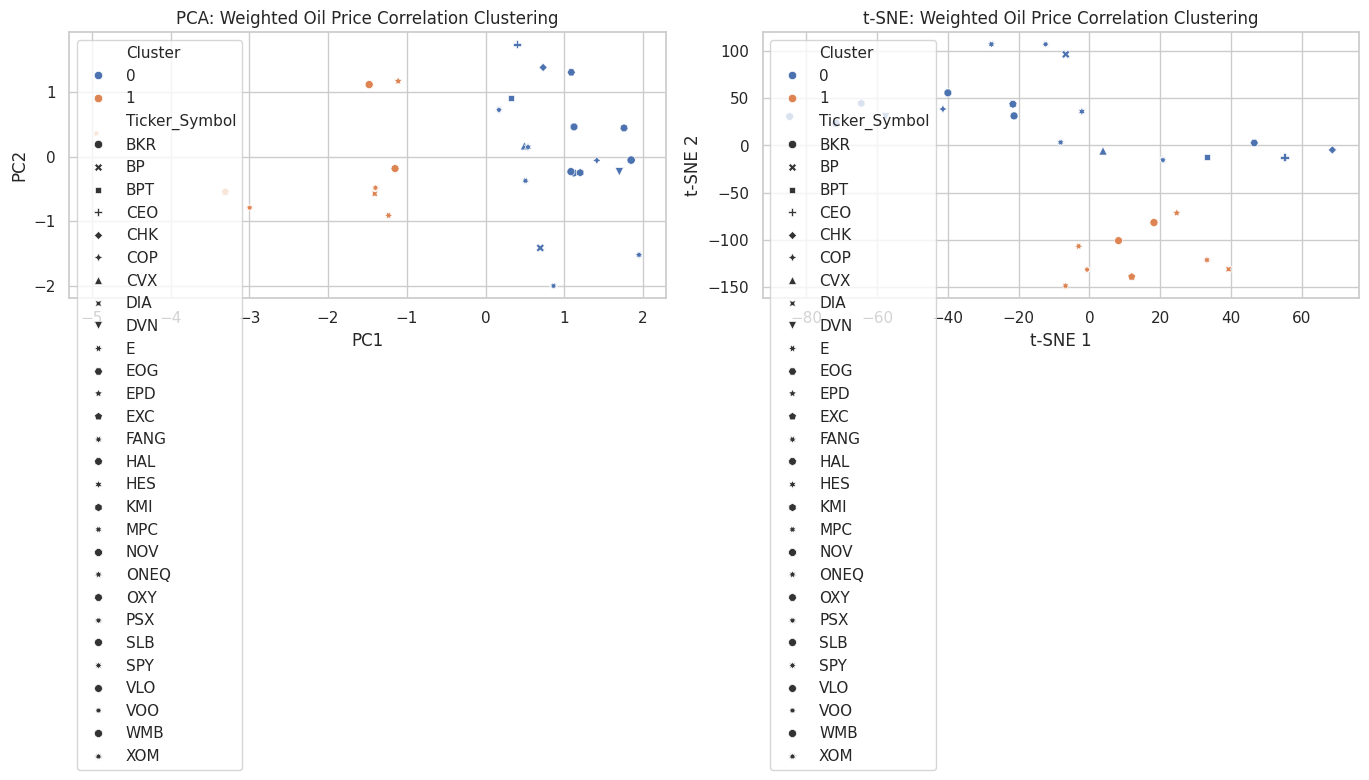

In [291]:
df_cluster = full_corr_df[['Ticker_Symbol'] + features].dropna()
X = df_cluster[features].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run KMeans clustering and store labels
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_scaled)
df_cluster['Cluster'] = kmeans.labels_

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_cluster['PC1'] = X_pca[:, 0]
df_cluster['PC2'] = X_pca[:, 1]

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
df_cluster['TSNE1'] = X_tsne[:, 0]
df_cluster['TSNE2'] = X_tsne[:, 1]

# Plot PCA and t-SNE
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.scatterplot(data=df_cluster, x='PC1', y='PC2', hue='Cluster', style='Ticker_Symbol', ax=axes[0])
axes[0].set_title("PCA: Weighted Oil Price Correlation Clustering")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

sns.scatterplot(data=df_cluster, x='TSNE1', y='TSNE2', hue='Cluster', style='Ticker_Symbol', ax=axes[1])
axes[1].set_title("t-SNE: Weighted Oil Price Correlation Clustering")
axes[1].set_xlabel("t-SNE 1")
axes[1].set_ylabel("t-SNE 2")

plt.tight_layout()

# Return silhouette score for reference
silhouette = silhouette_score(X_scaled, df_cluster['Cluster'])
df_cluster[['Ticker_Symbol', 'Cluster']], silhouette

In [ ]:
# prompt: use Corr_Close_vs_Brent to draw heatmap grouped by Supply_Chain_Position

# Add supply chain position
correlation_df['Supply_Chain_Position'] = correlation_df['Ticker_Symbol'].map(supply_chain_map)

heatmap_brent_data = correlation_df.pivot_table(
    index='Ticker_Symbol',
    columns='Supply_Chain_Position',
    values='Corr_Close_vs_Brent',
    aggfunc='first'
)

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_brent_data,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Correlation (Close Price vs. Brent Price)'}
)
plt.title('Correlation between Stock Close Price and Brent Crude Oil Price by Supply Chain Position')
plt.xlabel('Supply Chain Position')
plt.ylabel('Ticker Symbol')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

commodities = pd.read_csv('/content/drive/MyDrive/2025-citadal-datathon/datathon_data/all_commodities.csv', parse_dates=['Date_Time'])
commodities = commodities[commodities['Commodity_Simple'] == 'BRENT'].copy()
commodities.rename(columns={'Date_Time': 'Date', 'Value': 'Brent_Price'}, inplace=True)
commodities.sort_values('Date', inplace=True)
commodities['Brent_Log_Return'] = np.log(commodities['Brent_Price'] / commodities['Brent_Price'].shift(1))

merged = pd.merge(stocks, commodities[['Date', 'Brent_Log_Return']], on='Date', how='inner')

# lagged Brent returns
max_lag = 14
for lag in range(1, max_lag + 1):
    merged[f'Brent_Log_Return_Lag_{lag}'] = merged.groupby('Ticker_Symbol')['Brent_Log_Return'].shift(lag)

# lagged correlation
lag_corr_results = []
for ticker, group in merged.groupby('Ticker_Symbol'):
    for lag in range(1, max_lag + 1):
        lagged_corr = group['Daily_Log_Return'].corr(group[f'Brent_Log_Return_Lag_{lag}'])
        lag_corr_results.append({
            'Ticker_Symbol': ticker,
            'Lag': lag,
            'Lagged_Corr_Brent_Log_Return': lagged_corr
        })

lag_corr_df = pd.DataFrame(lag_corr_results)

plt.figure(figsize=(12, 6))
sns.boxplot(data=lag_corr_df, x='Lag', y='Lagged_Corr_Brent_Log_Return')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Lagged Correlation between Brent Log Return and Stock Log Return')
plt.ylabel('Correlation')
plt.xlabel('Lag (days)')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests

# Brent weekly
brent_weekly = commodities[['Date', 'Brent_Price']].copy()
brent_weekly = brent_weekly.set_index('Date').resample('W-MON').last().dropna()
brent_weekly['Brent_Log_Return'] = np.log(brent_weekly['Brent_Price'] / brent_weekly['Brent_Price'].shift(1))

# Stock weekly
stock_weekly = stocks[stocks['Ticker_Symbol'] == 'EOG'].copy()
stock_weekly = stock_weekly.set_index('Date').resample('W-MON').last().dropna()
stock_weekly['Stock_Log_Return'] = np.log(stock_weekly['Close'] / stock_weekly['Close'].shift(1))

# Merge
merged = pd.merge(
    stock_weekly[['Stock_Log_Return']],
    brent_weekly[['Brent_Log_Return']],
    left_index=True, right_index=True
).dropna()

# Granger Causality Test: Brent_Log_Return → Stock_Log_Return
max_lag = 4
test_result = grangercausalitytests(merged[['Stock_Log_Return', 'Brent_Log_Return']], maxlag=max_lag, verbose=True)

In [ ]:
# 1. Stocks data preparation
# Rename and sort
stocks.rename(columns={'Date-Time': 'Date'}, inplace=True)
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.sort_values(['Ticker_Symbol', 'Date'], inplace=True)

# Fill missing values by interpolating within each stock
stocks[['Close', 'High', 'Low']] = stocks.groupby('Ticker_Symbol')[['Close', 'High', 'Low']].transform(
    lambda x: x.interpolate(method='linear', limit_direction='both')
)

# I. Calculate daily log returns
stocks['Daily_Log_Return'] = stocks.groupby('Ticker_Symbol')['Close'].transform(
    lambda x: np.log(x / x.shift(1))
)

# II. Calculate daily change percentage
stocks['Daily_Pct_Return'] = stocks.groupby('Ticker_Symbol')['Close'].transform(
    lambda x: (x - x.shift(1)) / x.shift(1)
)

# III. Calculate daily high-low volatility
stocks['Daily_High_Low'] = stocks['High'] - stocks['Low']

# IV. Rolling window volatility (e.g., n=5)
window_size = 5
stocks['Rolling_Log_Return_Volatility'] = stocks.groupby('Ticker_Symbol')['Daily_Log_Return'].transform(
    lambda r: r.rolling(window=window_size).std()
)

display(stocks.head())
display(stocks.tail())

In [ ]:
# 2. Weekly metrics calculation per ticker
weekly_metrics_list = []
for ticker, group in stocks.groupby('Ticker_Symbol'):
    group = group.set_index('Date')

    # 1. Weekly average of daily log returns
    weekly_avg_return = group['Daily_Log_Return'].resample('W-FRI').mean()

    # 2. Weekly average of daily percentage returns
    weekly_pct_return = group['Daily_Pct_Return'].resample('W-FRI').mean()

    # 3. Weekly average of daily volatility
    weekly_avg_volatility = group['Daily_High_Low'].resample('W-FRI').mean()

    # Combine into one DataFrame
    weekly_df = pd.DataFrame({
        'Weekly_Avg_Daily_Log_Return': weekly_avg_return,
        'Weekly_Avg_Pct_Return': weekly_pct_return,
        'Weekly_Avg_Volatility': weekly_avg_volatility
    }).reset_index()

    # Add ticker symbol
    weekly_df['Ticker_Symbol'] = ticker

    # Append to list
    weekly_metrics_list.append(weekly_df)

# Combine all stocks into a single DataFrame
weekly_stock_metrics = pd.concat(weekly_metrics_list, ignore_index=True)

display(weekly_stock_metrics.head())
display(weekly_stock_metrics.tail())

In [ ]:
# 3. Gasoline prices preparation (Weekly on Monday shifted to Friday)
gas_prices['Date'] = pd.to_datetime(gas_prices['Date']) + pd.Timedelta(days=4)
gas_prices.sort_values('Date', inplace=True)
# Filter only 'US'
gas_us = gas_prices[gas_prices['Geography'] == 'US'][['Date', 'Price']].copy()
gas_us.rename(columns={'Price': 'US_Gasoline_Price'}, inplace=True)
# Fill missing values by interpolating within the gas price
# gas_us['US_Gasoline_Price'] = gas_us['US_Gasoline_Price'].interpolate(method='linear', limit_direction='both')

display(gas_us.head())
display(gas_us.tail())
print("Before interpolation:", gas_us['US_Gasoline_Price'].isna().sum())
gas_us['US_Gasoline_Price'] = gas_us['US_Gasoline_Price'].interpolate(method='linear', limit_direction='both')
print("After interpolation:", gas_us['US_Gasoline_Price'].isna().sum())

display(gas_prices.head())
display(gas_prices.tail())

In [ ]:
# 4. Merge the dataset

weekly_stock_metrics['Supply_Chain_Position'] = weekly_stock_metrics['Ticker_Symbol'].map(supply_chain_map)
weekly_stock_metrics = weekly_stock_metrics[
    weekly_stock_metrics['Supply_Chain_Position'].isin(['upstream', 'midstream', 'downstream', 'integrated'])
]

display(weekly_stock_metrics.head())
display(weekly_stock_metrics.tail())


merged_data_list = []

for ticker, group in weekly_stock_metrics.groupby('Ticker_Symbol'):
    min_date = group['Date'].min()
    group = group.sort_values('Date')

    gas_sub = gas_us[gas_us['Date'] >= min_date].copy().sort_values('Date')

    print(f"Ticker: {ticker}")
    print("Group date range:", group['Date'].min(), "to", group['Date'].max())
    print("Gas price date range:", gas_sub['Date'].min(), "to", gas_sub['Date'].max())
    print("Overlapping dates:", len(set(group['Date']).intersection(set(gas_sub['Date']))))

    merged = pd.merge_asof(
        group,
        gas_sub,
        on='Date',
        direction='nearest',
        tolerance=pd.Timedelta(days=2)
    )

    print("Merged rows:", len(merged))
    merged_data_list.append(merged)


merged_data = pd.concat(merged_data_list, ignore_index=True)

display(merged_data.head())
display(merged_data.tail())

#### 5.a Calculate the Pearson Correlation

In [ ]:
results = []
for ticker, group in merged_data.groupby('Ticker_Symbol'):
    corr_return = group['Weekly_Avg_Daily_Log_Return'].corr(group['US_Gasoline_Price'])
    corr_pct_return = group['Weekly_Avg_Pct_Return'].corr(group['US_Gasoline_Price'])
    corr_vol = group['Weekly_Avg_Volatility'].corr(group['US_Gasoline_Price'])
    position = group['Supply_Chain_Position'].iloc[0]

    results.append({
        'Ticker_Symbol': ticker,
        'Supply_Chain_Position': position,
        'Corr_Log_Return': corr_return,
        'Corr_Pct_Return': corr_return,
        'Corr_Volatility': corr_vol
    })

correlation_df = pd.DataFrame(results)

display(correlation_df)

In [ ]:
filtered_df = correlation_df[correlation_df['Supply_Chain_Position'].isin(['upstream', 'midstream', 'downstream'])]

# Scatter plot
chart = alt.Chart(filtered_df).mark_circle().encode(
    x='Corr_Log_Return',
    y='Corr_Volatility',
    color='Supply_Chain_Position',
    tooltip=['Ticker_Symbol', 'Supply_Chain_Position', 'Corr_Log_Return', 'Corr_Volatility']
).properties(
    title='Correlation of Log Return and Volatility by Supply Chain Position'
).interactive()

chart

In [ ]:
correlation_targets = [
    ('Corr_Pct_Return', 'Weekly % Return'),
    ('Corr_Log_Return', 'Weekly Log Return'),
    ('Corr_Volatility', 'Weekly Volatility')
]

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for ax, (value_col, title) in zip(axes, correlation_targets):
    correlation_matrix = correlation_df.pivot(
        index='Ticker_Symbol',
        columns='Supply_Chain_Position',
        values=value_col
    )

    sns.heatmap(
        correlation_matrix,
        annot=True,
        fmt=".2f",
        cmap='coolwarm',
        linewidths=0.5,
        cbar_kws={'label': 'Corr'} if title == 'Weekly % Return' else None,
        ax=ax
    )
    ax.set_title(f'Correlation with Gasoline Price\n({title})')
    ax.set_xlabel('Supply Chain Position')
    if ax == axes[0]:
        ax.set_ylabel('Ticker Symbol')
    else:
        ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
correlation_targets = [
    ('Corr_Pct_Return', 'Weekly % Return'),
    ('Corr_Log_Return', 'Weekly Log Return'),
    ('Corr_Volatility', 'Weekly Volatility')
]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, (y_col, label) in zip(axes, correlation_targets):
    sns.boxplot(
        data=correlation_df,
        x='Supply_Chain_Position',
        y=y_col,
        palette='Set2',
        ax=ax
    )
    ax.set_title(f'Correlation with US Gasoline Price\n({label})')
    ax.set_xlabel('Supply Chain Position')
    if ax == axes[0]:
        ax.set_ylabel('Pearson Correlation')
    else:
        ax.set_ylabel('')
    ax.axhline(0, color='gray', linestyle='--')

plt.tight_layout()
plt.show()

📊 **Summary: Correlation Between Gasoline Prices and Stock Metrics**

Our heatmap visualizations depict the Pearson correlation between **weekly US gasoline prices** and three key stock metrics across 28 energy-related companies, grouped by their **supply chain position** (upstream, midstream, downstream, integrated):

1. **Weekly % Return**
2. **Weekly Log Return**
3. **Weekly Volatility**

**🔎 Key Findings**

* **Return-Based Correlations Are Weak Across All Streams:**

  * Both **% returns** and **log returns** show correlations close to **zero** for most companies.
  * This indicates **little to no immediate linear relationship** between weekly changes in gas prices and short-term stock performance.

* **Volatility Has Noticeably Higher Correlations:**

  * Many **upstream companies** (e.g., **EOG**, **OXY**, **DVN**) show **moderate positive correlations (0.3–0.5)** between **gasoline prices and stock volatility**.
  * This suggests gasoline price fluctuations might **increase risk perception or market activity**, especially in exploration and production segments.

* **Integrated and Midstream Stocks Show Mixed Results:**

  * Some integrated players like **XOM** show low but **positive correlations** across all metrics, reflecting **diversified resilience**.
  * Midstream firms (e.g., **KMI**, **WMB**) exhibit mild to neutral relationships.



>❓ for upstream firms, crude oil prices may be more directly linked to performance than gasoline?



#### 5.b Calculate the Spearman Correlation

In [ ]:
results = []
for ticker, group in merged_data.groupby('Ticker_Symbol'):
    corr_return = group['Weekly_Avg_Daily_Log_Return'].corr(group['US_Gasoline_Price'], method='spearman')
    corr_pct_return = group['Weekly_Avg_Pct_Return'].corr(group['US_Gasoline_Price'], method='spearman')
    corr_vol = group['Weekly_Avg_Volatility'].corr(group['US_Gasoline_Price'], method='spearman')
    position = group['Supply_Chain_Position'].iloc[0]

    results.append({
        'Ticker_Symbol': ticker,
        'Supply_Chain_Position': position,
        'Corr_Log_Return': corr_return,
        'Corr_Pct_Return': corr_return,
        'Corr_Volatility': corr_vol
    })

correlation_df = pd.DataFrame(results)
display(correlation_df)

In [ ]:
filtered_df = correlation_df[correlation_df['Supply_Chain_Position'].isin(['upstream', 'midstream', 'downstream'])]

# scatter plot
chart = alt.Chart(filtered_df).mark_circle().encode(
    x='Corr_Log_Return',
    y='Corr_Volatility',
    color='Supply_Chain_Position',
    tooltip=['Ticker_Symbol', 'Supply_Chain_Position', 'Corr_Log_Return', 'Corr_Volatility']
).properties(
    title='Correlation of Log Return and Volatility by Supply Chain Position'
).interactive()

chart

In [ ]:
correlation_targets = [
    ('Corr_Pct_Return', 'Weekly % Return'),
    ('Corr_Log_Return', 'Weekly Log Return'),
    ('Corr_Volatility', 'Weekly Volatility')
]

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for ax, (value_col, title) in zip(axes, correlation_targets):
    correlation_matrix = correlation_df.pivot(
        index='Ticker_Symbol',
        columns='Supply_Chain_Position',
        values=value_col
    )

    sns.heatmap(
        correlation_matrix,
        annot=True,
        fmt=".2f",
        cmap='coolwarm',
        linewidths=0.5,
        cbar_kws={'label': 'Corr'} if title == 'Weekly % Return' else None,
        ax=ax
    )
    ax.set_title(f'Correlation with Gasoline Price\n({title}) (Spearman)')
    ax.set_xlabel('Supply Chain Position')
    if ax == axes[0]:
        ax.set_ylabel('Ticker Symbol')
    else:
        ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
correlation_targets = [
    ('Corr_Pct_Return', 'Weekly % Return'),
    ('Corr_Log_Return', 'Weekly Log Return'),
    ('Corr_Volatility', 'Weekly Volatility')
]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, (y_col, label) in zip(axes, correlation_targets):
    sns.boxplot(
        data=correlation_df,
        x='Supply_Chain_Position',
        y=y_col,
        palette='Set2',
        ax=ax
    )
    ax.set_title(f'Correlation with US Gasoline Price\n({label}) (Spearman)')
    ax.set_xlabel('Supply Chain Position')
    if ax == axes[0]:
        ax.set_ylabel('Pearson Correlation')
    else:
        ax.set_ylabel('')
    ax.axhline(0, color='gray', linestyle='--')

plt.tight_layout()
plt.show()

### 6. Lag correlation
Analyze whether gasoline price changes from prior weeks affect stock returns 1–6 weeks later.

For Weekly_Avg_Volatility

In [ ]:
for lag in range(1, 6):
    gas_us[f'US_Gasoline_Price_Lag_{lag}'] = gas_us['US_Gasoline_Price'].shift(lag)

In [ ]:
merged_lagged_list = []

for ticker, group in weekly_stock_metrics.groupby('Ticker_Symbol'):
    stock_min_date = group['Date'].min()
    gas_lagged_sub = gas_us[gas_us['Date'] >= stock_min_date]

    merged = pd.merge(group, gas_lagged_sub, on='Date', how='inner')
    merged_lagged_list.append(merged)

merged_lagged = pd.concat(merged_lagged_list, ignore_index=True)

In [ ]:
lagged_corr_results = []

for ticker, group in merged_lagged.groupby('Ticker_Symbol'):
    position = group['Supply_Chain_Position'].iloc[0]
    result = {'Ticker_Symbol': ticker, 'Supply_Chain_Position': position}

    for lag in range(1, 8):
        col_name = f'US_Gasoline_Price_Lag_{lag}'
        corr = group['Weekly_Avg_Volatility'].corr(group[col_name])
        result[f'Corr_Lag_{lag}'] = corr

    lagged_corr_results.append(result)

lagged_corr_df = pd.DataFrame(lagged_corr_results)
display(lagged_corr_df.head())

In [ ]:
melted = lagged_corr_df.melt(
    id_vars=['Ticker_Symbol', 'Supply_Chain_Position'],
    value_vars=[f'Corr_Lag_{i}' for i in range(1, 8)],
    var_name='Lag',
    value_name='Correlation'
)

plt.figure(figsize=(14, 6))
sns.boxplot(data=melted, x='Lag', y='Correlation', hue='Supply_Chain_Position')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Lagged Correlation between Weekly Stock Volatility and Gasoline Price')
plt.tight_layout()
plt.show()

In [ ]:
for lag in range(1, 6):
    gas_us[f'US_Gasoline_Price_Lag_{lag}'] = gas_us['US_Gasoline_Price'].shift(lag)

merged_lagged_list = []

for ticker, group in weekly_stock_metrics.groupby('Ticker_Symbol'):
    stock_min_date = group['Date'].min()
    gas_lagged_sub = gas_us[gas_us['Date'] >= stock_min_date]

    merged = pd.merge(group, gas_lagged_sub, on='Date', how='inner')
    merged_lagged_list.append(merged)

merged_lagged = pd.concat(merged_lagged_list, ignore_index=True)

lagged_corr_results = []

for ticker, group in merged_lagged.groupby('Ticker_Symbol'):
    position = group['Supply_Chain_Position'].iloc[0]
    result = {'Ticker_Symbol': ticker, 'Supply_Chain_Position': position}

    for lag in range(1, 8):
        col_name = f'US_Gasoline_Price_Lag_{lag}'
        corr = group['Weekly_Avg_Pct_Return'].corr(group[col_name])
        result[f'Corr_Lag_{lag}'] = corr

    lagged_corr_results.append(result)

lagged_corr_df = pd.DataFrame(lagged_corr_results)
display(lagged_corr_df.head())

melted = lagged_corr_df.melt(
    id_vars=['Ticker_Symbol', 'Supply_Chain_Position'],
    value_vars=[f'Corr_Lag_{i}' for i in range(1, 8)],
    var_name='Lag',
    value_name='Correlation'
)

plt.figure(figsize=(14, 6))
sns.boxplot(data=melted, x='Lag', y='Correlation', hue='Supply_Chain_Position')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Lagged Correlation between Weekly Stock Returns and Gasoline Price')
plt.tight_layout()
plt.show()

In [ ]:
## TODO: both with same measurement

for lag in range(1, 6):
    gas_us[f'US_Gasoline_Price_Lag_{lag}'] = gas_us['US_Gasoline_Price'].shift(lag)

merged_lagged_list = []

for ticker, group in weekly_stock_metrics.groupby('Ticker_Symbol'):
    stock_min_date = group['Date'].min()
    gas_lagged_sub = gas_us[gas_us['Date'] >= stock_min_date]

    merged = pd.merge(group, gas_lagged_sub, on='Date', how='inner')
    merged_lagged_list.append(merged)

merged_lagged = pd.concat(merged_lagged_list, ignore_index=True)

lagged_corr_results = []

for ticker, group in merged_lagged.groupby('Ticker_Symbol'):
    position = group['Supply_Chain_Position'].iloc[0]
    result = {'Ticker_Symbol': ticker, 'Supply_Chain_Position': position}

    for lag in range(1, 8):
        col_name = f'US_Gasoline_Price_Lag_{lag}'
        corr = group['Weekly_Avg_Daily_Log_Return'].corr(group[col_name])
        result[f'Corr_Lag_{lag}'] = corr

    lagged_corr_results.append(result)

lagged_corr_df = pd.DataFrame(lagged_corr_results)
display(lagged_corr_df.head())

melted = lagged_corr_df.melt(
    id_vars=['Ticker_Symbol', 'Supply_Chain_Position'],
    value_vars=[f'Corr_Lag_{i}' for i in range(1, 8)],
    var_name='Lag',
    value_name='Correlation'
)

plt.figure(figsize=(14, 6))
sns.boxplot(data=melted, x='Lag', y='Correlation', hue='Supply_Chain_Position')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Lagged Correlation between Weekly Log Stock Returns and Gasoline Price')
plt.tight_layout()
plt.show()

📊 **Conclusion on Lagged Correlation (Volatility vs. Gasoline Price)**

1. **Upstream companies** (e.g., exploration and production):

   * Show a **positive and relatively stable correlation** with gasoline price across all lags (Lag 1 to Lag 7).
   * This suggests that when gasoline prices increase, upstream company volatility tends to rise **in the following weeks** — likely due to increased speculation or pricing pressure upstream.

2. **Integrated companies**:

   * Also maintain a **consistently positive** correlation, slightly below upstream.
   * Their diversified operations may **buffer** volatility, but they still react positively to changes in gasoline prices.

3. **Downstream companies** (e.g., refining, distribution):

   * Show **high variability** and a wide range of correlation values (from negative to moderately positive).
   * This indicates that the response of downstream stock volatility to gasoline prices is **less predictable** and possibly influenced by regional or operational factors.

4. **Midstream companies** (e.g., transportation, pipelines):

   * Display **consistently negative or near-zero correlations**.
   * This is expected, as midstream operations are often **regulated or contract-based**, making them less sensitive to commodity price swings.

---

### 💡 **Insights and Suggestions**

* The **upstream and integrated sectors** are most **sensitive to gasoline price movements**, at least in terms of volatility. This aligns with intuition, as their revenue is directly tied to raw energy prices.
* The **downstream and midstream sectors** are either **less exposed** or **buffered**, especially midstream.
* Compared to returns, previous plots show that stock volatility has a higher correlation with gasoline prices. This may suggest that gas price shocks affect uncertainty more than returns directly.

In [ ]:
## TODO: 把股票用每天的算
## weekly and daily.

In [ ]:
## TODO: rolling correlation, segment by Market Regime or Time Period
## Correlation may spike in periods of high oil price volatility, e.g., 2008, 2014, 2020.

In [ ]:
## TODO: Volume-Weighted Metrics


In [ ]:
## TODO: Granger causality

In [ ]:
## TODO: cluster stocks by volatility

Add control variables: Include macro indicators like interest rate, inflation, or crude oil prices as mediating factors.

In [ ]:
# Crude Oil
crude = pd.read_csv('DCOILWTICO.csv', parse_dates=['observation_date'])
crude.rename(columns={'observation_date': 'Date', 'DCOILWTICO': 'Crude_Oil_Price'}, inplace=True)
crude = crude.dropna()

# Inflation
inflation = pd.read_csv('T10YIE.csv', parse_dates=['observation_date'])
inflation.rename(columns={'observation_date': 'Date', 'T10YIE': 'Inflation_Rate'}, inplace=True)
inflation = inflation.dropna()

In [ ]:
stocks['Supply_Chain_Position'] = stocks['Ticker_Symbol'].map(supply_chain_map)
upstream_stocks = stocks[stocks['Supply_Chain_Position'] == 'upstream'].copy()

# Daily return (%)
upstream_stocks['Daily_Return'] = upstream_stocks.groupby('Ticker_Symbol')['Close'].pct_change()

In [ ]:
merged = upstream_stocks.merge(crude, on='Date', how='left')
merged = merged.merge(inflation, on='Date', how='left')

# Filter na
merged.dropna(subset=['Daily_Return', 'Crude_Oil_Price', 'Inflation_Rate'], inplace=True)

In [ ]:
import statsmodels.api as sm

# base on the stock to model
for ticker, group in merged.groupby('Ticker_Symbol'):
    X = group[['Crude_Oil_Price', 'Inflation_Rate']]
    y = group['Daily_Return']
    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()

    print(f'\n{ticker} Regression Summary:')
    print(model.summary())

In [ ]:
import statsmodels.api as sm

upstream_stocks = stocks[stocks['Supply_Chain_Position'] == 'upstream'].copy()

upstream_stocks['Daily_Return'] = upstream_stocks.groupby('Ticker_Symbol')['Close'].pct_change()

# gasoline price（shift to Friday）
merged = upstream_stocks.merge(gas_us, on='Date', how='left')
merged = merged.merge(crude, on='Date', how='left')
merged = merged.merge(inflation, on='Date', how='left')

merged.dropna(subset=['Daily_Return', 'US_Gasoline_Price', 'Crude_Oil_Price', 'Inflation_Rate'], inplace=True)

# Perform regression for each stock
for ticker, group in merged.groupby('Ticker_Symbol'):
    X = group[['US_Gasoline_Price', 'Crude_Oil_Price', 'Inflation_Rate']]
    y = group['Daily_Return']
    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()

    print(f'\n=== Regression for {ticker} ===')
    print(model.summary())


In [ ]:
# Crude Oil
crude = pd.read_csv('DCOILWTICO.csv', parse_dates=['observation_date'])
# crude.rename(columns={'observation_date': 'Date', 'DCOILWTICO': 'Crude_Oil_Price'}, inplace=True) # This renaming is commented out, which is correct later
crude = crude.dropna()

# Inflation
inflation = pd.read_csv('T10YIE.csv', parse_dates=['observation_date'])
# inflation.rename(columns={'observation_date': 'Date', 'T10YIE': 'Inflation_Rate'}, inplace=True) # This renaming is commented out, which is correct later
inflation = inflation.dropna()

# Calculate weekly return - This was calculated on the stocks DataFrame but not used in the merged df later.
# stocks['Weekly_Return'] = stocks.groupby('Ticker_Symbol')['Close'].transform(lambda x: x.pct_change(periods=5))

# Merge weekly gasoline price (already shifted to Friday earlier in the notebook)
# The gas_us DataFrame already exists from previous cells and has the 'Date' and 'US_Gasoline_Price' columns correctly named.
# gas_us = gas_prices[gas_prices['Geography'] == 'US'][['Date', 'Price']].copy()
# gas_us['Date'] = pd.to_datetime(gas_us['Date']) + pd.Timedelta(days=4)
# gas_us.rename(columns={'Price': 'US_Gasoline_Price'}, inplace=True)


# Merge weekly crude oil and inflation
crude['observation_date'] = pd.to_datetime(crude['observation_date'])
crude_weekly = crude.set_index('observation_date').resample('W-FRI').last().reset_index()
crude_weekly.rename(columns={'observation_date': 'Date', 'DCOILWTICO': 'Crude_Oil_Price'}, inplace=True) # Add renaming here

inflation['observation_date'] = pd.to_datetime(inflation['observation_date'])
inflation_weekly = inflation.set_index('observation_date').resample('W-FRI').last().reset_index()
inflation_weekly.rename(columns={'observation_date': 'Date', 'T10YIE': 'Inflation_Rate'}, inplace=True) # Add renaming here


# Start with weekly_stock_metrics as the base, which already has 'Weekly_Avg_Pct_Return'
df = weekly_stock_metrics.copy()
display(df.head())
display(df.tail())

# Merge the weekly dataframes
df = df.merge(gas_us[['Date', 'US_Gasoline_Price']], on='Date', how='left') # Only merge necessary columns
df = df.merge(crude_weekly[['Date', 'Crude_Oil_Price']], on='Date', how='left') # Only merge necessary columns
df = df.merge(inflation_weekly[['Date', 'Inflation_Rate']], on='Date', how='left') # Only merge necessary columns


display(df.head())
display(df.tail())
# Remove the incorrect renaming step as the column is already 'Weekly_Avg_Pct_Return'
# df.rename(columns={
#     'DCOILWTICO': 'Crude_Oil_Price',
#     'T10YIE': 'Inflation_Rate',
#     'Weekly_Pct_Return': 'Weekly_Return' # This was incorrect
# }, inplace=True)


# lagged features
df['Gasoline_Lag1'] = df.groupby('Ticker_Symbol')['US_Gasoline_Price'].shift(1)
df['Crude_Lag1'] = df.groupby('Ticker_Symbol')['Crude_Oil_Price'].shift(1)
df['Inflation_Lag1'] = df.groupby('Ticker_Symbol')['Inflation_Rate'].shift(1)


df = df[df['Supply_Chain_Position'] == 'upstream'].copy() # Use .copy() to avoid SettingWithCopyWarning


display(df.head())
display(df.tail())
# Drop rows based on the correct column name 'Weekly_Avg_Pct_Return'
df = df.dropna(subset=['Weekly_Avg_Pct_Return', 'Gasoline_Lag1', 'Crude_Lag1', 'Inflation_Lag1'])

display(df.head())
display(df.tail())

In [ ]:
!pip install linearmodels

In [ ]:
# Check if the DataFrame is empty after filtering
if df.empty:
    print("DataFrame 'df' is empty after filtering for 'upstream' stocks. Check previous steps and data sources.")
else:
    # Calculate lagged features AFTER merging
    # Use a lambda function within transform for more robust shifting within groups
    df['Gasoline_Lag1'] = df.groupby('Ticker_Symbol')['US_Gasoline_Price'].transform(lambda x: x.shift(1))
    df['Crude_Lag1'] = df.groupby('Ticker_Symbol')['Crude_Oil_Price'].transform(lambda x: x.shift(1))
    df['Inflation_Lag1'] = df.groupby('Ticker_Symbol')['Inflation_Rate'].transform(lambda x: x.shift(1))

    # Drop rows with any missing values in the columns required for regression
    # Ensure the correct column names are used
    cols_to_check = ['Weekly_Avg_Pct_Return', 'Gasoline_Lag1', 'Crude_Lag1', 'Inflation_Lag1']
    initial_rows = len(df)
    df.dropna(subset=cols_to_check, inplace=True)
    rows_after_dropna = len(df)
    print(f"Dropped {initial_rows - rows_after_dropna} rows due to missing values in required columns.")


    # Check if the DataFrame is still empty after dropping NaNs
    if df.empty:
        print("DataFrame 'df' is empty after dropping rows with missing values. Cannot run regression.")
    else:
        # Setting Panel index：Ticker_Symbol & Date
        panel_df = df.set_index(['Ticker_Symbol', 'Date'])

        # Perform regression
        # Ensure the column names in the formula match the DataFrame
        try:
            model = PanelOLS.from_formula(
                'Weekly_Avg_Pct_Return ~ 1 + Gasoline_Lag1 + Crude_Lag1 + Inflation_Lag1 + EntityEffects', # Added 1 for constant explicitly
                data=panel_df
            )

            results = model.fit()
            print(results.summary)

        except ValueError as e:
             print(f"An error occurred during model fitting: {e}")
             print("Check for potential multicollinearity issues or entities with insufficient data variation after transformations.")
             # Optional: Add check_rank=False here if you understand the implications
             # model = PanelOLS.from_formula(
             #     'Weekly_Avg_Pct_Return ~ 1 + Gasoline_Lag1 + Crude_Lag1 + Inflation_Lag1 + EntityEffects',
             #     data=panel_df,
             #     check_rank=False # Use with caution!
             # )
             # results = model.fit()
             # print(results.summary)